In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("IKP_percent_only.csv")

In [3]:
df.head()

Desa/Kelurahan    I.2.1.1    I.3.1.1     I.4.1.1   II.1.1.2    II.1.2.3  \
0      Balauring  91.666667   0.000000  100.000000   8.333333   50.000000   
1     Benihading  90.000000   3.333333   76.666667  10.000000  100.000000   
2           Bour  70.588235  11.764706   70.588235  82.352941   58.823529   
3       Dikesare  22.222222   0.000000   63.888889   0.000000  100.000000   
4       Duawutun  80.000000   0.000000   55.000000   0.000000  100.000000   

     II.1.3.1   II.3.3.2  
0   25.000000  33.333333  
1  100.000000  13.333333  
2   83.333333  58.823529  
3         NaN  22.222222  
4         NaN  70.000000

In [4]:
df = df.rename(columns={
    "I.1.1.1": "Rasio Gini Tanah",
    "I.2.1.1": "Luas Tanah yang Dikuasai",
    "I.3.1.1": "Ketersediaan Air untuk Budidaya",
    "I.4.1.1": "Asal Benih",
    "II.1.1.2": "Pengadaan Pestisida",
    "II.1.2.3": "Pengadaan Pupuk",
    "II.1.3.1": "Melakukan pemanfaatan limbah pertanian",
    "II.2.2.1": "Keragaman Jenis Tanaman",
    "II.3.3.1": "Nilai Tukar Petani",
    "II.3.3.2": "Rasio rerata penghasilan dengan UMK",
    "III.1.1.1": "Pola Pangan Harapan (PPH)",
    "III.1.1.2": "Indeks Shanon Weiner",
    "III.1.2.1": "Asal Bahan Baku",
    "III.1.4.1": "Daya dukung pangan"
})

In [5]:
df.isna().sum()

Desa/Kelurahan                             0
Luas Tanah yang Dikuasai                   0
Ketersediaan Air untuk Budidaya            0
Asal Benih                                 0
Pengadaan Pestisida                        0
Pengadaan Pupuk                            0
Melakukan pemanfaatan limbah pertanian    11
Rasio rerata penghasilan dengan UMK        0
dtype: int64

In [6]:
df["Melakukan pemanfaatan limbah pertanian"] = df["Melakukan pemanfaatan limbah pertanian"].fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Desa/Kelurahan                          29 non-null     object 
 1   Luas Tanah yang Dikuasai                29 non-null     float64
 2   Ketersediaan Air untuk Budidaya         29 non-null     float64
 3   Asal Benih                              29 non-null     float64
 4   Pengadaan Pestisida                     29 non-null     float64
 5   Pengadaan Pupuk                         29 non-null     float64
 6   Melakukan pemanfaatan limbah pertanian  29 non-null     float64
 7   Rasio rerata penghasilan dengan UMK     29 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


In [8]:
df.isna().sum()

Desa/Kelurahan                            0
Luas Tanah yang Dikuasai                  0
Ketersediaan Air untuk Budidaya           0
Asal Benih                                0
Pengadaan Pestisida                       0
Pengadaan Pupuk                           0
Melakukan pemanfaatan limbah pertanian    0
Rasio rerata penghasilan dengan UMK       0
dtype: int64

## analisis distribusi

In [9]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [10]:
df[numerical_cols].describe().T

count       mean        std       min  \
Luas Tanah yang Dikuasai                 29.0  63.272947  25.985539  7.692308   
Ketersediaan Air untuk Budidaya          29.0   1.970847   5.521747  0.000000   
Asal Benih                               29.0  75.961068  23.676014  3.846154   
Pengadaan Pestisida                      29.0  31.030217  30.428659  0.000000   
Pengadaan Pupuk                          29.0  82.781849  28.959602  0.000000   
Melakukan pemanfaatan limbah pertanian   29.0  24.078795  32.821831  0.000000   
Rasio rerata penghasilan dengan UMK      29.0  32.706153  22.392992  0.000000   

                                              25%        50%         75%  \
Luas Tanah yang Dikuasai                41.666667  69.230769   80.000000   
Ketersediaan Air untuk Budidaya          0.000000   0.000000    0.000000   
Asal Benih                              63.888889  83.333333   91.071429   
Pengadaan Pestisida                      0.000000  28.000000   52.173913   
Pengadaan Pupuk                         84.210526  95.652174  100.000000   
Melakukan pemanfaatan limbah pertanian   0.000000   0.000000   50.000000   
Rasio rerata penghasilan dengan UMK     18.750000  26.923077   45.000000   

                                               max  
Luas Tanah yang Dikuasai                100.000000  
Ketersediaan Air untuk Budidaya          26.315789  
Asal Benih                              100.000000  
Pengadaan Pestisida                      91.304348  
Pengadaan Pupuk                         100.000000  
Melakukan pemanfaatan limbah pertanian  100.000000  
Rasio rerata penghasilan dengan UMK     100.000000

In [11]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

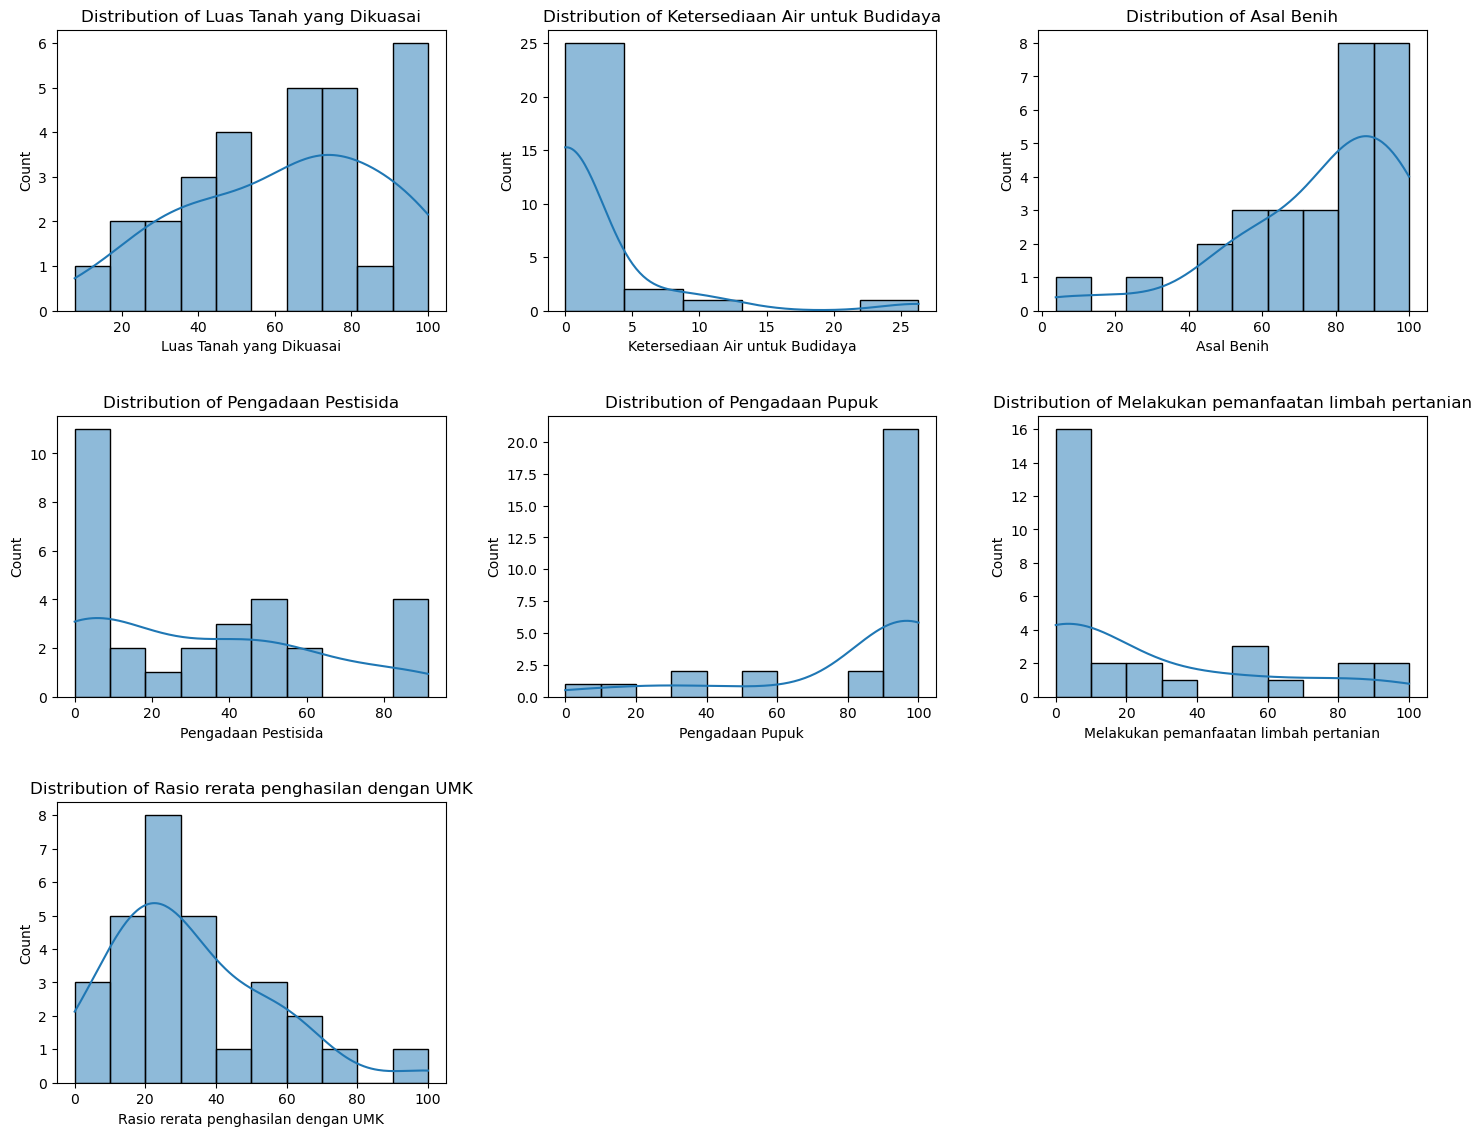

In [12]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=min(10, df[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)
plt.show()

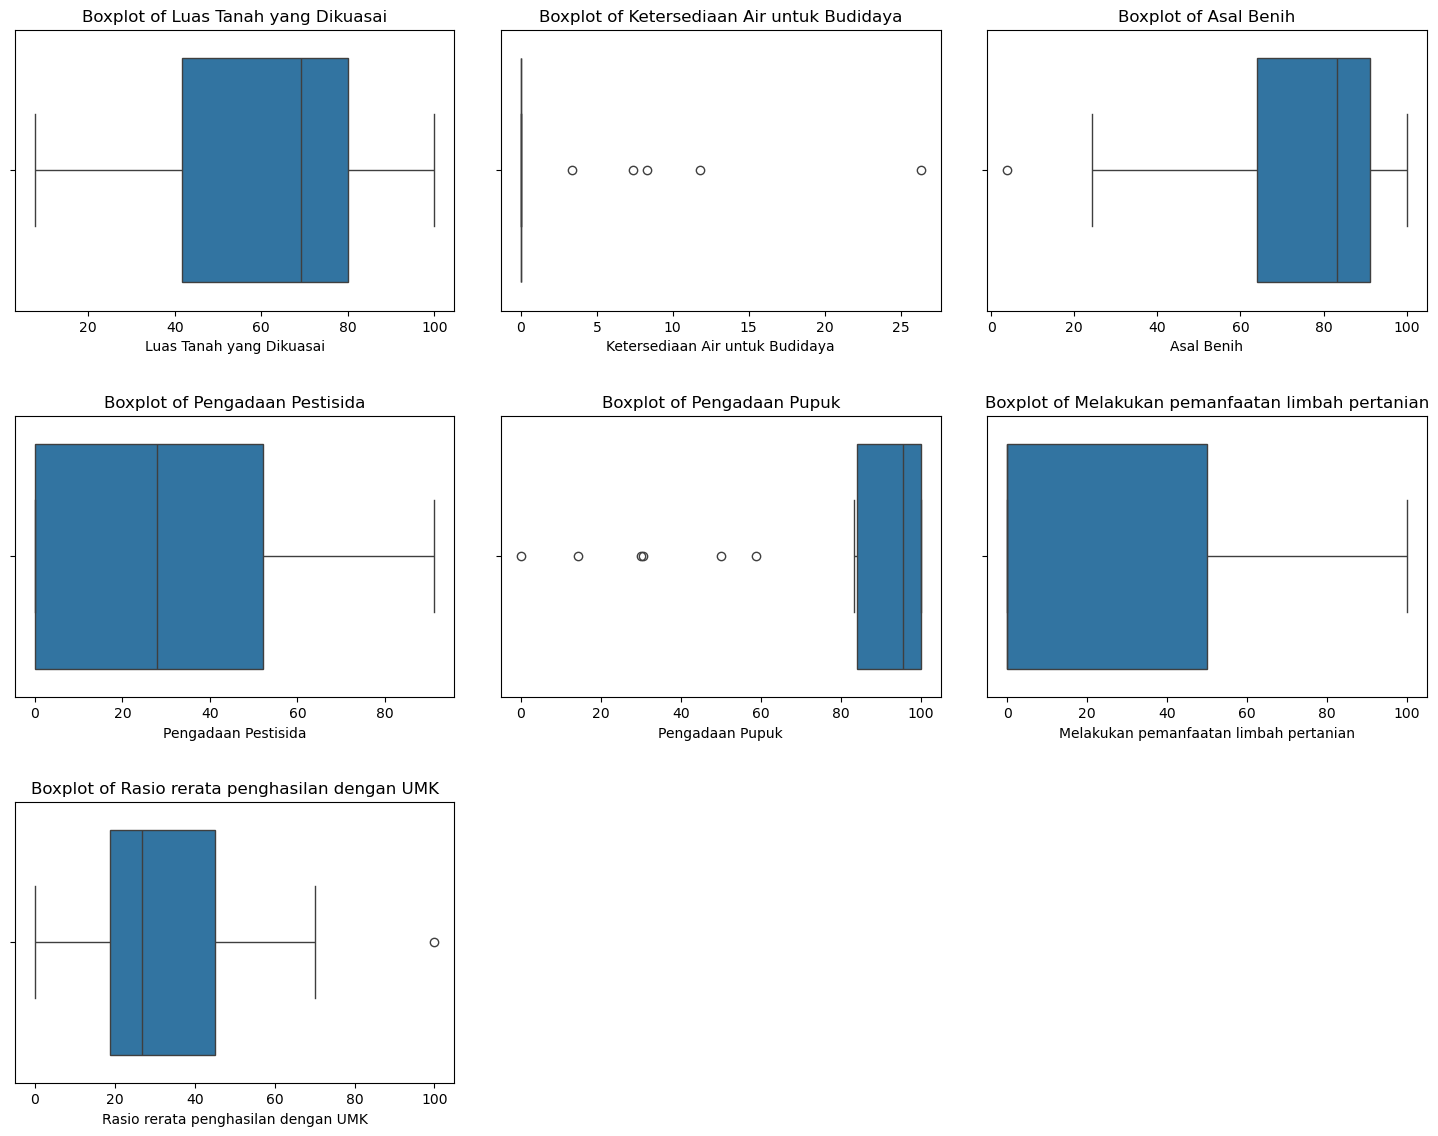

In [13]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

## normalisasi

In [14]:
#Normalisasi
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
df_normalized

Desa/Kelurahan  Luas Tanah yang Dikuasai  Ketersediaan Air untuk Budidaya  \
0       Balauring                  0.909722                         0.000000   
1      Benihading                  0.891667                         0.126667   
2            Bour                  0.681373                         0.447059   
3        Dikesare                  0.157407                         0.000000   
4        Duawutun                  0.783333                         0.000000   
5       Dulitukan                  0.310606                         0.000000   
6        Hoelea I                  0.961310                         0.000000   
7       Ile Kimok                  0.925287                         0.000000   
8         Kalikur                  0.666667                         0.000000   
9        Katakeja                  0.000000                         0.000000   
10      Labalimut                  0.783333                         0.000000   
11       Lamatuka                  0.958333                         0.000000   
12     Laranwutun                  0.704545                         0.000000   
13         Lolong                  0.246377                         0.000000   
14          Mahal                  0.481884                         0.000000   
15        Merdeka                  0.480000                         0.000000   
16        Muruona                  0.196237                         0.000000   
17       Nubamado                  0.478395                         0.281481   
18           Pada                  0.368056                         0.316667   
19       Paubokol                  1.000000                         0.000000   
20           Puor                  0.714912                         1.000000   
21       Riangbao                  0.661458                         0.000000   
22       Tagawiti                  0.350000                         0.000000   
23       Todanara                  0.246377                         0.000000   
24    Tubuk Rajan                  1.000000                         0.000000   
25   Tubungwalang                  0.620833                         0.000000   
26        Waienga                  0.481884                         0.000000   
27       Watodiri                  0.690476                         0.000000   
28      Wuakerong                  0.711111                         0.000000   

    Asal Benih  Pengadaan Pestisida  Pengadaan Pupuk  \
0     1.000000             0.091270         0.500000   
1     0.757333             0.109524         1.000000   
2     0.694118             0.901961         0.588235   
3     0.624444             0.000000         1.000000   
4     0.532000             0.000000         1.000000   
5     0.952727             0.000000         1.000000   
6     0.907143             0.664966         0.142857   
7     1.000000             0.604269         0.931034   
8     0.800000             0.926740         0.000000   
9     0.000000             0.589744         1.000000   
10    0.792000             0.000000         1.000000   
11    0.860000             0.000000         0.961538   
12    0.503636             0.547619         0.954545   
13    0.864348             0.000000         1.000000   
14    0.954783             0.904762         0.304348   
15    0.875200             0.306667         0.960000   
16    0.211613             0.529954         0.935484   
17    0.826667             0.324515         0.925926   
18    0.480000             0.182540         0.833333   
19    1.000000             0.492857         0.950000   
20    0.890526             0.000000         0.842105   
21    0.642500             0.410714         1.000000   
22    0.896000             0.000000         1.000000   
23    0.457391             0.571429         0.956522   
24    1.000000             0.000000         1.000000   
25    0.844000             0.219048         0.300000   
26    1.000000             1.000000         0.956522   
27    0.591429             0.03911

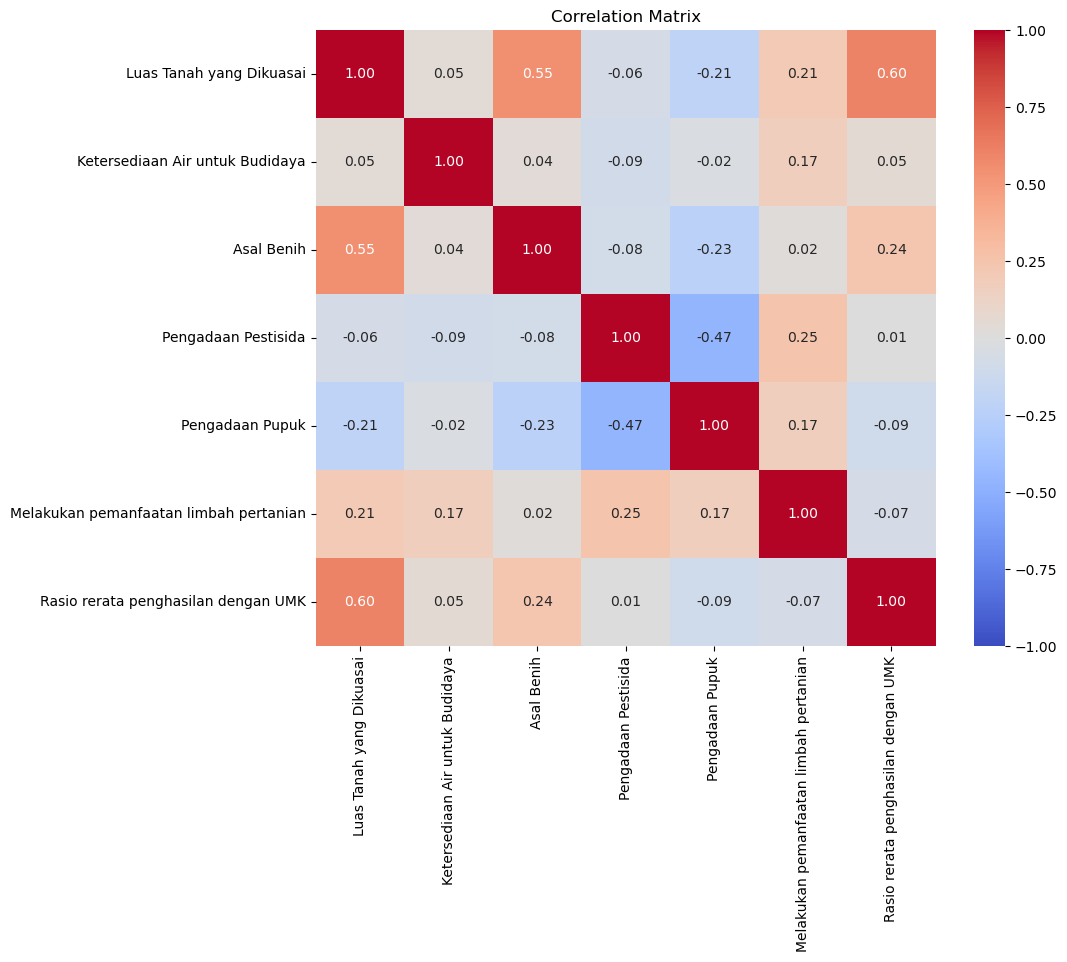

In [16]:
plt.figure(figsize=(10,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

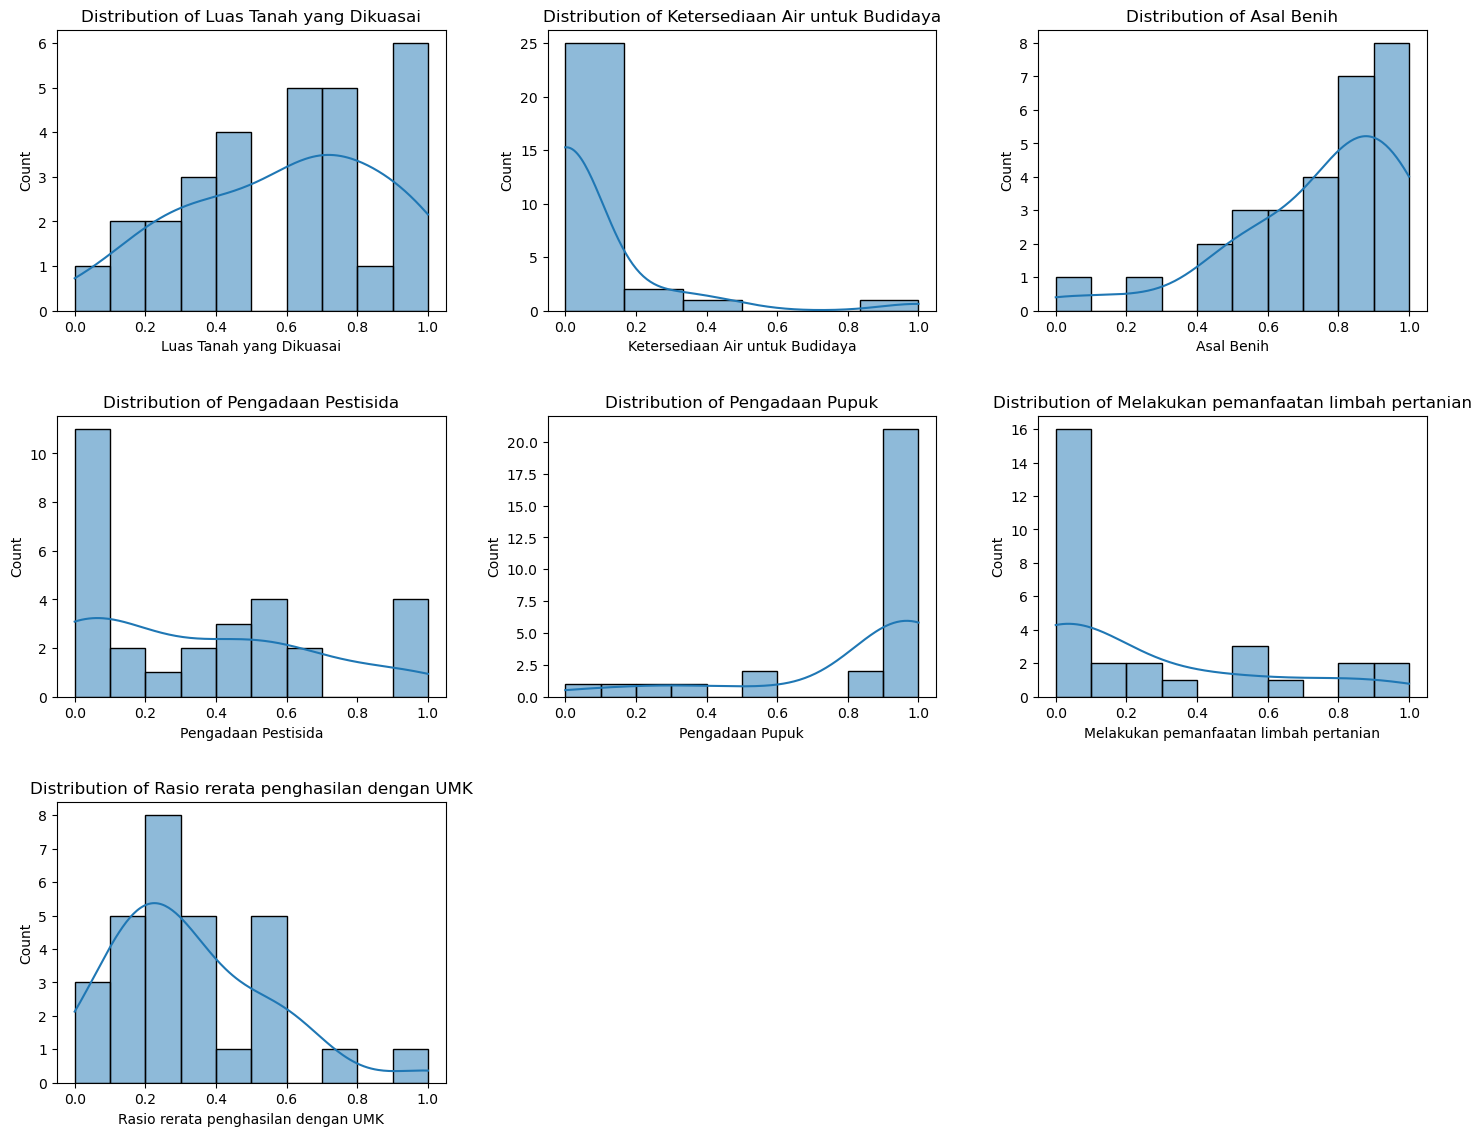

In [17]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_normalized[col], kde=True, bins=min(10, df_normalized[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

In [18]:
df_normalized.to_csv("df_normalized.csv", index=False)

## pembangunan model clustering

In [47]:
df_plot = df.copy()

In [48]:
df_num_normalized = df_normalized.select_dtypes(include=['number']).copy()

### k means

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

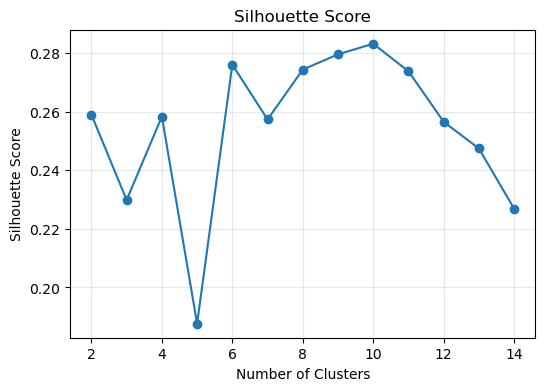

In [49]:
silhouette_scores = []
for k in range(2, 15):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_num_normalized)
    silhouette_scores.append(silhouette_score(df_num_normalized, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [50]:
# melatih model

model_kmeans = KMeans (
    n_clusters=6,
    init='k-means++',
    random_state=42
)
model_kmeans.fit(df_num_normalized)
silhouette_score(df_num_normalized, model_kmeans.labels_)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.2761583770938042

In [51]:
df_plot = df_plot.loc[df_num_normalized.index]
df_plot["KM_Cluster_6"] = pd.Categorical(model_kmeans.labels_, categories=[0,1,2,3,4,5])

In [52]:
# melatih model

model_kmeans = KMeans (
    n_clusters=3,
    init='k-means++',
    random_state=42
)
model_kmeans.fit(df_num_normalized)
silhouette_score(df_num_normalized, model_kmeans.labels_)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.22988047112219534

In [58]:
df_plot = df_plot.loc[df_num_normalized.index]
df_plot["KM_Cluster_3"] = pd.Categorical(model_kmeans.labels_, categories=[0,1,2])

In [59]:
df_plot

Desa/Kelurahan  Luas Tanah yang Dikuasai  Ketersediaan Air untuk Budidaya  \
0       Balauring                 91.666667                         0.000000   
1      Benihading                 90.000000                         3.333333   
2            Bour                 70.588235                        11.764706   
3        Dikesare                 22.222222                         0.000000   
4        Duawutun                 80.000000                         0.000000   
5       Dulitukan                 36.363636                         0.000000   
6        Hoelea I                 96.428571                         0.000000   
7       Ile Kimok                 93.103448                         0.000000   
8         Kalikur                 69.230769                         0.000000   
9        Katakeja                  7.692308                         0.000000   
10      Labalimut                 80.000000                         0.000000   
11       Lamatuka                 96.153846                         0.000000   
12     Laranwutun                 72.727273                         0.000000   
13         Lolong                 30.434783                         0.000000   
14          Mahal                 52.173913                         0.000000   
15        Merdeka                 52.000000                         0.000000   
16        Muruona                 25.806452                         0.000000   
17       Nubamado                 51.851852                         7.407407   
18           Pada                 41.666667                         8.333333   
19       Paubokol                100.000000                         0.000000   
20           Puor                 73.684211                        26.315789   
21       Riangbao                 68.750000                         0.000000   
22       Tagawiti                 40.000000                         0.000000   
23       Todanara                 30.434783                         0.000000   
24    Tubuk Rajan                100.000000                         0.000000   
25   Tubungwalang                 65.000000                         0.000000   
26        Waienga                 52.173913                         0.000000   
27       Watodiri                 71.428571                         0.000000   
28      Wuakerong                 73.333333                         0.000000   

    Asal Benih  Pengadaan Pestisida  Pengadaan Pupuk  \
0   100.000000             8.333333        50.000000   
1    76.666667            10.000000       100.000000   
2    70.588235            82.352941        58.823529   
3    63.888889             0.000000       100.000000   
4    55.000000             0.000000       100.000000   
5    95.454545             0.000000       100.000000   
6    91.071429            60.714286        14.285714   
7   100.000000            55.172414        93.103448   
8    80.769231            84.615385         0.000000   
9     3.846154            53.846154       100.000000   
10   80.000000             0.000000       100.000000   
11   86.538462             0.000000        96.153846   
12   52.272727            50.000000        95.454545   
13   86.956522             0.000000       100.000000   
14   95.652174            82.608696        30.434783   
15   88.000000            28.000000        96.000000   
16   24.193548            48.387097        93.548387   
17   83.333333            29.629630        92.592593   
18   50.000000            16.666667        83.333333   
19  100.000000            45.000000        95.000000   
20   89.473684             0.000000        84.210526   
21   65.625000            37.500000       100.000000   
22   90.000000             0.000000       100.000000   
23   47.826087            52.173913        95.652174   
24  100.000000             0.000000       100.000000   
25   85.000000            20.000000        30.000000   
26  100.000000            91.304348        95.652174   
27   60.714286             3.57142

In [99]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_num_normalized)

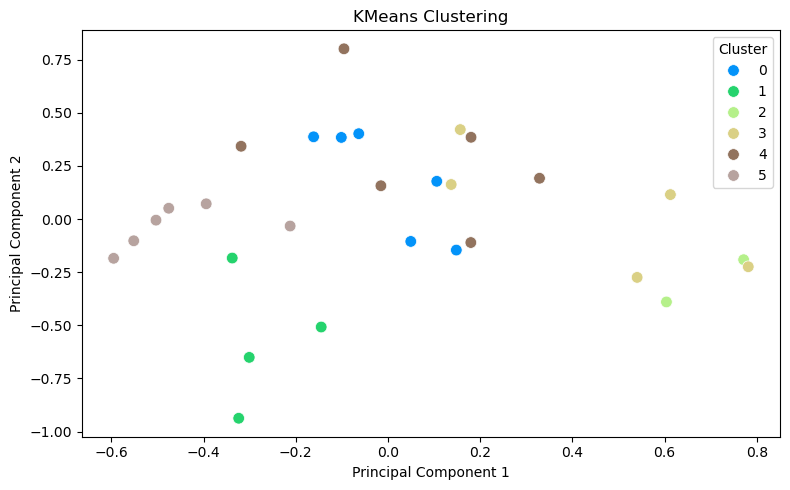

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["KM_Cluster_6"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

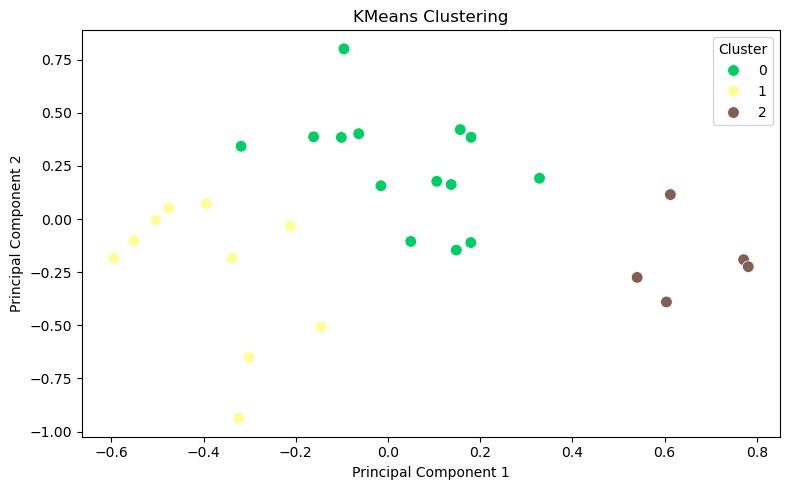

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["KM_Cluster_3"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### hierarchical clustering

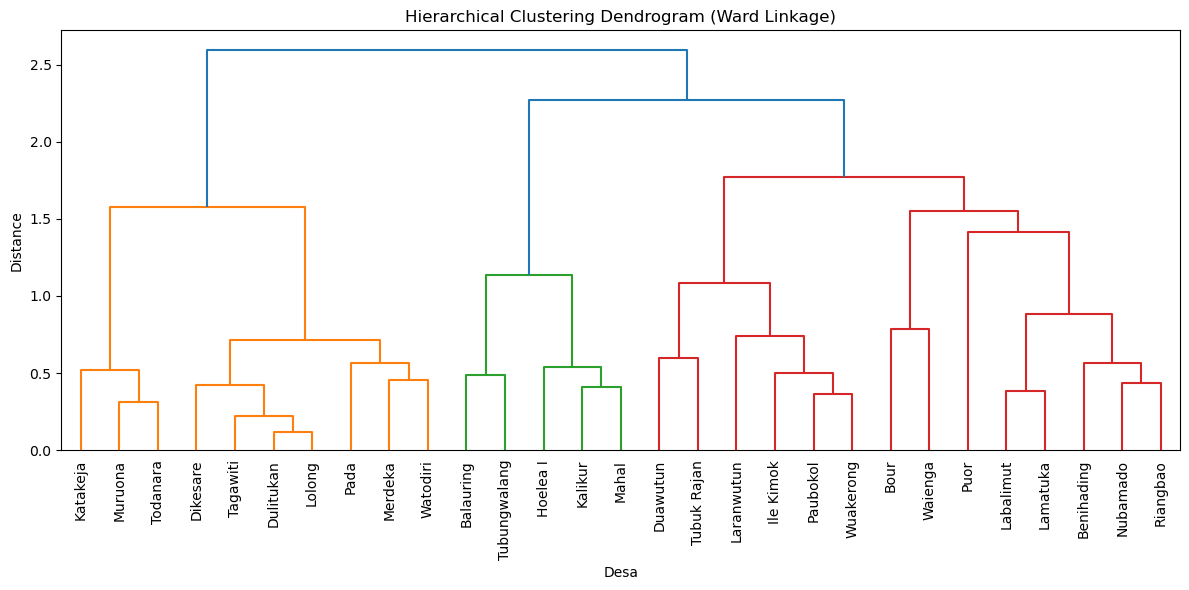

In [66]:
desa = df["Desa/Kelurahan"]

# linkage: 'ward' cocok untuk data numerik
Z = linkage(df_num_normalized, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [67]:
hc_labels = fcluster(Z, 3, criterion="maxclust")
df_plot["HC_Cluster"] = pd.Categorical(hc_labels)

In [68]:
df_plot

Desa/Kelurahan  Luas Tanah yang Dikuasai  Ketersediaan Air untuk Budidaya  \
0       Balauring                 91.666667                         0.000000   
1      Benihading                 90.000000                         3.333333   
2            Bour                 70.588235                        11.764706   
3        Dikesare                 22.222222                         0.000000   
4        Duawutun                 80.000000                         0.000000   
5       Dulitukan                 36.363636                         0.000000   
6        Hoelea I                 96.428571                         0.000000   
7       Ile Kimok                 93.103448                         0.000000   
8         Kalikur                 69.230769                         0.000000   
9        Katakeja                  7.692308                         0.000000   
10      Labalimut                 80.000000                         0.000000   
11       Lamatuka                 96.153846                         0.000000   
12     Laranwutun                 72.727273                         0.000000   
13         Lolong                 30.434783                         0.000000   
14          Mahal                 52.173913                         0.000000   
15        Merdeka                 52.000000                         0.000000   
16        Muruona                 25.806452                         0.000000   
17       Nubamado                 51.851852                         7.407407   
18           Pada                 41.666667                         8.333333   
19       Paubokol                100.000000                         0.000000   
20           Puor                 73.684211                        26.315789   
21       Riangbao                 68.750000                         0.000000   
22       Tagawiti                 40.000000                         0.000000   
23       Todanara                 30.434783                         0.000000   
24    Tubuk Rajan                100.000000                         0.000000   
25   Tubungwalang                 65.000000                         0.000000   
26        Waienga                 52.173913                         0.000000   
27       Watodiri                 71.428571                         0.000000   
28      Wuakerong                 73.333333                         0.000000   

    Asal Benih  Pengadaan Pestisida  Pengadaan Pupuk  \
0   100.000000             8.333333        50.000000   
1    76.666667            10.000000       100.000000   
2    70.588235            82.352941        58.823529   
3    63.888889             0.000000       100.000000   
4    55.000000             0.000000       100.000000   
5    95.454545             0.000000       100.000000   
6    91.071429            60.714286        14.285714   
7   100.000000            55.172414        93.103448   
8    80.769231            84.615385         0.000000   
9     3.846154            53.846154       100.000000   
10   80.000000             0.000000       100.000000   
11   86.538462             0.000000        96.153846   
12   52.272727            50.000000        95.454545   
13   86.956522             0.000000       100.000000   
14   95.652174            82.608696        30.434783   
15   88.000000            28.000000        96.000000   
16   24.193548            48.387097        93.548387   
17   83.333333            29.629630        92.592593   
18   50.000000            16.666667        83.333333   
19  100.000000            45.000000        95.000000   
20   89.473684             0.000000        84.210526   
21   65.625000            37.500000       100.000000   
22   90.000000             0.000000       100.000000   
23   47.826087            52.173913        95.652174   
24  100.000000             0.000000       100.000000   
25   85.000000            20.000000        30.000000   
26  100.000000            91.304348        95.652174   
27   60.714286             3.57142

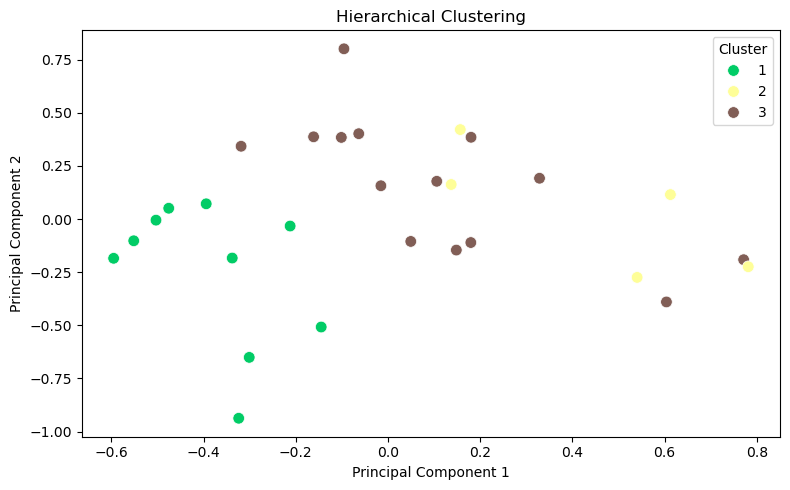

In [69]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["HC_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### dbscan

#### min samples = 2

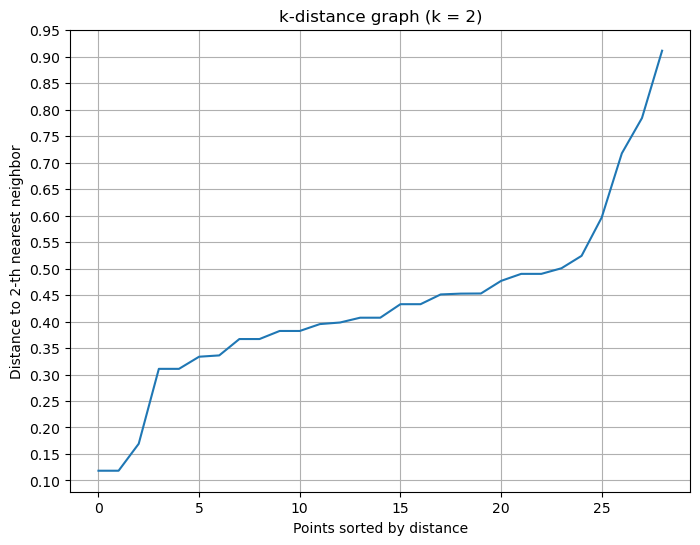

In [76]:
k = 2  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_num_normalized)
distances, indices = nbrs.kneighbors(df_num_normalized)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.10
y_max = 0.95
plt.yticks(np.arange(round(y_min, 2), y_max + 0.05, 0.05))

plt.show()

In [77]:
eps_values = np.arange(0.10, 0.95, 0.05)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=2).fit(df_num_normalized)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.10 → [-1]
eps = 0.15 → [-1  0]
eps = 0.20 → [-1  0]
eps = 0.25 → [-1  0]
eps = 0.30 → [-1  0]
eps = 0.35 → [-1  0  1]
eps = 0.40 → [-1  0  1  2  3]
eps = 0.45 → [-1  0  1  2  3  4  5]
eps = 0.50 → [-1  0  1  2  3  4  5]
eps = 0.55 → [-1  0  1  2  3  4  5]
eps = 0.60 → [-1  0  1]
eps = 0.65 → [-1  0]
eps = 0.70 → [-1  0]
eps = 0.75 → [-1  0]
eps = 0.80 → [-1  0]
eps = 0.85 → [-1  0]
eps = 0.90 → [-1  0]


In [78]:
db = DBSCAN(eps=0.53, min_samples=2).fit(df_num_normalized)

In [79]:
df_plot['DB_Cluster_minsample_2'] = db.labels_

In [80]:
df_plot

Desa/Kelurahan  Luas Tanah yang Dikuasai  Ketersediaan Air untuk Budidaya  \
0       Balauring                 91.666667                         0.000000   
1      Benihading                 90.000000                         3.333333   
2            Bour                 70.588235                        11.764706   
3        Dikesare                 22.222222                         0.000000   
4        Duawutun                 80.000000                         0.000000   
5       Dulitukan                 36.363636                         0.000000   
6        Hoelea I                 96.428571                         0.000000   
7       Ile Kimok                 93.103448                         0.000000   
8         Kalikur                 69.230769                         0.000000   
9        Katakeja                  7.692308                         0.000000   
10      Labalimut                 80.000000                         0.000000   
11       Lamatuka                 96.153846                         0.000000   
12     Laranwutun                 72.727273                         0.000000   
13         Lolong                 30.434783                         0.000000   
14          Mahal                 52.173913                         0.000000   
15        Merdeka                 52.000000                         0.000000   
16        Muruona                 25.806452                         0.000000   
17       Nubamado                 51.851852                         7.407407   
18           Pada                 41.666667                         8.333333   
19       Paubokol                100.000000                         0.000000   
20           Puor                 73.684211                        26.315789   
21       Riangbao                 68.750000                         0.000000   
22       Tagawiti                 40.000000                         0.000000   
23       Todanara                 30.434783                         0.000000   
24    Tubuk Rajan                100.000000                         0.000000   
25   Tubungwalang                 65.000000                         0.000000   
26        Waienga                 52.173913                         0.000000   
27       Watodiri                 71.428571                         0.000000   
28      Wuakerong                 73.333333                         0.000000   

    Asal Benih  Pengadaan Pestisida  Pengadaan Pupuk  \
0   100.000000             8.333333        50.000000   
1    76.666667            10.000000       100.000000   
2    70.588235            82.352941        58.823529   
3    63.888889             0.000000       100.000000   
4    55.000000             0.000000       100.000000   
5    95.454545             0.000000       100.000000   
6    91.071429            60.714286        14.285714   
7   100.000000            55.172414        93.103448   
8    80.769231            84.615385         0.000000   
9     3.846154            53.846154       100.000000   
10   80.000000             0.000000       100.000000   
11   86.538462             0.000000        96.153846   
12   52.272727            50.000000        95.454545   
13   86.956522             0.000000       100.000000   
14   95.652174            82.608696        30.434783   
15   88.000000            28.000000        96.000000   
16   24.193548            48.387097        93.548387   
17   83.333333            29.629630        92.592593   
18   50.000000            16.666667        83.333333   
19  100.000000            45.000000        95.000000   
20   89.473684             0.000000        84.210526   
21   65.625000            37.500000       100.000000   
22   90.000000             0.000000       100.000000   
23   47.826087            52.173913        95.652174   
24  100.000000             0.000000       100.000000   
25   85.000000            20.000000        30.000000   
26  100.000000            91.304348        95.652174   
27   60.714286             3.57142

In [81]:
df_plot['DB_Cluster_minsample_2'].value_counts()

DB_Cluster_minsample_2
 2    11
 1     4
-1     4
 3     3
 4     3
 0     2
 5     2
Name: count, dtype: int64

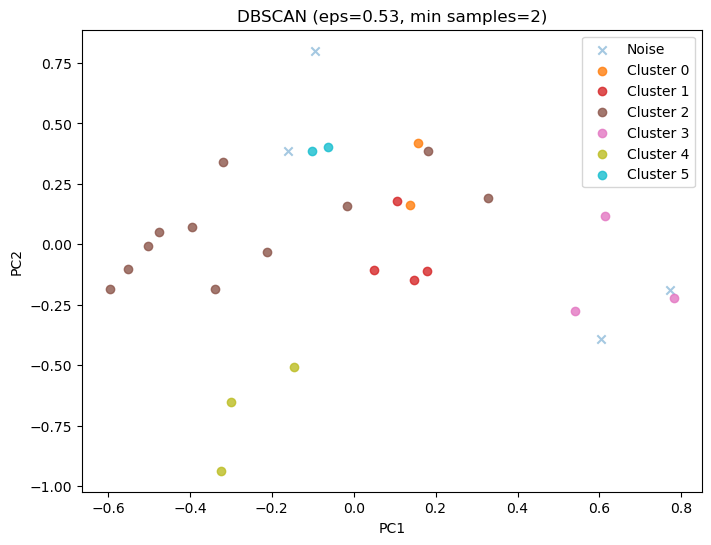

In [82]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.53
min_samples=2
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_num_normalized)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

#### min samples = 3

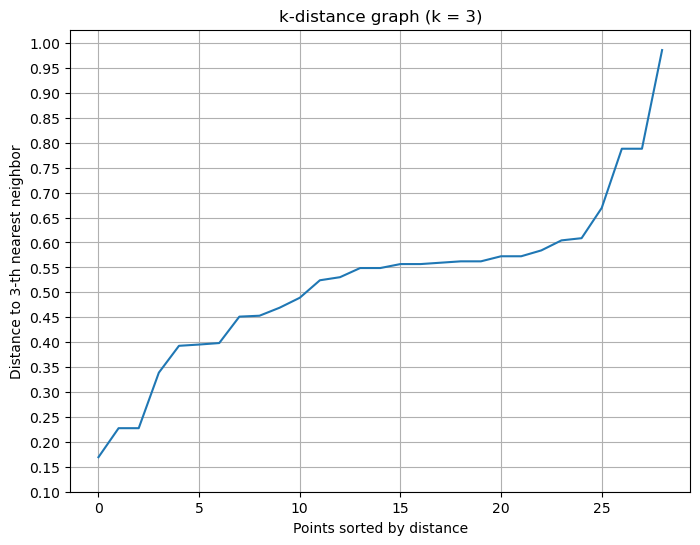

In [84]:
k = 3  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_num_normalized)
distances, indices = nbrs.kneighbors(df_num_normalized)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.10
y_max = 1.00
plt.yticks(np.arange(round(y_min, 2), y_max + 0.05, 0.05))

plt.show()

In [85]:
eps_values = np.arange(0.1, 1.0, 0.05)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(df_num_normalized)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.10 → [-1]
eps = 0.15 → [-1]
eps = 0.20 → [-1  0]
eps = 0.25 → [-1  0]
eps = 0.30 → [-1  0]
eps = 0.35 → [-1  0]
eps = 0.40 → [-1  0  1  2]
eps = 0.45 → [-1  0  1  2]
eps = 0.50 → [-1  0  1  2  3]
eps = 0.55 → [-1  0  1  2  3]
eps = 0.60 → [-1  0  1]
eps = 0.65 → [-1  0]
eps = 0.70 → [-1  0]
eps = 0.75 → [-1  0]
eps = 0.80 → [-1  0]
eps = 0.85 → [-1  0]
eps = 0.90 → [-1  0]
eps = 0.95 → [0]


In [90]:
db = DBSCAN(eps=0.60, min_samples=3).fit(df_num_normalized)

In [91]:
df_plot['DB_Cluster_minsample_3'] = db.labels_

In [92]:
df_plot

Desa/Kelurahan  Luas Tanah yang Dikuasai  Ketersediaan Air untuk Budidaya  \
0       Balauring                 91.666667                         0.000000   
1      Benihading                 90.000000                         3.333333   
2            Bour                 70.588235                        11.764706   
3        Dikesare                 22.222222                         0.000000   
4        Duawutun                 80.000000                         0.000000   
5       Dulitukan                 36.363636                         0.000000   
6        Hoelea I                 96.428571                         0.000000   
7       Ile Kimok                 93.103448                         0.000000   
8         Kalikur                 69.230769                         0.000000   
9        Katakeja                  7.692308                         0.000000   
10      Labalimut                 80.000000                         0.000000   
11       Lamatuka                 96.153846                         0.000000   
12     Laranwutun                 72.727273                         0.000000   
13         Lolong                 30.434783                         0.000000   
14          Mahal                 52.173913                         0.000000   
15        Merdeka                 52.000000                         0.000000   
16        Muruona                 25.806452                         0.000000   
17       Nubamado                 51.851852                         7.407407   
18           Pada                 41.666667                         8.333333   
19       Paubokol                100.000000                         0.000000   
20           Puor                 73.684211                        26.315789   
21       Riangbao                 68.750000                         0.000000   
22       Tagawiti                 40.000000                         0.000000   
23       Todanara                 30.434783                         0.000000   
24    Tubuk Rajan                100.000000                         0.000000   
25   Tubungwalang                 65.000000                         0.000000   
26        Waienga                 52.173913                         0.000000   
27       Watodiri                 71.428571                         0.000000   
28      Wuakerong                 73.333333                         0.000000   

    Asal Benih  Pengadaan Pestisida  Pengadaan Pupuk  \
0   100.000000             8.333333        50.000000   
1    76.666667            10.000000       100.000000   
2    70.588235            82.352941        58.823529   
3    63.888889             0.000000       100.000000   
4    55.000000             0.000000       100.000000   
5    95.454545             0.000000       100.000000   
6    91.071429            60.714286        14.285714   
7   100.000000            55.172414        93.103448   
8    80.769231            84.615385         0.000000   
9     3.846154            53.846154       100.000000   
10   80.000000             0.000000       100.000000   
11   86.538462             0.000000        96.153846   
12   52.272727            50.000000        95.454545   
13   86.956522             0.000000       100.000000   
14   95.652174            82.608696        30.434783   
15   88.000000            28.000000        96.000000   
16   24.193548            48.387097        93.548387   
17   83.333333            29.629630        92.592593   
18   50.000000            16.666667        83.333333   
19  100.000000            45.000000        95.000000   
20   89.473684             0.000000        84.210526   
21   65.625000            37.500000       100.000000   
22   90.000000             0.000000       100.000000   
23   47.826087            52.173913        95.652174   
24  100.000000             0.000000       100.000000   
25   85.000000            20.000000        30.000000   
26  100.000000            91.304348        95.652174   
27   60.714286             3.57142

In [93]:
df_plot['DB_Cluster_minsample_3'].value_counts()

DB_Cluster_minsample_3
 0    23
-1     3
 1     3
Name: count, dtype: int64

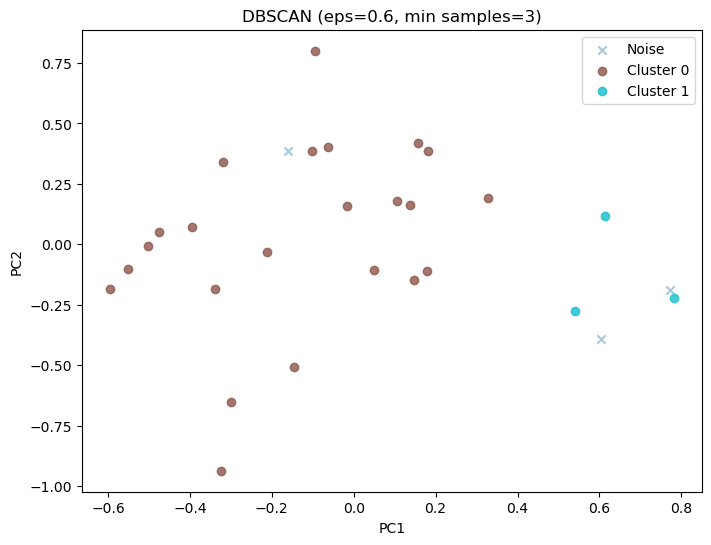

In [94]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.60
min_samples=3
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_num_normalized)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

## PCA first

In [24]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_num_normalized)

In [339]:
df_pca = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],          # nama kolom bebas, tapi ini paling umum
    index=df_normalized.index        # pakai index yang sama dengan df_normalized
)

df_pca

PC1       PC2
0   0.024812 -0.007091
1  -0.170304 -0.589913
2  -0.715259  0.250155
3  -0.357042 -0.531366
4   0.487426 -0.104915
5  -0.079153 -0.353570
6  -0.813377  0.024251
7  -0.409182 -0.386813
8  -0.940518  0.713732
9   0.520839  0.388178
10  0.728365  0.404756
11  0.627272 -0.186243
12  0.446634  0.375606
13  0.633184 -0.348989
14 -0.789092  0.771301
15 -0.324653 -0.366784
16  0.457724 -0.021578
17  0.635319  0.335742
18  0.437986  0.017112
19 -0.401207 -0.423017
20 -0.359259 -0.426203
21  0.445076  0.165803
22 -0.295070 -0.361171
23 -0.474702  0.061724
24  0.639760  0.215926
25 -0.564278  0.223596
26 -0.562975  0.150319
27  0.618866 -0.151278
28  0.552809  0.160730

### kmeans

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

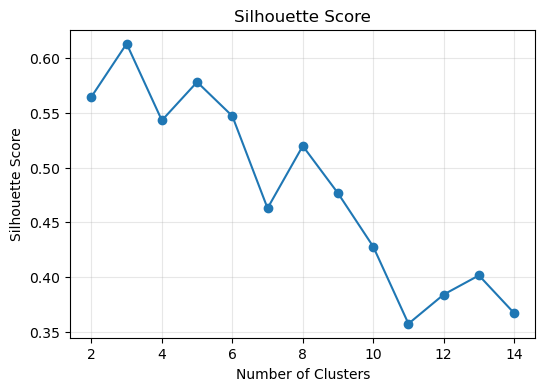

In [340]:
silhouette_scores = []
for k in range(2, 15):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [341]:
# melatih model

model_kmeans = KMeans (
    n_clusters=3,
    init='k-means++',
    random_state=42
)
model_kmeans.fit(df_pca)
silhouette_score(df_pca, model_kmeans.labels_)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6129015133404917

In [342]:
df_pca_coba = df.copy()

In [344]:
df_pca_coba = df_pca_coba.loc[df_pca.index]
df_pca_coba["KM_Cluster"] = pd.Categorical(model_kmeans.labels_, categories=[0,1,2])

In [345]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

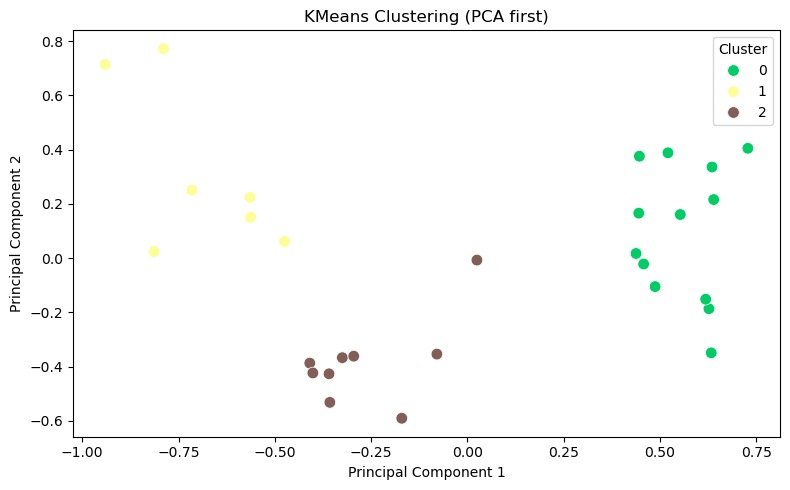

In [346]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca_coba["KM_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering (PCA first)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### Hierarchical Clustering

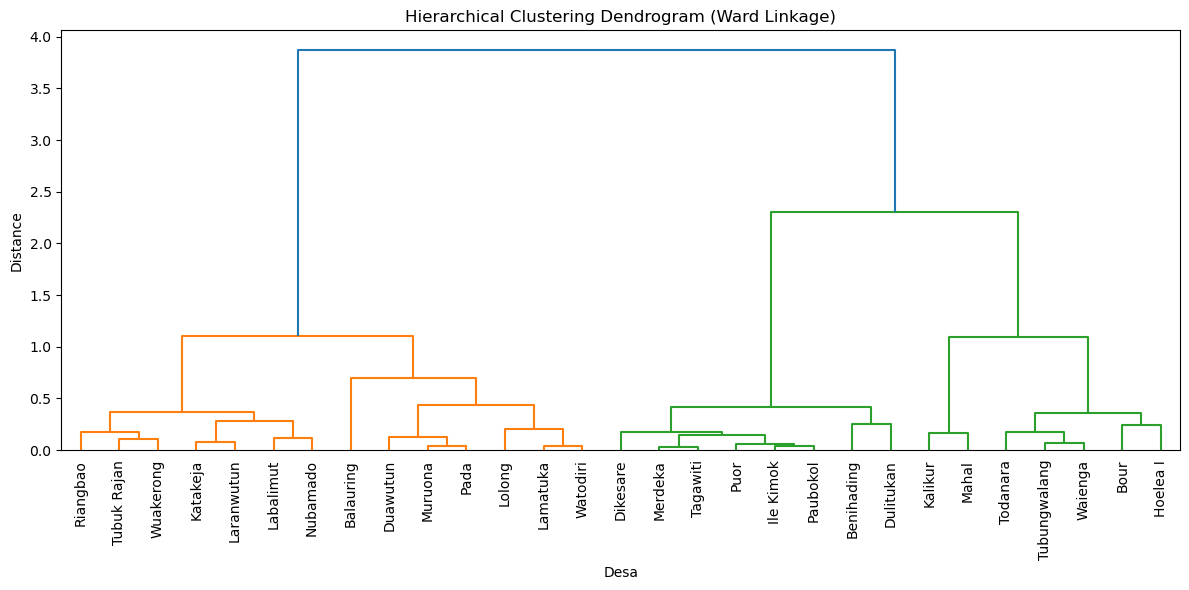

In [347]:
# linkage: 'ward' cocok untuk data numerik
Z = linkage(df_pca, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [348]:
hc_labels = fcluster(Z, 2, criterion="maxclust")
df_pca_coba["HC_Cluster"] = pd.Categorical(hc_labels)

In [349]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

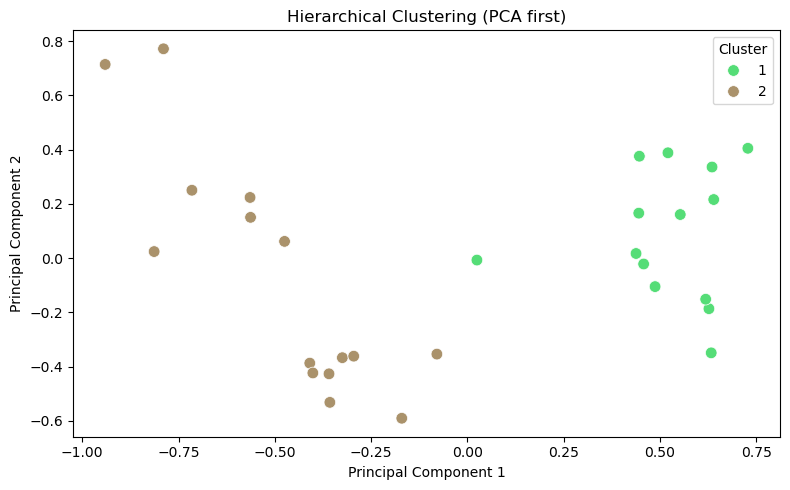

In [350]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca_coba["HC_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('Hierarchical Clustering (PCA first)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### dbscan

#### min samples = 2

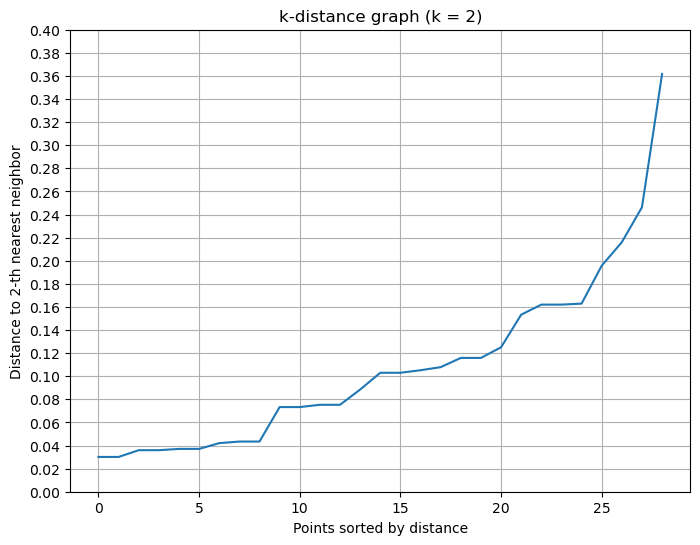

In [351]:
k = 2  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.00
y_max = 0.40
plt.yticks(np.arange(round(y_min, 2), y_max + 0.02, 0.02))

plt.show()

In [352]:
eps_values = np.arange(0.1, 0.4, 0.02)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=2).fit(df_pca)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.10 → [-1  0  1  2  3  4]
eps = 0.12 → [-1  0  1  2  3  4  5]
eps = 0.14 → [-1  0  1  2  3]
eps = 0.16 → [-1  0  1  2]
eps = 0.18 → [-1  0  1  2  3]
eps = 0.20 → [-1  0  1  2  3]
eps = 0.22 → [-1  0  1  2  3]
eps = 0.24 → [-1  0  1  2  3]
eps = 0.26 → [-1  0  1  2  3]
eps = 0.28 → [-1  0  1  2  3]
eps = 0.30 → [-1  0  1  2  3]
eps = 0.32 → [-1  0  1  2  3]
eps = 0.34 → [-1  0  1  2  3]
eps = 0.36 → [-1  0  1  2  3]
eps = 0.38 → [0 1 2 3]
eps = 0.40 → [0 1 2 3]


In [353]:
db = DBSCAN(eps=0.16, min_samples=2).fit(df_pca)

In [354]:
df_pca_coba['DB_Cluster_minsample_2'] = db.labels_

In [355]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

In [356]:
df_pca_coba['DB_Cluster_minsample_2'].value_counts()

DB_Cluster_minsample_2
 2    12
-1     7
 1     6
 0     4
Name: count, dtype: int64

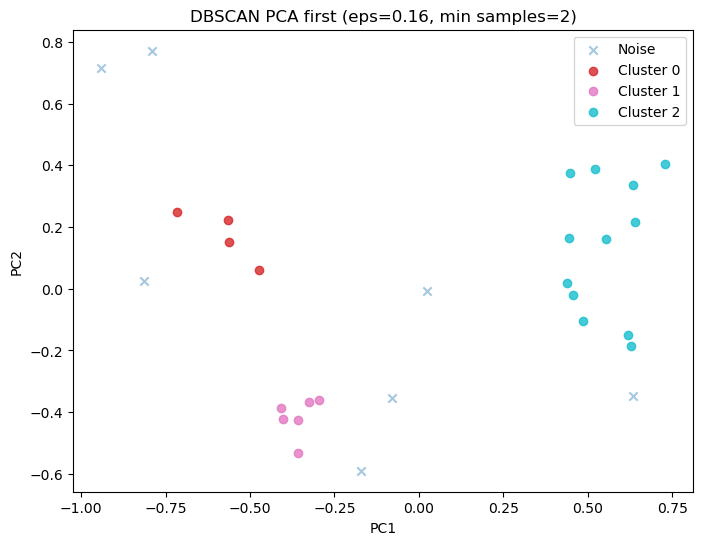

In [357]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.16
min_samples=2
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN PCA first (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

#### min samples = 3

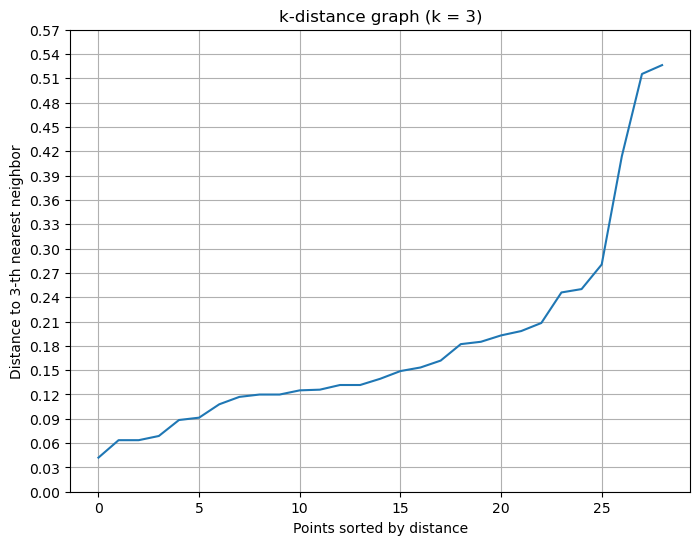

In [358]:
k = 3  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.00
y_max = 0.55
plt.yticks(np.arange(round(y_min, 2), y_max + 0.03, 0.03))

plt.show()

In [359]:
eps_values = np.arange(0.06, 0.6, 0.03)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(df_pca)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.06 → [-1  0]
eps = 0.09 → [-1  0  1]
eps = 0.12 → [-1  0  1  2]
eps = 0.15 → [-1  0  1  2]
eps = 0.18 → [-1  0  1  2]
eps = 0.21 → [-1  0  1  2]
eps = 0.24 → [-1  0  1  2]
eps = 0.27 → [-1  0  1  2]
eps = 0.30 → [-1  0  1  2]
eps = 0.33 → [-1  0  1  2]
eps = 0.36 → [-1  0  1  2]
eps = 0.39 → [-1  0  1  2]
eps = 0.42 → [-1  0  1]
eps = 0.45 → [-1  0  1]
eps = 0.48 → [-1  0]
eps = 0.51 → [-1  0]
eps = 0.54 → [0]
eps = 0.57 → [0]
eps = 0.60 → [0]


In [360]:
db = DBSCAN(eps=0.21, min_samples=3).fit(df_pca)

In [361]:
df_pca_coba['DB_Cluster_minsample_3'] = db.labels_

In [362]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

In [363]:
df_pca_coba['DB_Cluster_minsample_3'].value_counts()

DB_Cluster_minsample_3
 2    13
 1     7
-1     5
 0     4
Name: count, dtype: int64

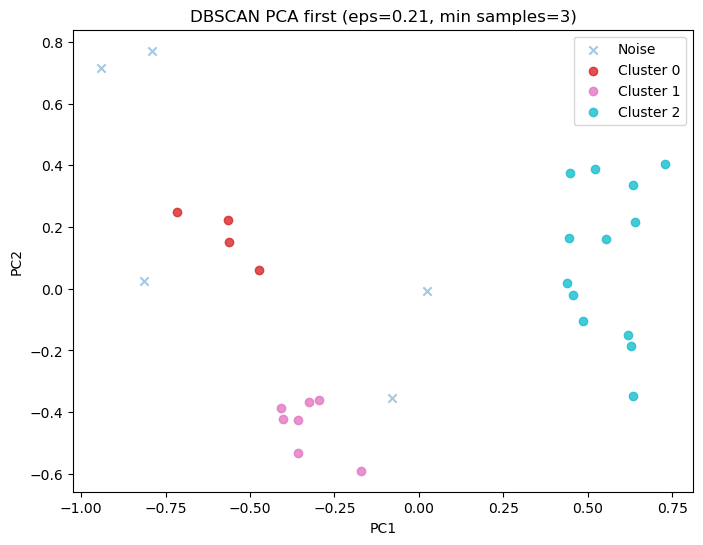

In [364]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.21
min_samples=3
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN PCA first (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

# analisis sebaran masing-masing cluster

In [283]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## clustering real distance

### Boxplot

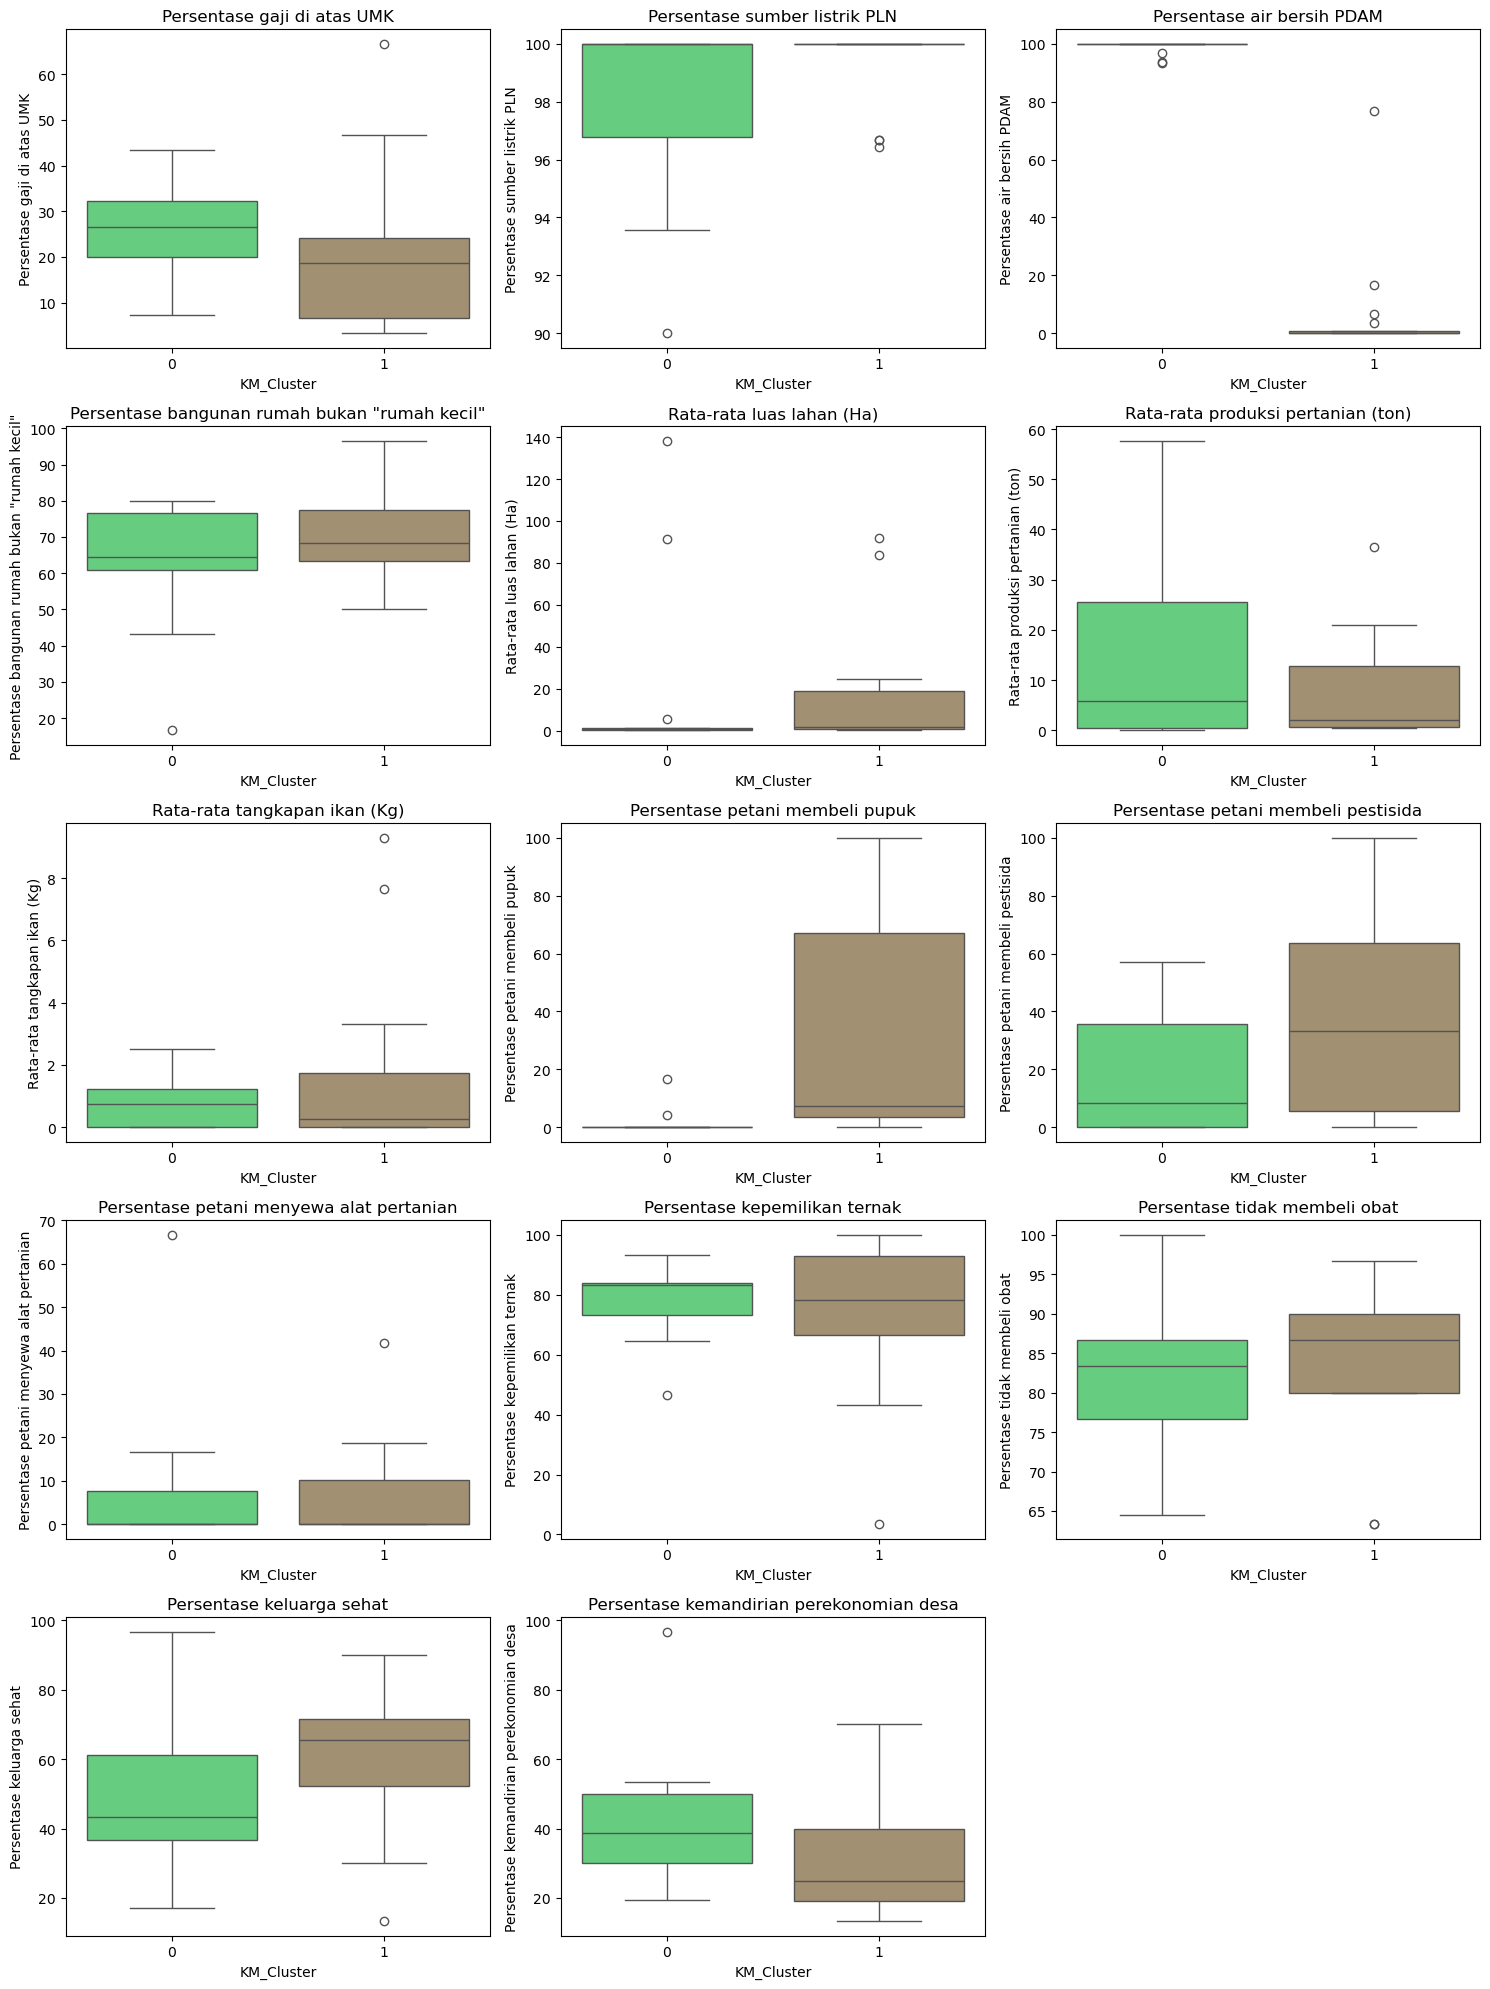

In [287]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="KM_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

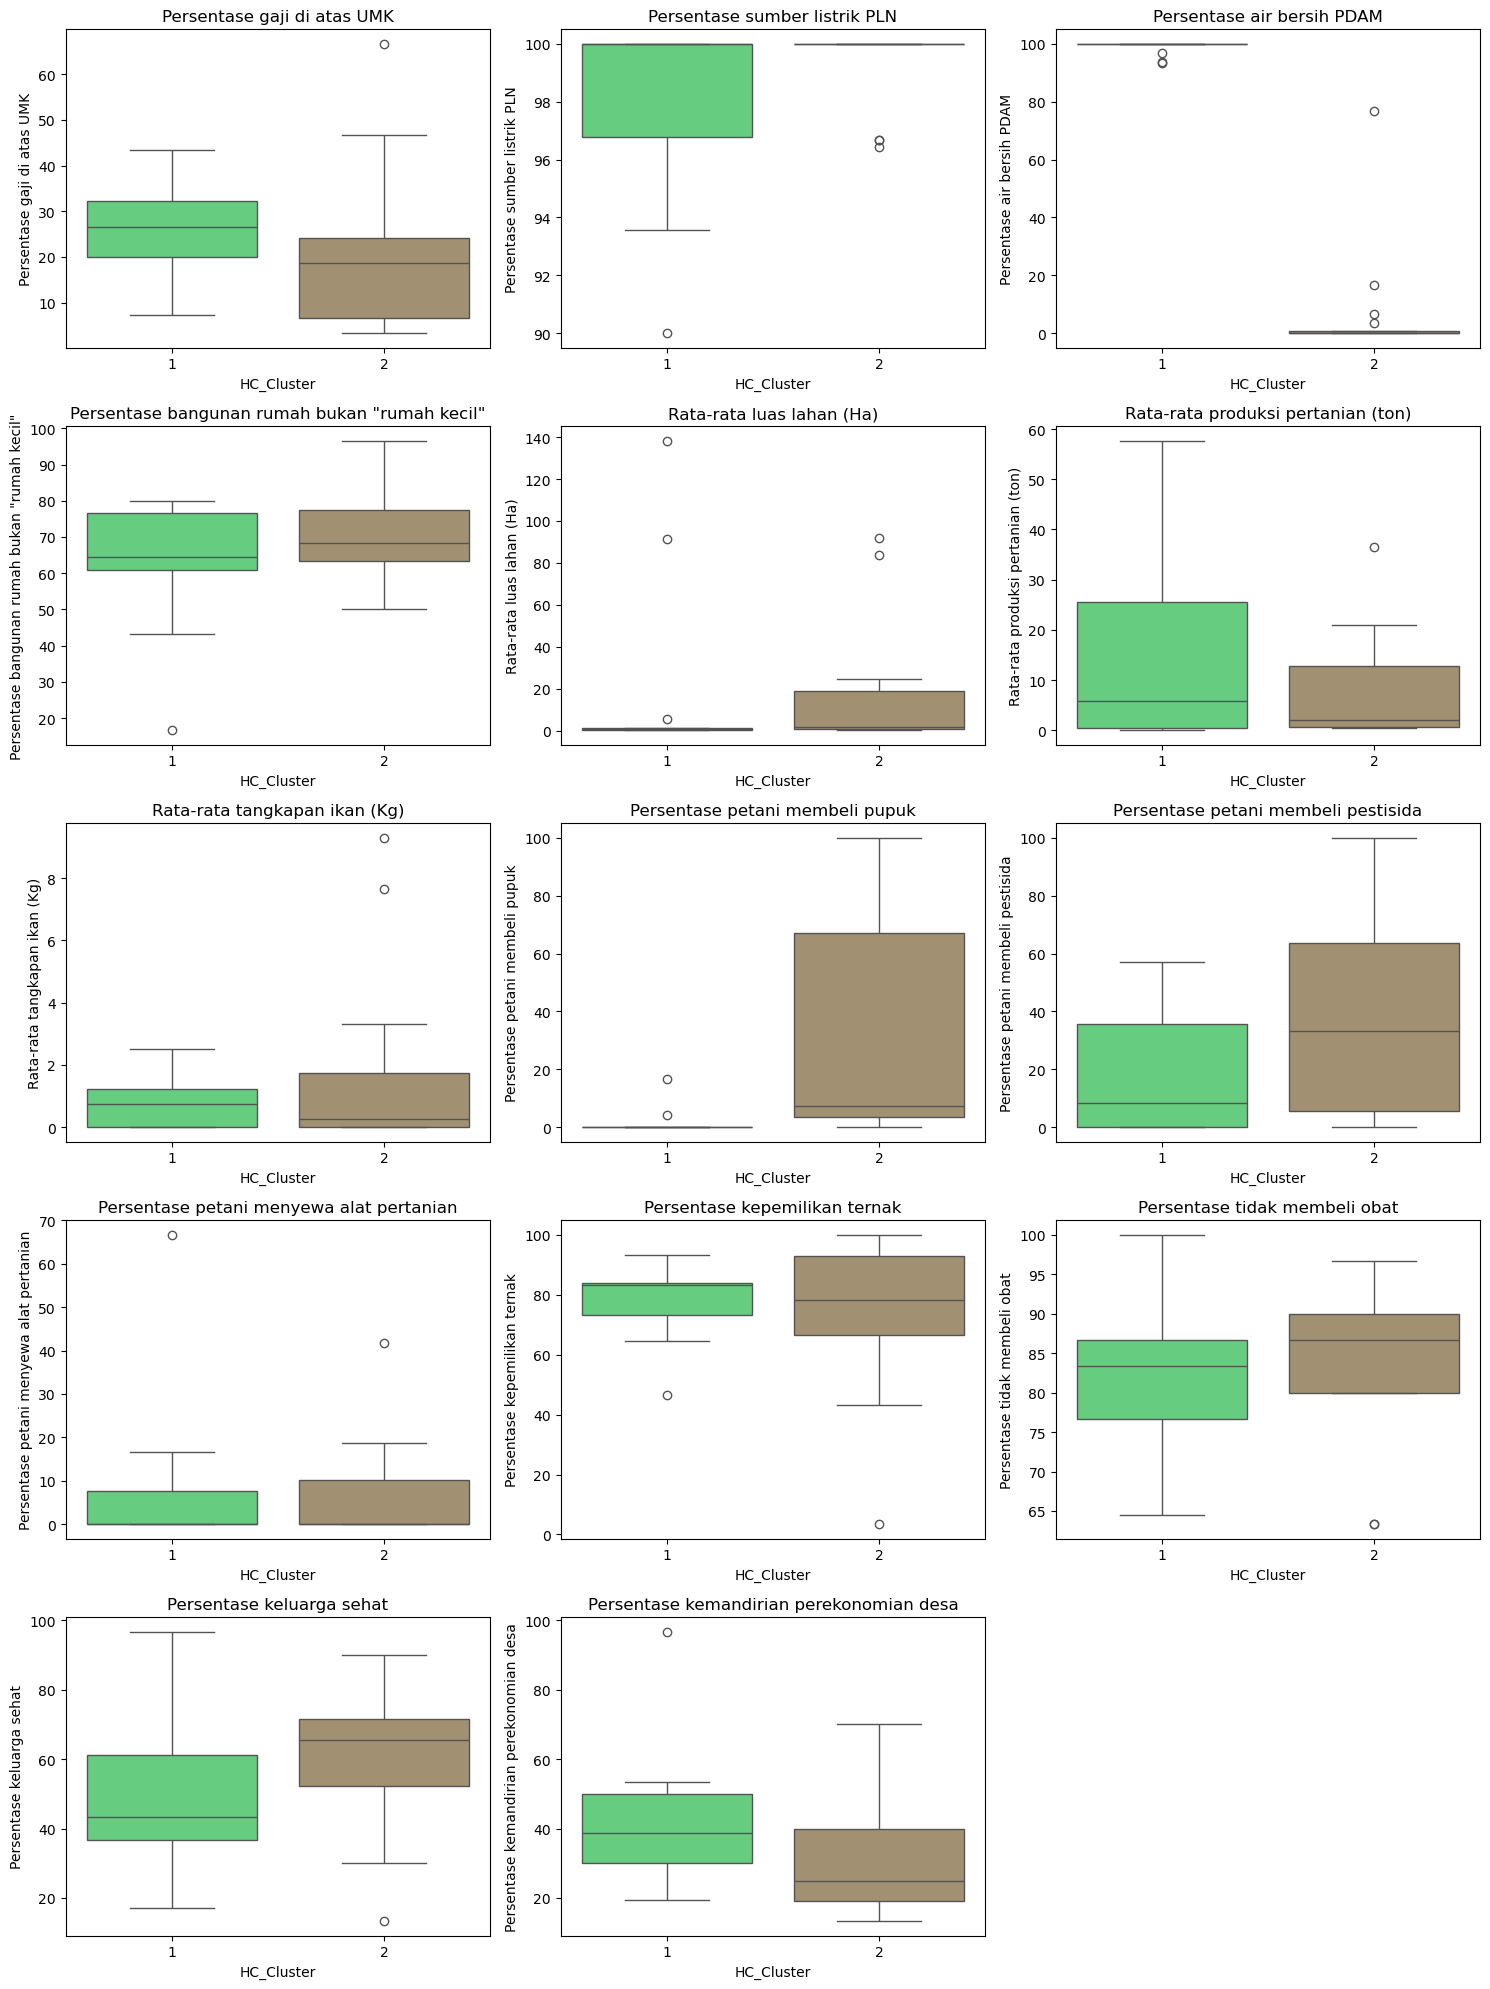

In [288]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

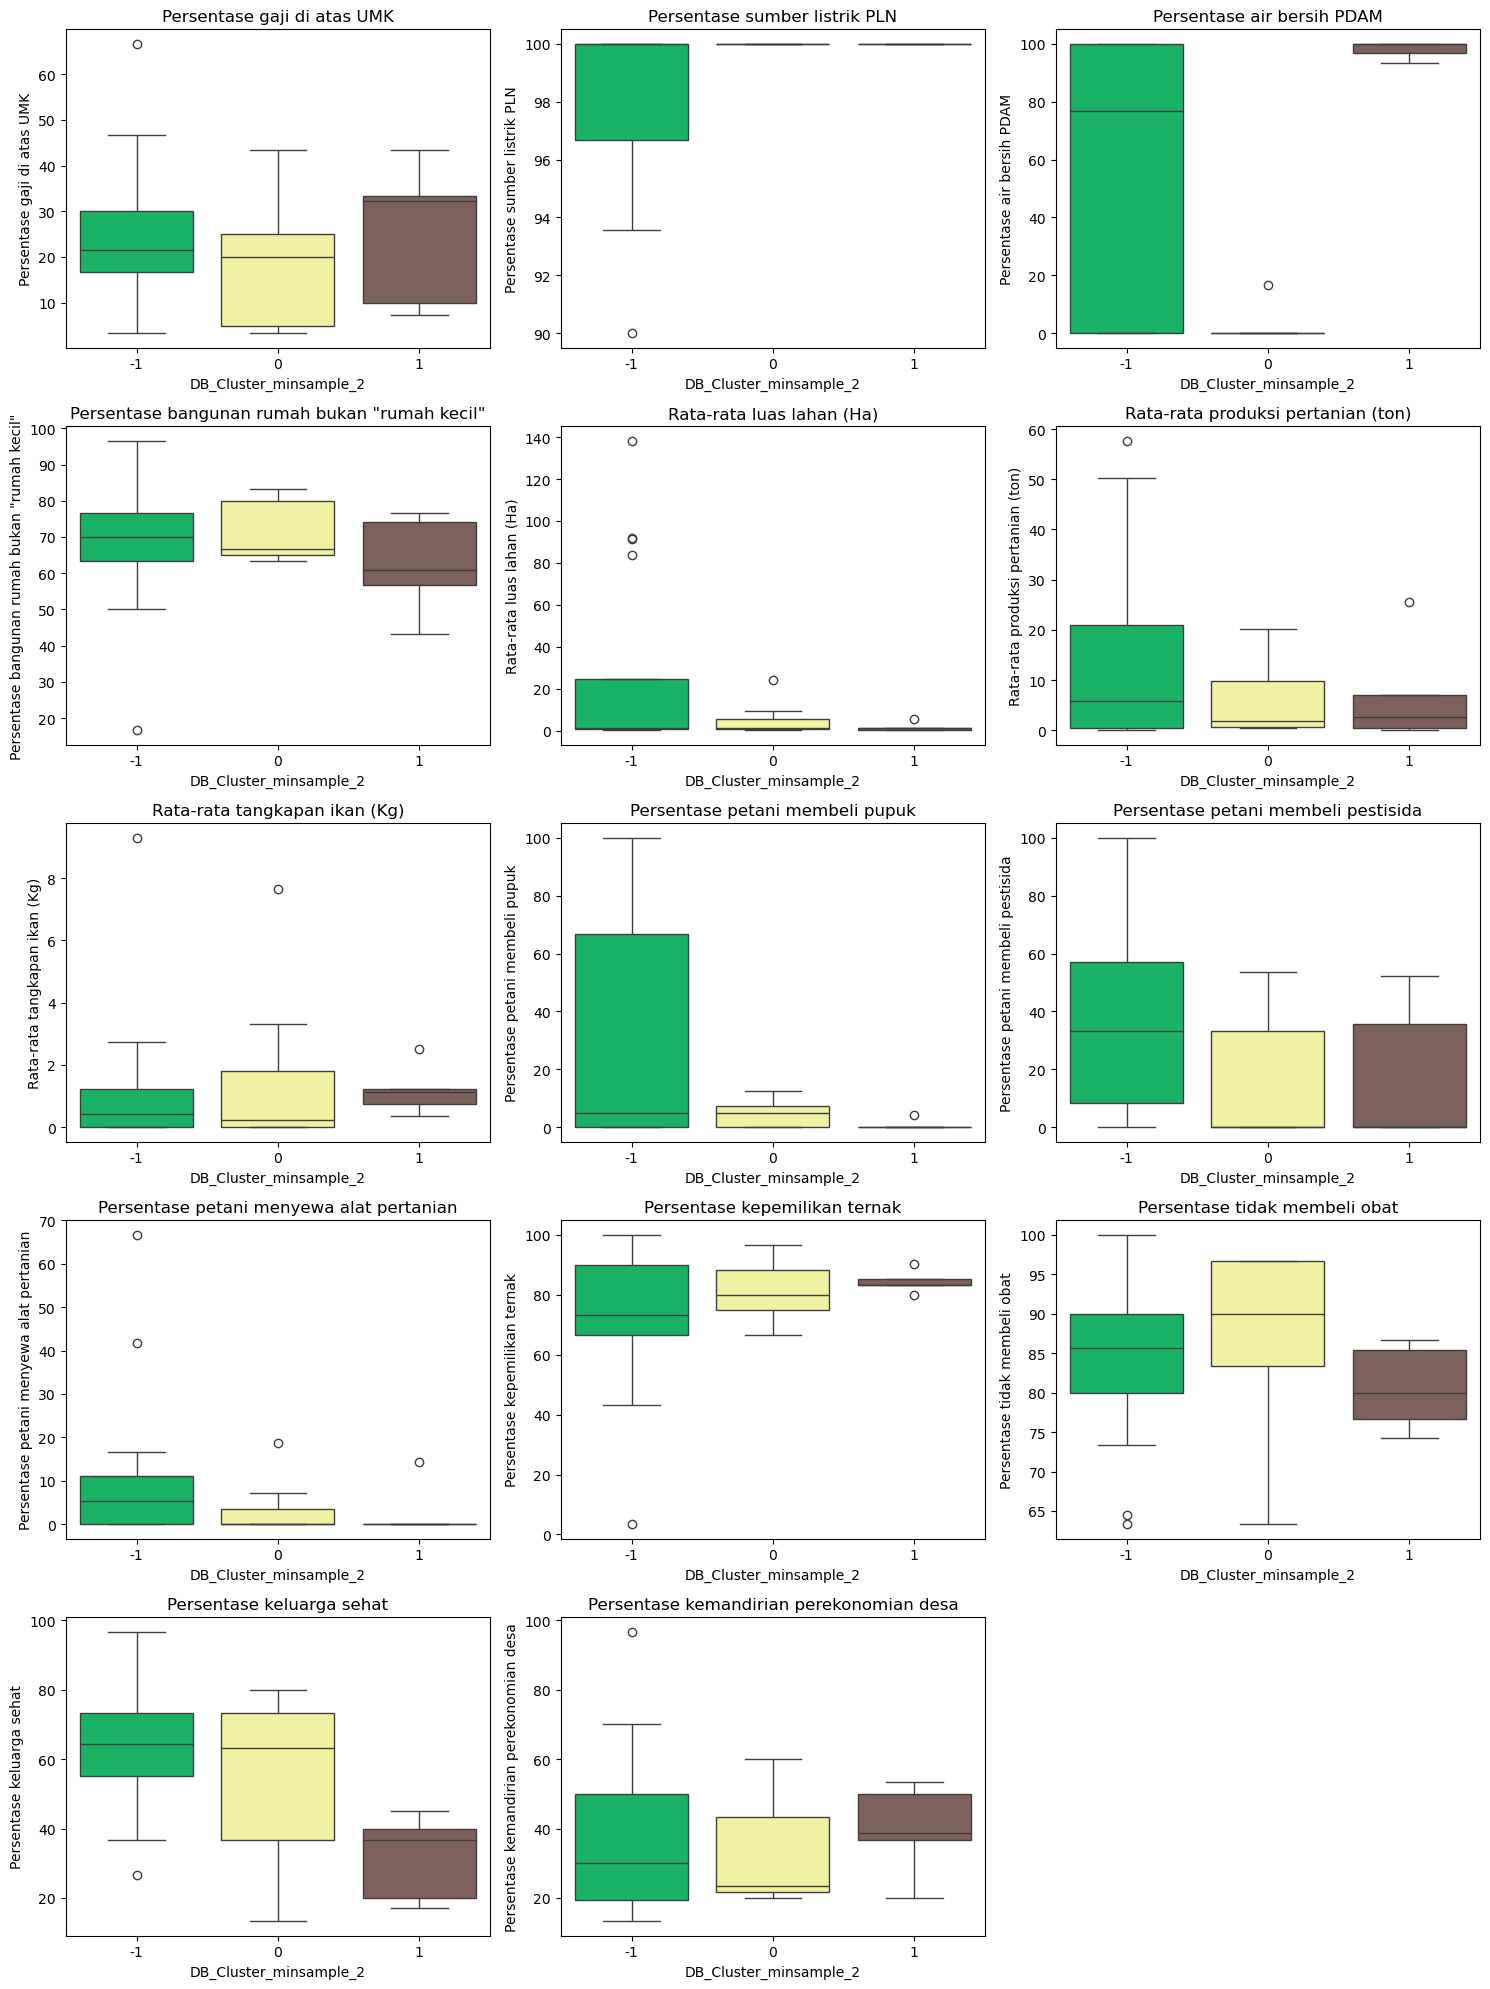

In [289]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_2", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

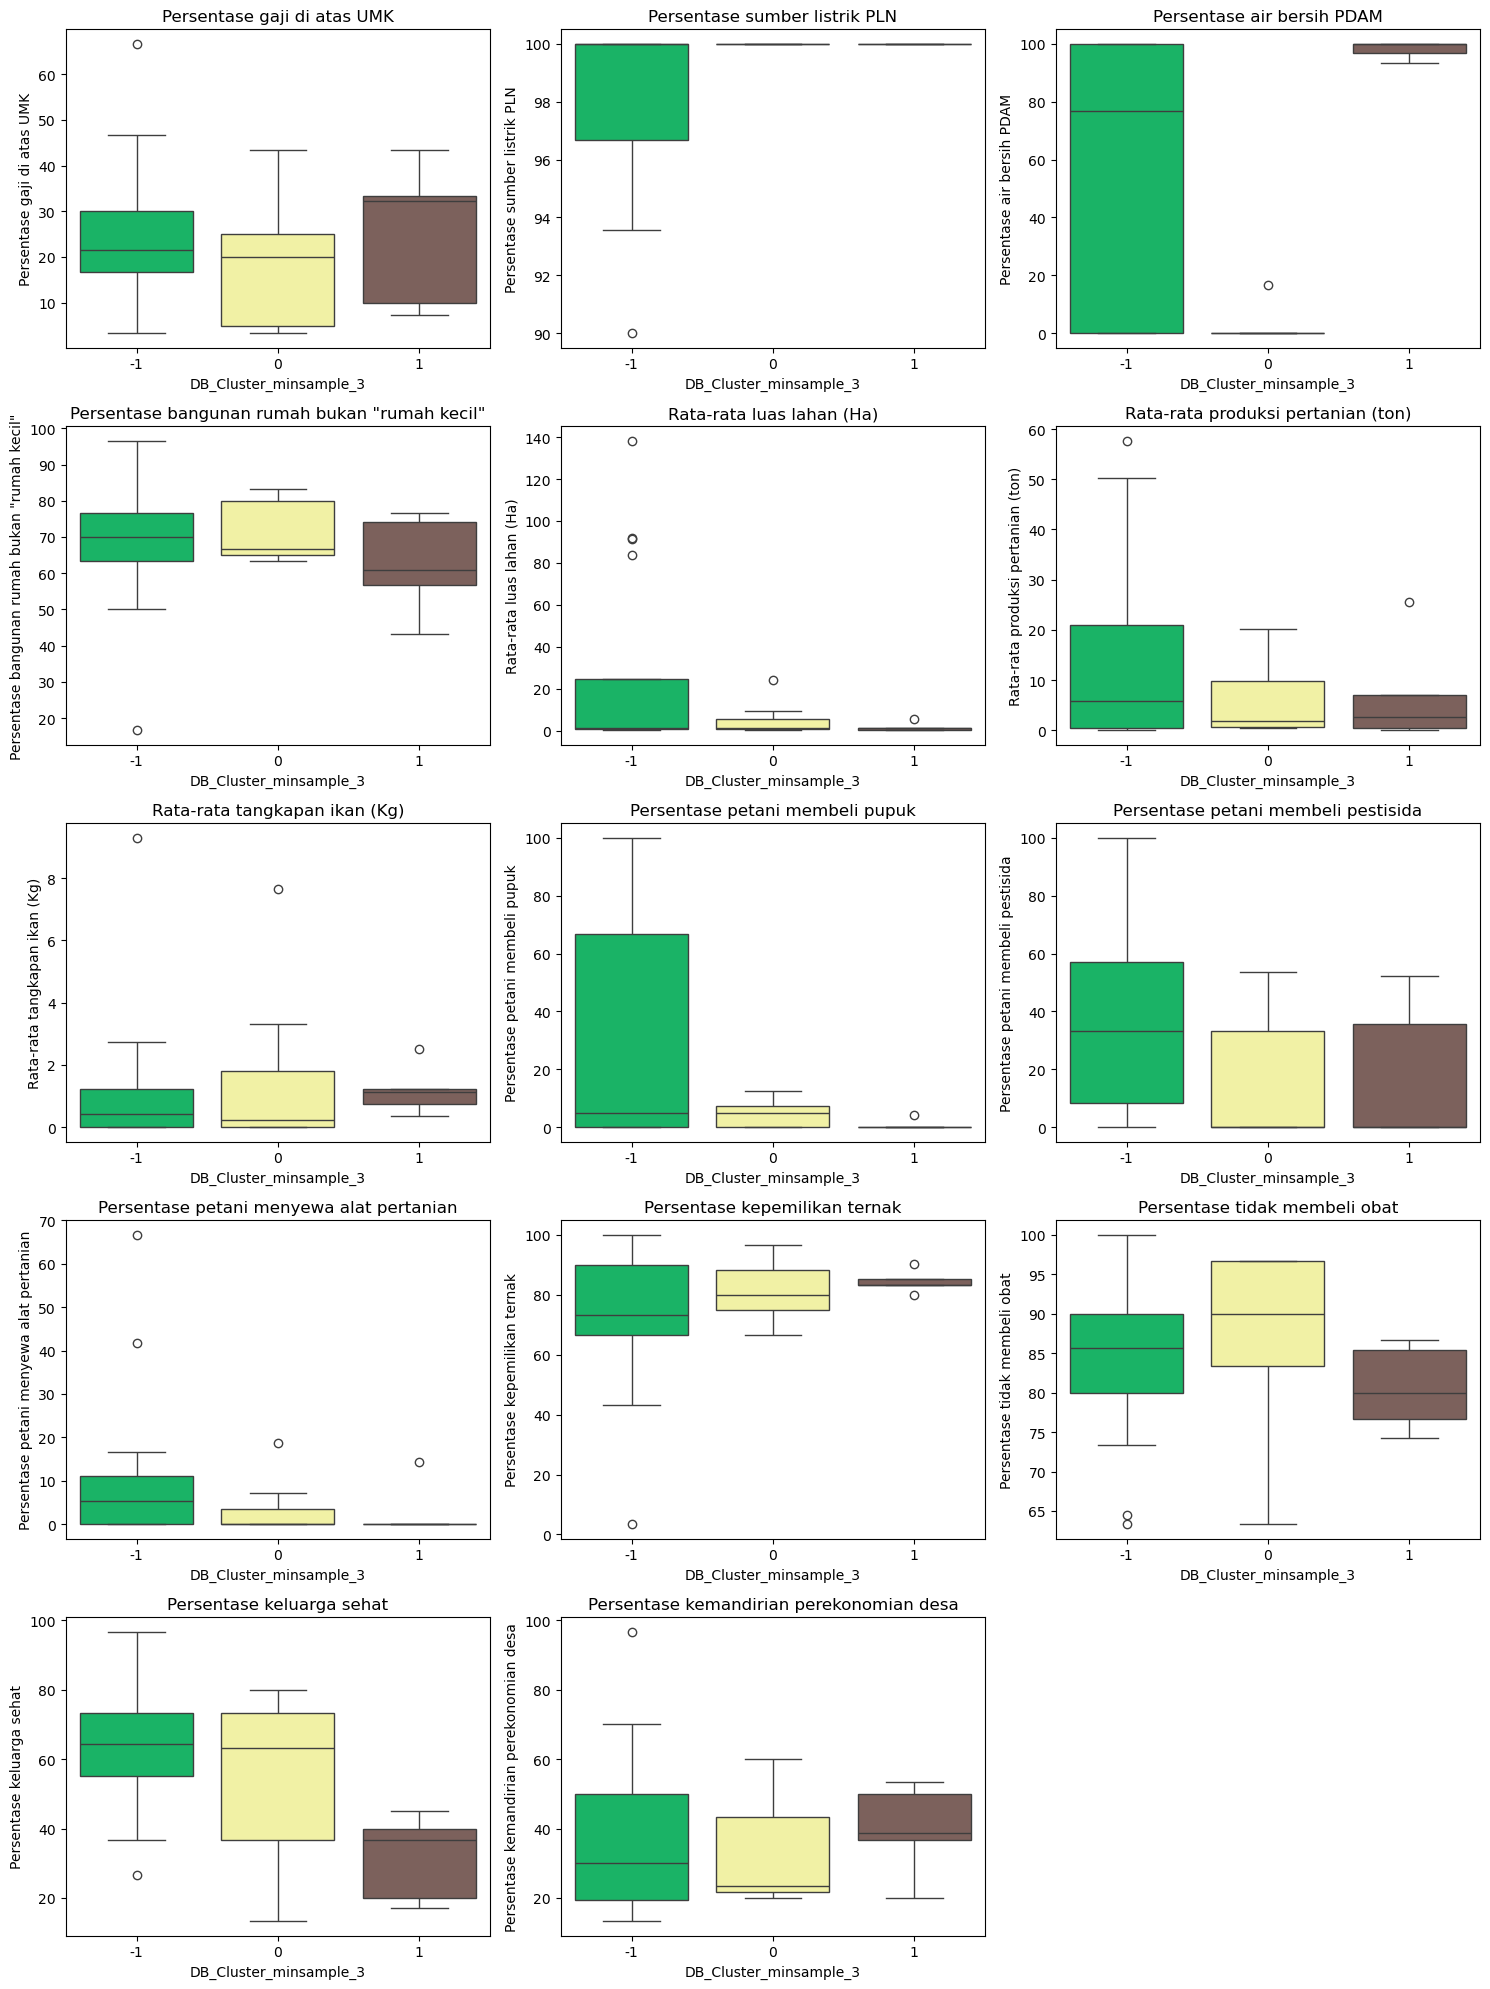

In [290]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_3", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### grafik (line or bar)

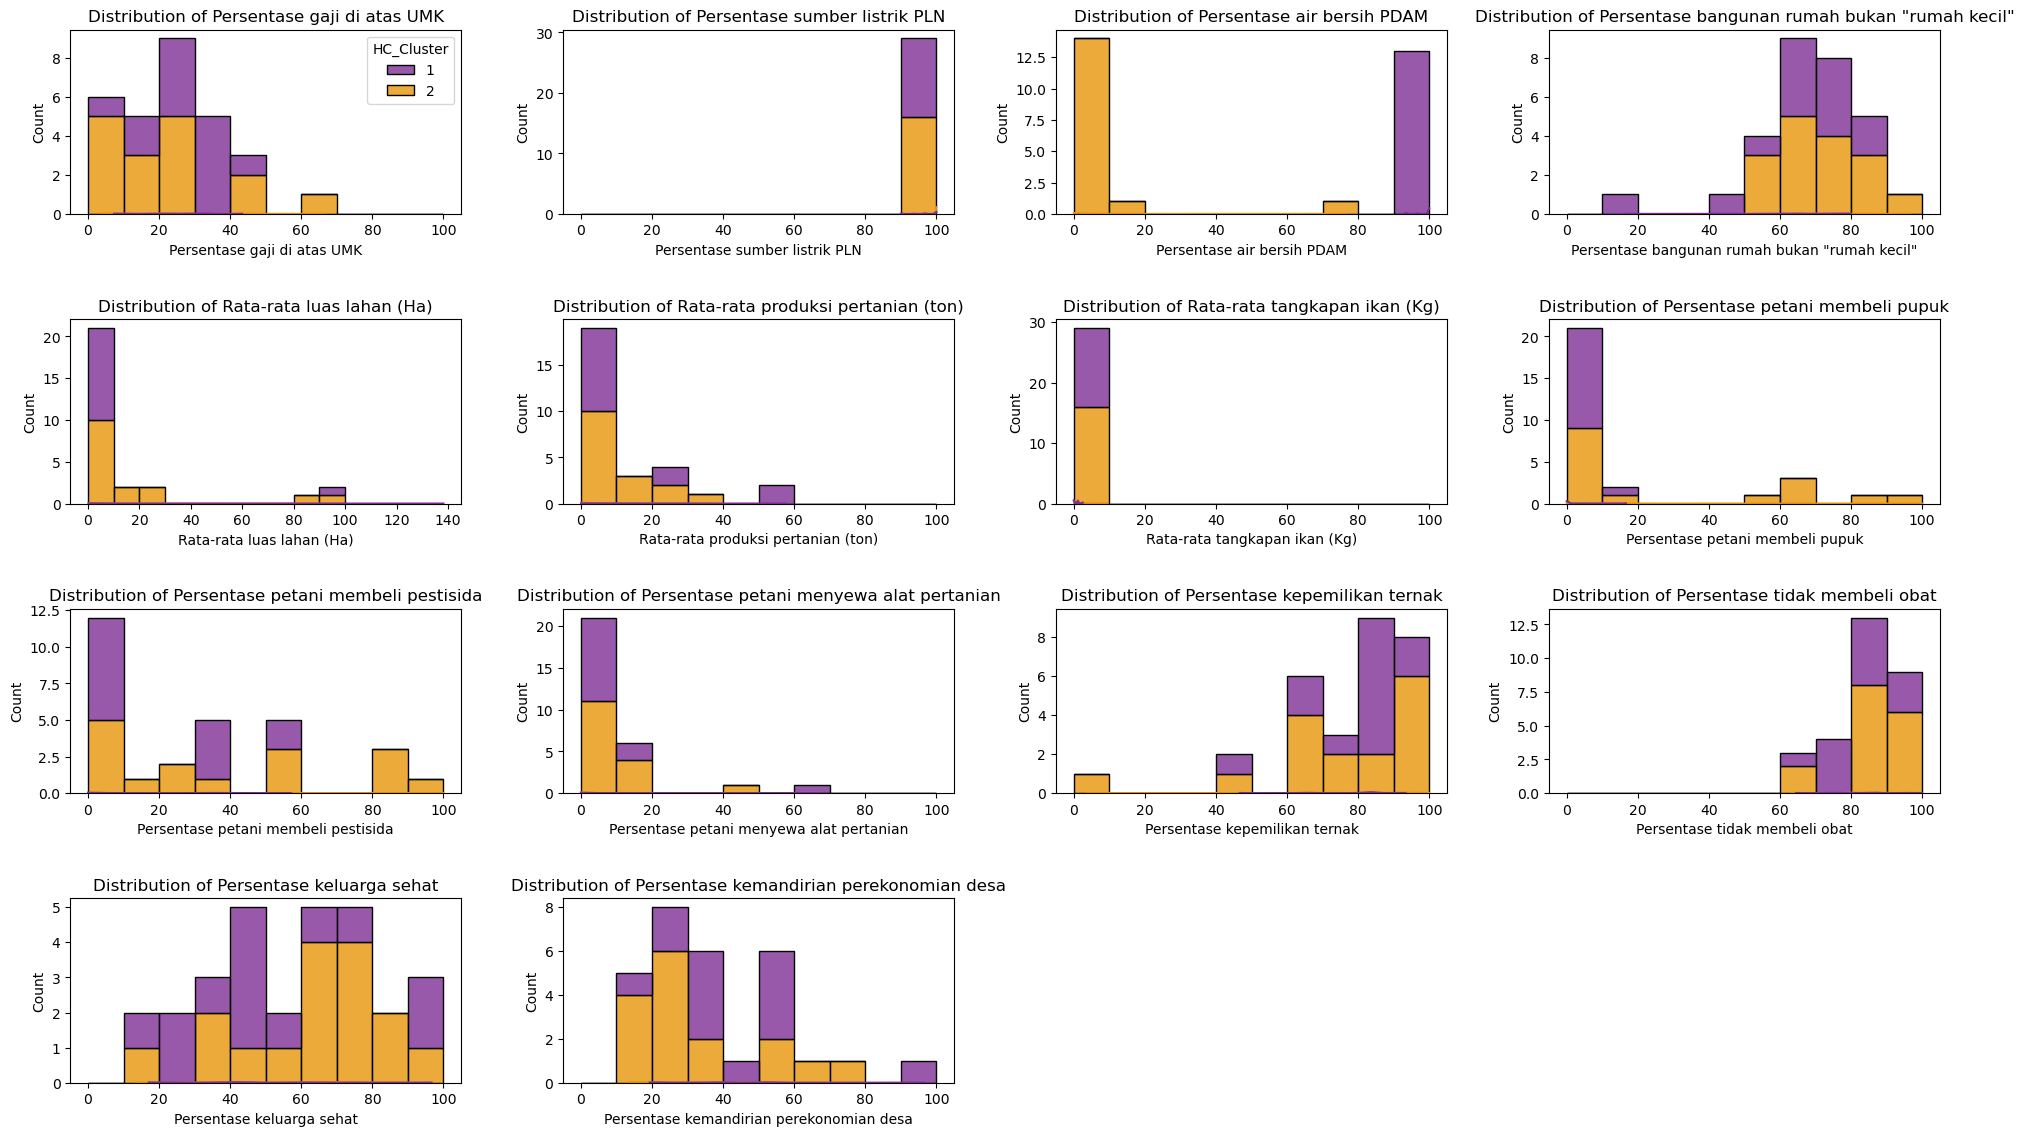

In [313]:
# Bar chart with line (HC)

# 3) Gambar ulang grid histogram seperti sebelumnya, tapi berwarna per-cluster
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

cols = 4

for i, col in enumerate(numerical_cols):
    # --- BAGIAN 1: HISTOGRAM TANPA GARIS KDE ---
    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        bins=range(0, 110, 10),
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.8,
        palette="CMRmap",
        kde=False, # NONAKTIFKAN KDE di histplot
        ax=axes[i],
        legend=(i==0) # Hanya tampilkan legend di plot pertama
    )
    
    # --- BAGIAN 2: GARIS KDE DITAMBAHKAN SECARA MANUAL ---
    # Tambahkan KDEplot di atas histogram
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        palette="CMRmap",
        ax=axes[i],
        bw_adjust=0.2, 
        cut=0, 
        legend=False 
    )
    
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

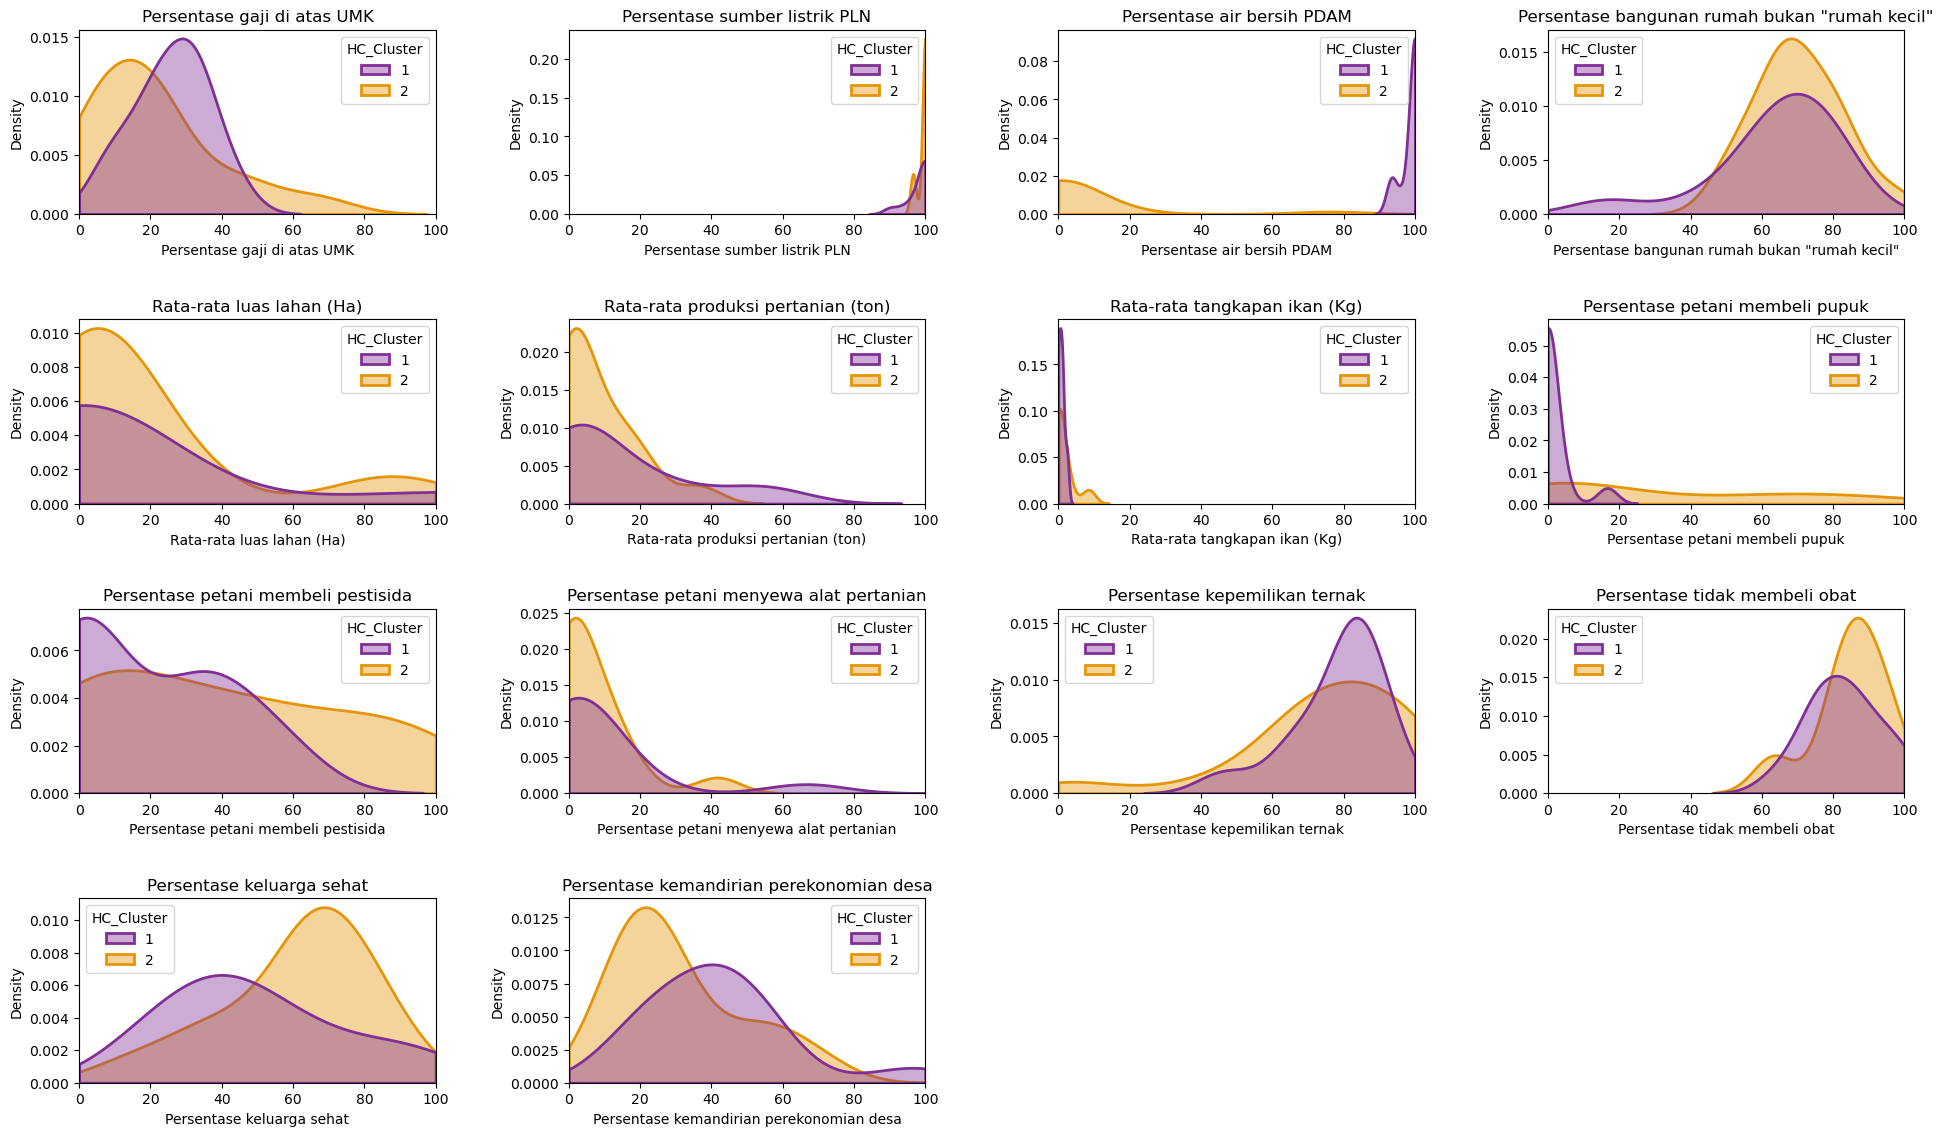

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur tata letak subplot
# Gantilah 'rows' dan 'cols' dengan jumlah baris dan kolom yang sesuai dengan 
# jumlah atribut numerik Anda (misalnya: 3, 3)
# Contoh: rows = 3, cols = 3 
# Catatan: Pastikan 'numerical_cols' sudah didefinisikan!

cols = 4 

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

# Tentukan palet warna (menggunakan warna ungu/oranye seperti sebelumnya)
custom_palette = {"1": "purple", "2": "orange"} 

for i, col in enumerate(numerical_cols):
    # sns.kdeplot digunakan untuk membuat line chart densitas (garis)
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        palette="CMRmap", # Gunakan palet warna yang konsisten
        fill=True, # Isi area di bawah garis dengan warna untuk visualisasi yang lebih baik
        alpha=0.4, # Transparansi area yang diisi
        linewidth=2, # Ketebalan garis
        ax=axes[i],
        # Atur batas (clip) agar garis tidak menyebar terlalu jauh, 
        # ini membantu masalah 'PDAM' sebelumnya
        clip=(0, 100) 
    )
    
    # Atur batas sumbu X secara eksplisit
    axes[i].set_xlim(0, 100)
    
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Hapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

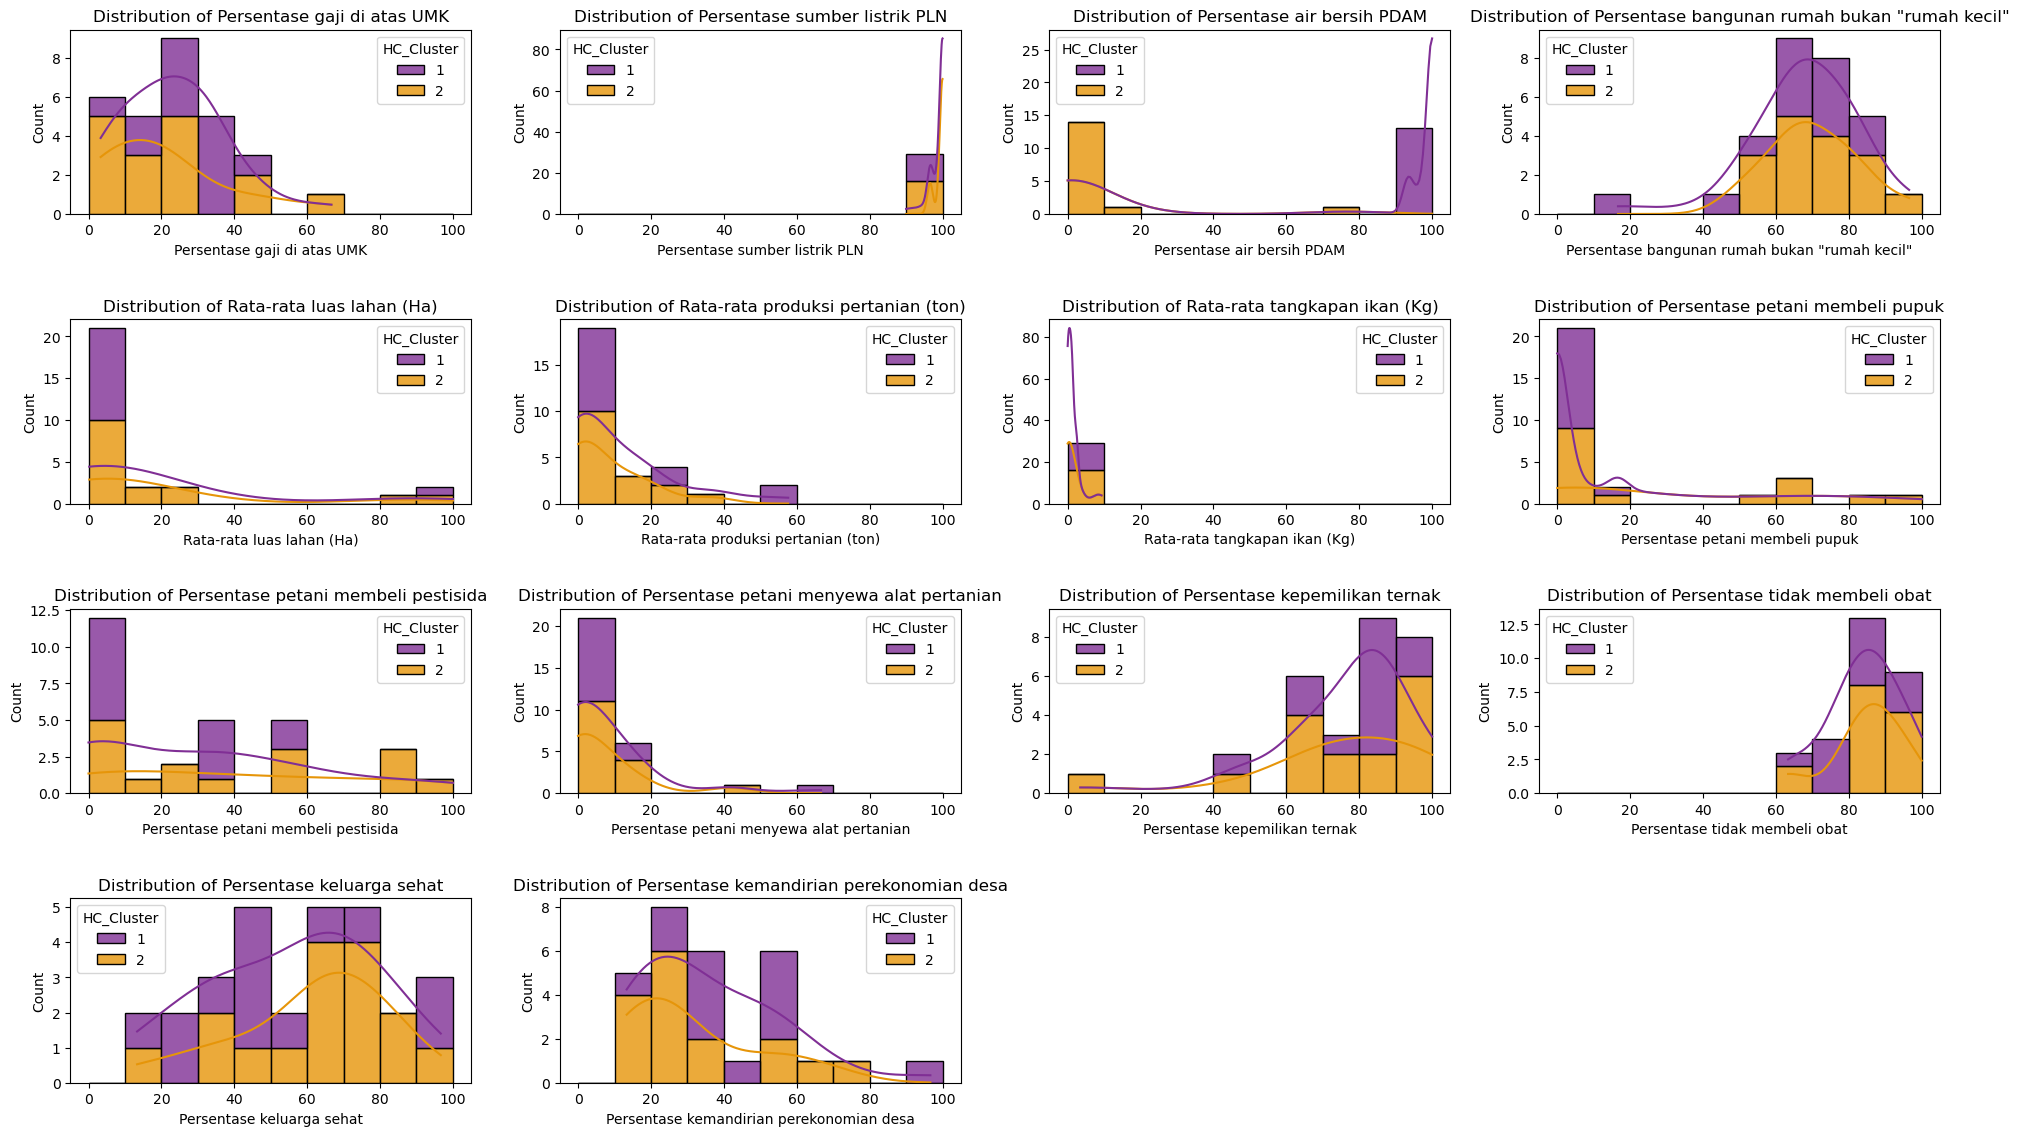

In [307]:
# Bar chart with line (HC)

# 2) Palet warna terang biar konsisten
palette = {0: "#A6CEE3", 1: "#FDBF6F", 2: "#B2DF8A", 3: "#CAB2D6"}

cols = 4

# 3) Gambar ulang grid histogram seperti sebelumnya, tapi berwarna per-cluster
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        bins=range(0, 110, 10),
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.8,
        palette="CMRmap",
        kde=True,
        kde_kws={'clip': (0, 100)},
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

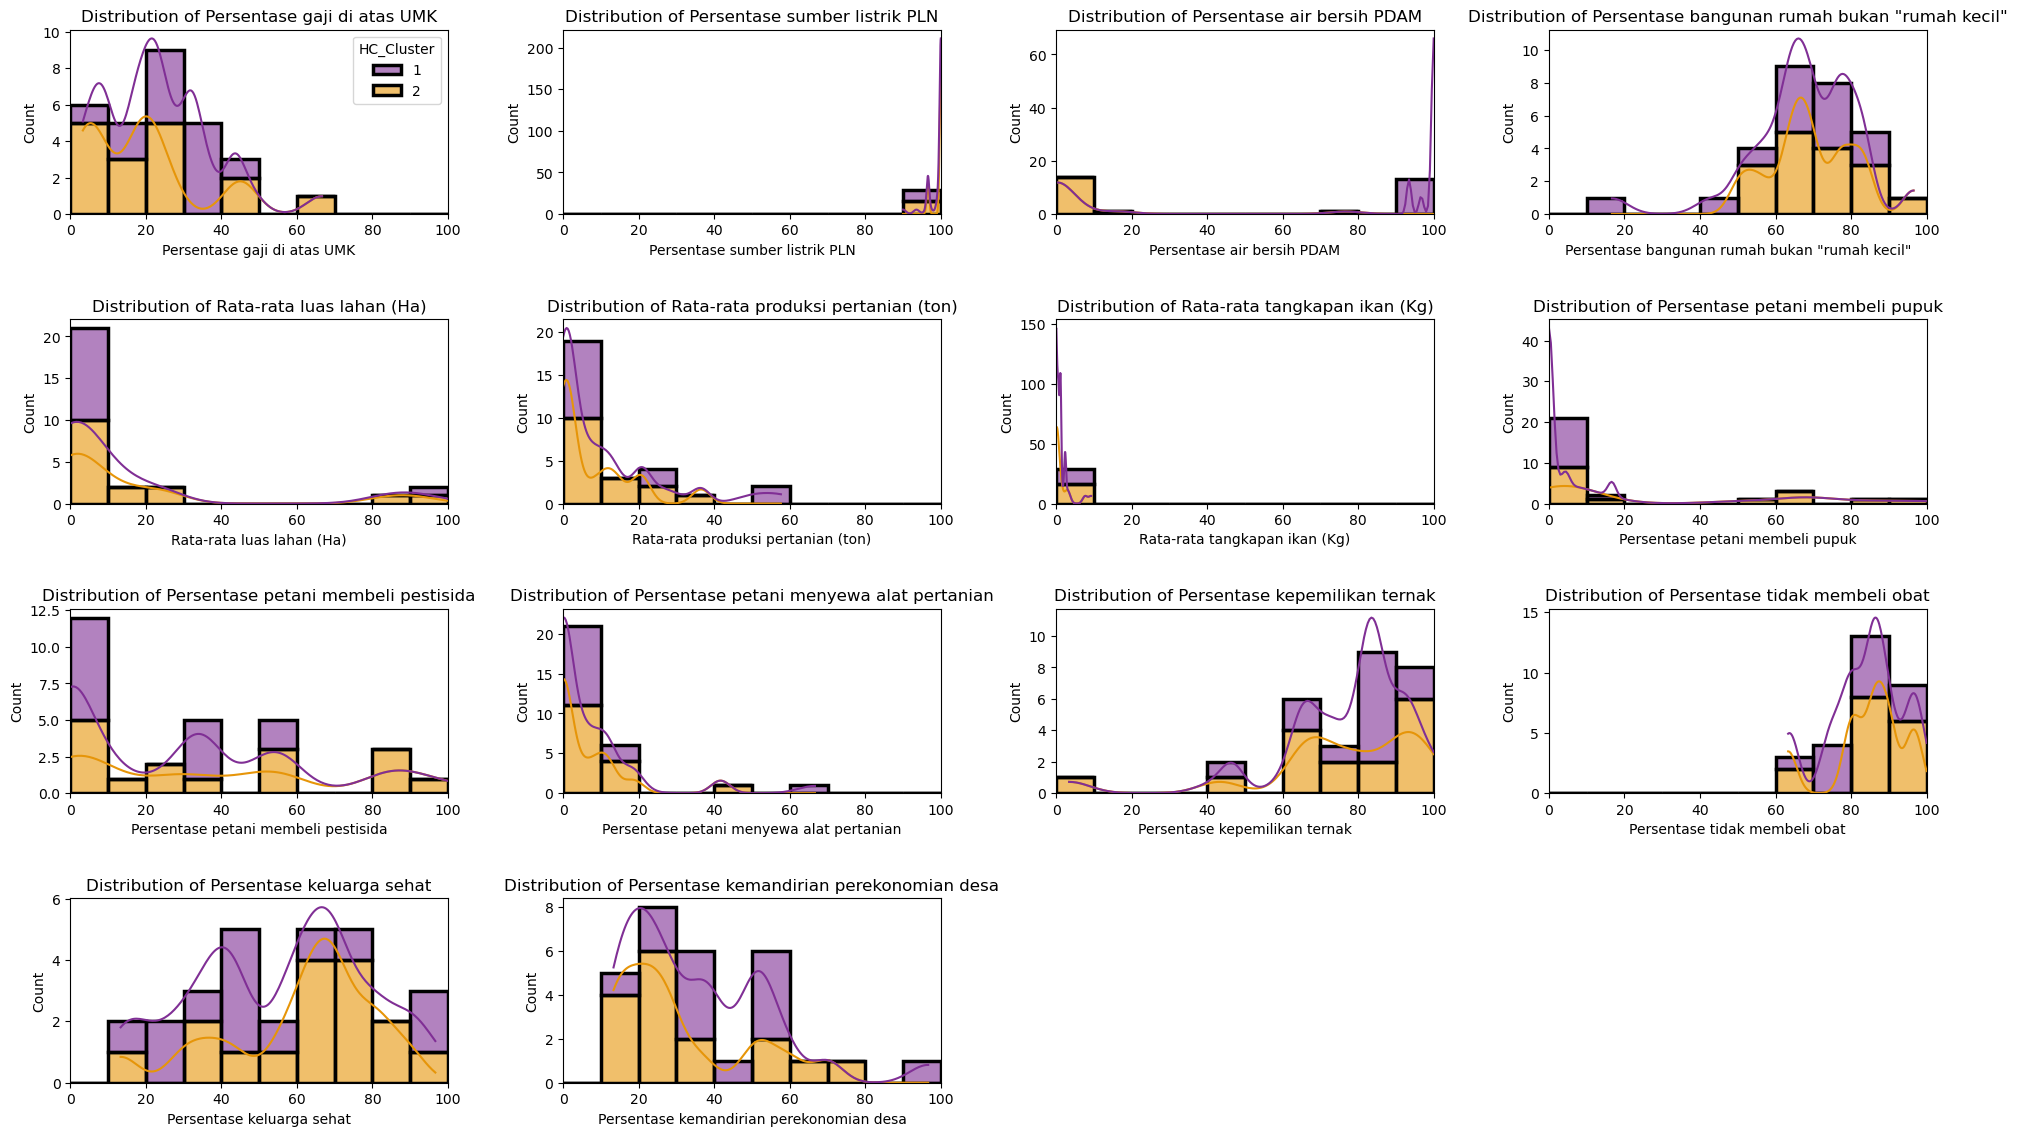

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi 'rows', 'cols', 'df_plot', dan 'numerical_cols' sudah didefinisikan

rows = 4 
cols = 4 

custom_palette = {"1": "purple", "2": "orange"} 

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3)) # Ubah figsize agar lebih besar
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i >= len(axes): 
        break

    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        bins=range(0, 110, 10), 
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.6,
        palette="CMRmap", 
        kde=True,
        kde_kws={
            # HANYA PARAMETER KDE (misalnya bw_adjust) di sini
            'bw_adjust': 0.4, 
        },
        # PINDAHKAN PARAMETER GARIS (linewidth) DI SINI:
        linewidth=2.5, # Ini akan diterapkan pada garis tepi batang dan garis KDE
        ax=axes[i],
        legend=(i==0)
    )
    
    axes[i].set_xlim(0, 100)
    
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

### GRAFIK

C:\Users\halid\AppData\Local\Temp\ipykernel_4352\1982953943.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_4352\1982953943.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


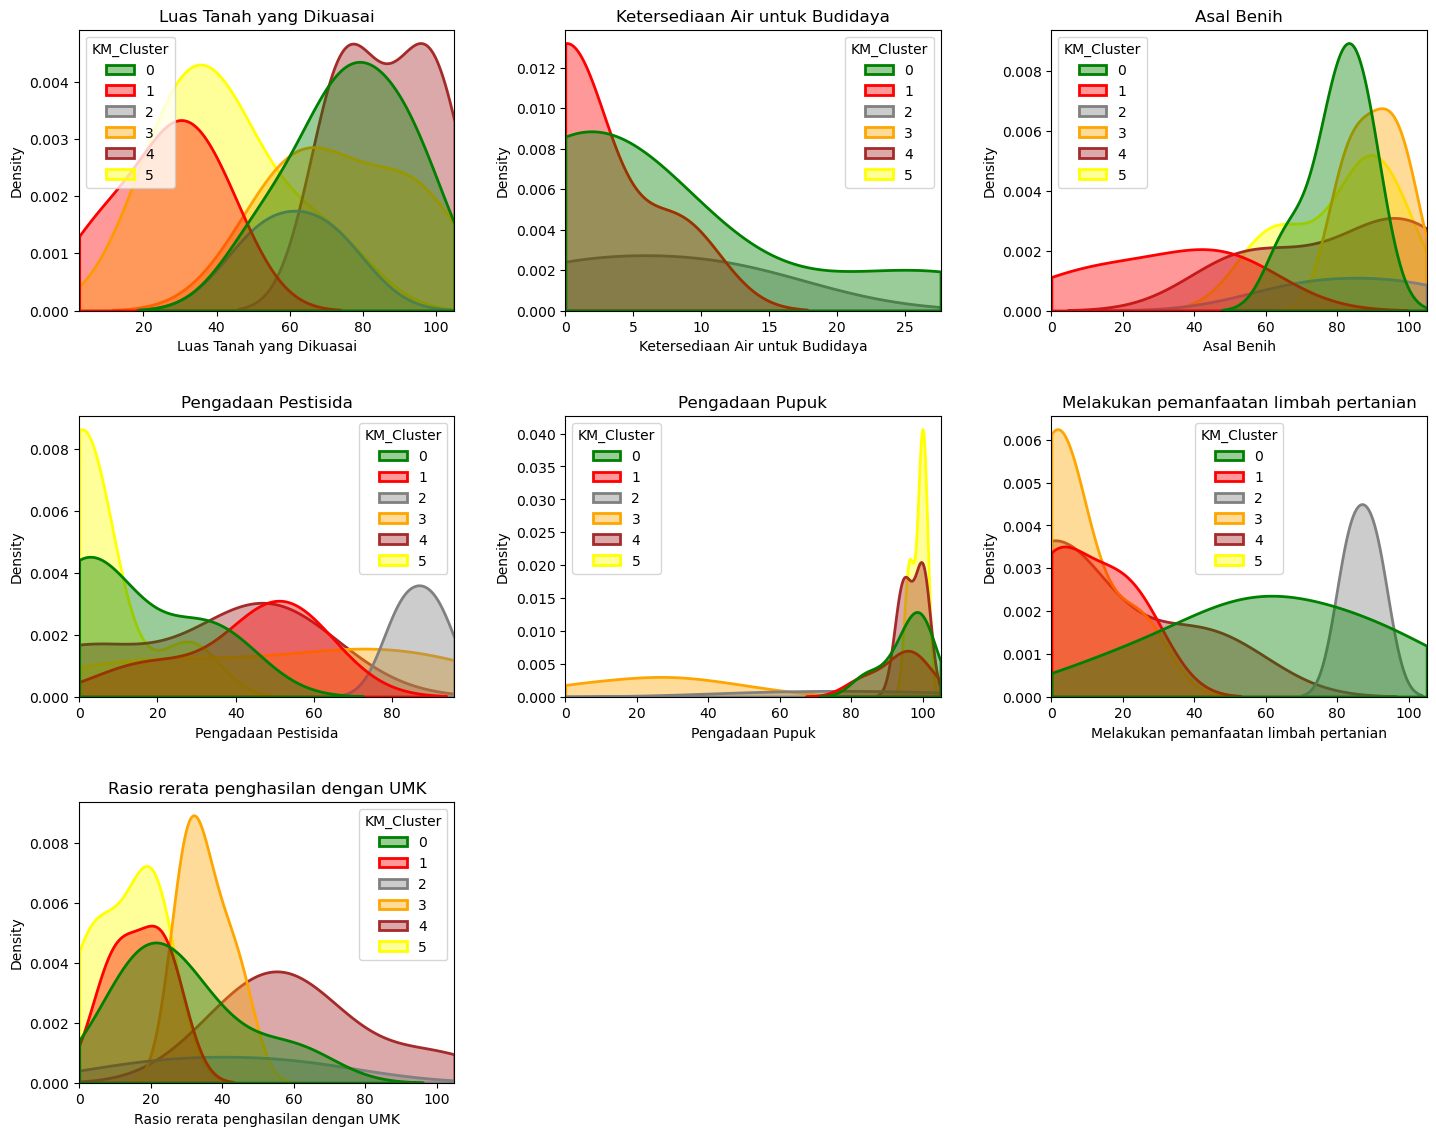

In [36]:
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red", 2:"grey", 3:"orange", 4:"brown", 5:"yellow"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster",
        palette=custom_palette,
        hue_order=[0, 1,2,3,4,5],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

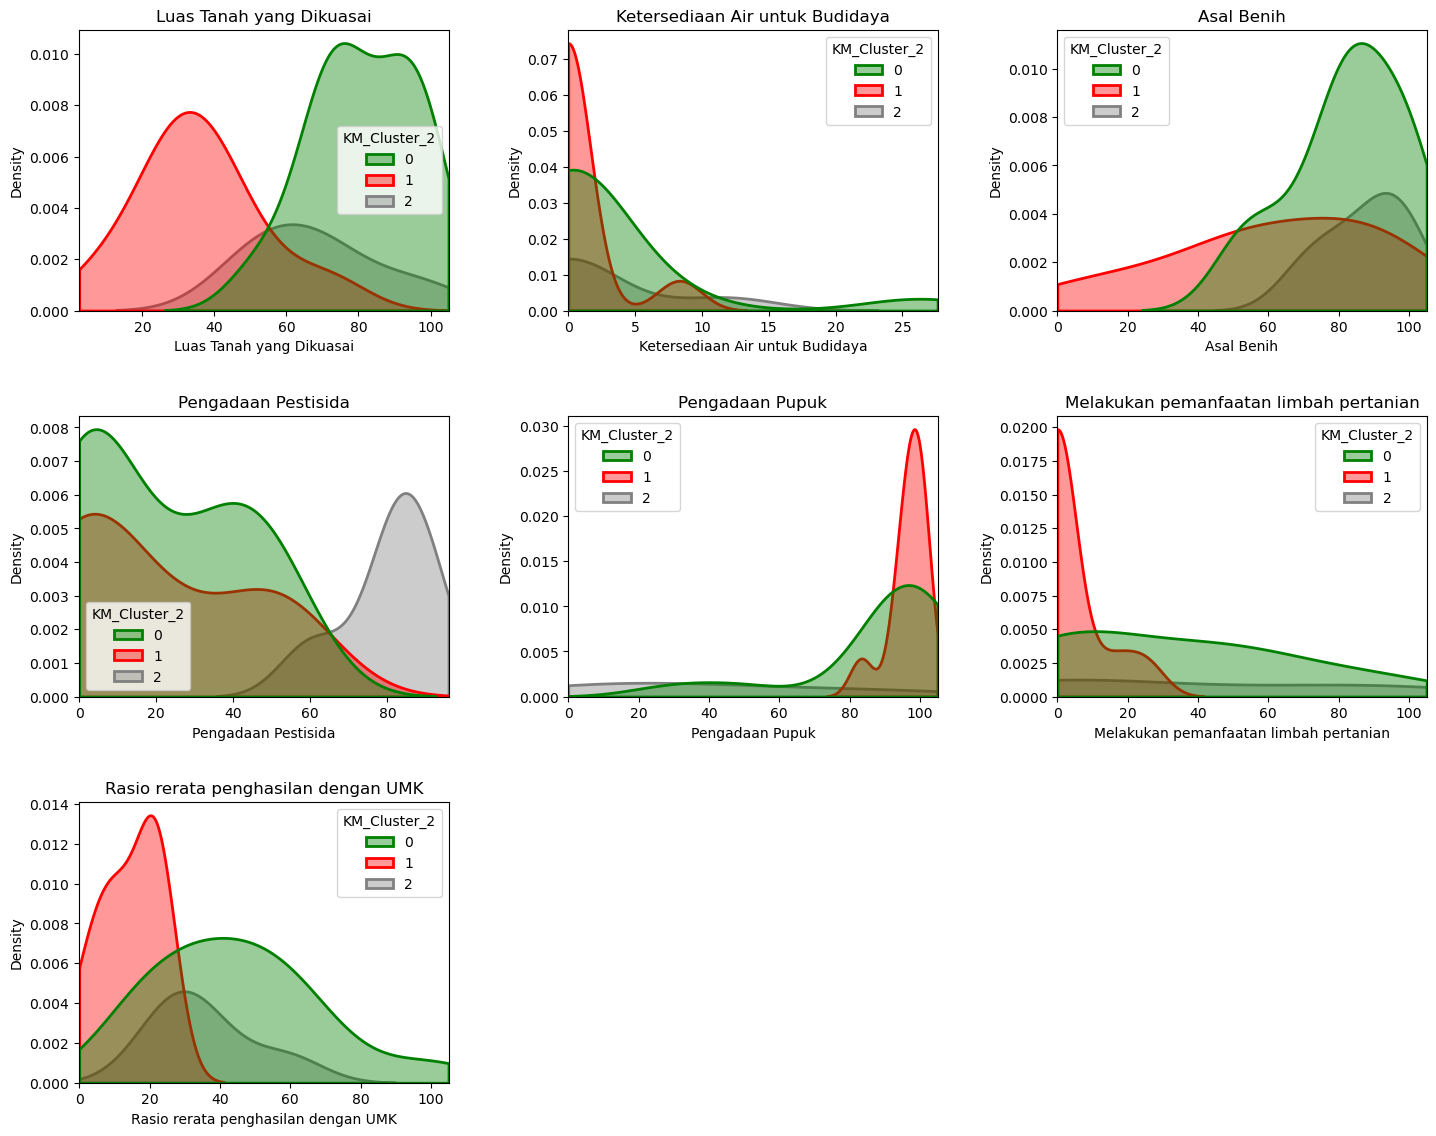

In [62]:
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red", 2:"grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster_2",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_4352\494297611.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


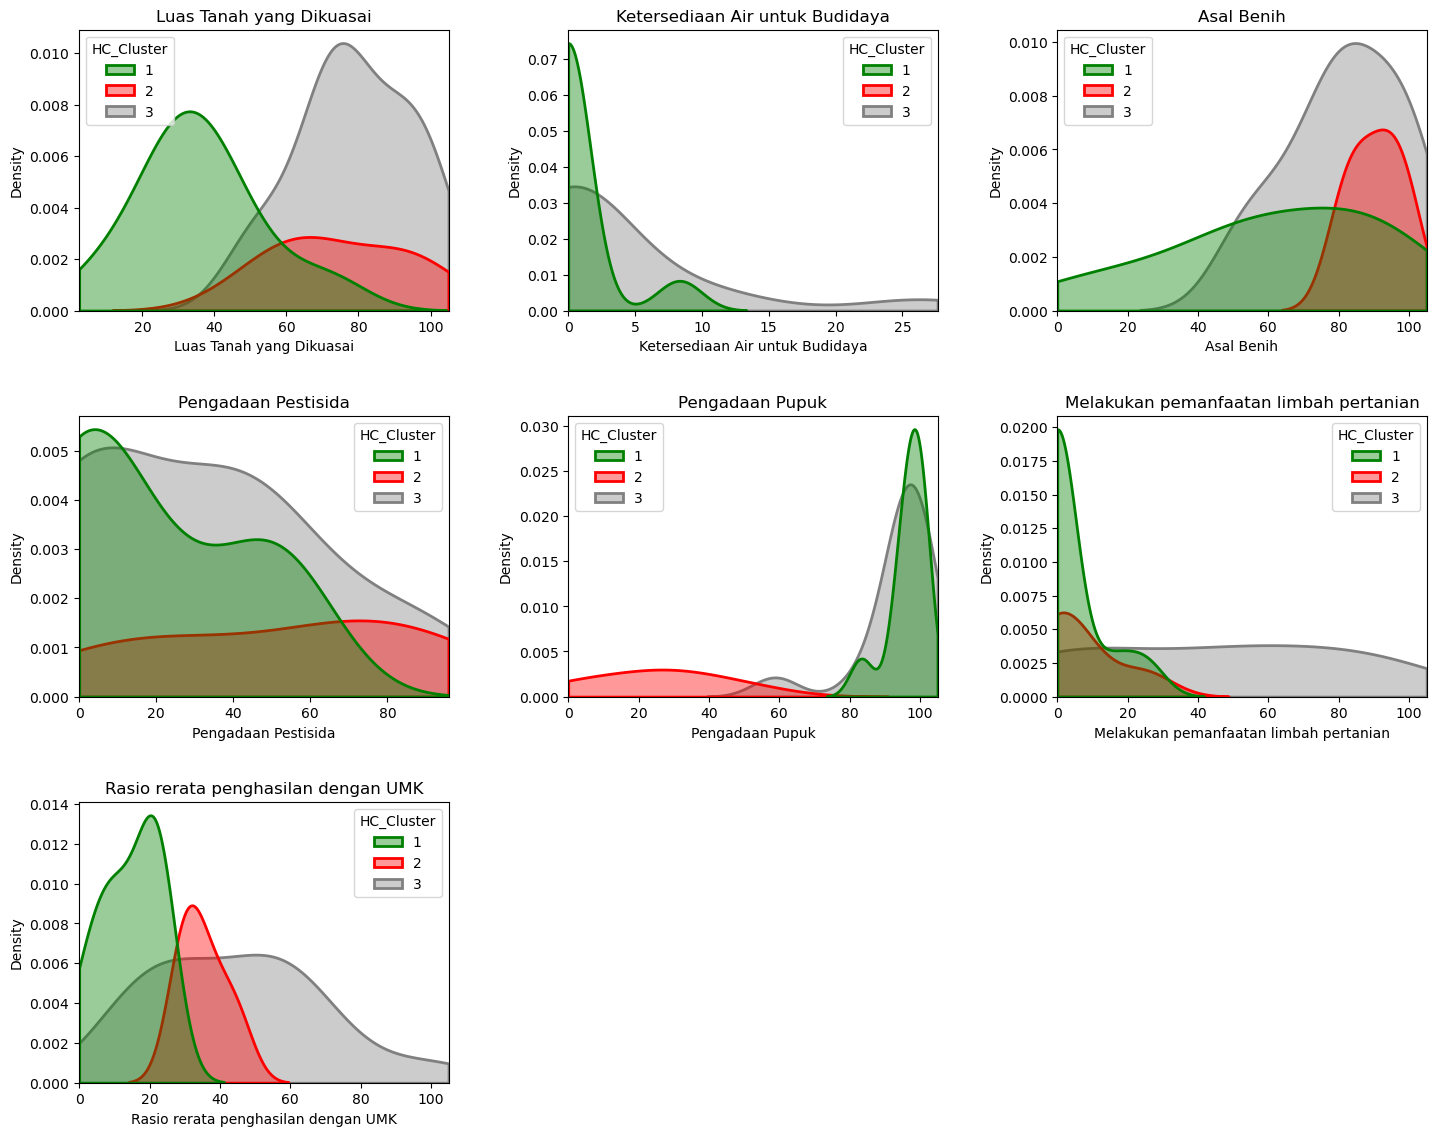

In [73]:
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

custom_palette = {1: "green", 2: "red", 3:"grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        palette=custom_palette,
        hue_order=[1, 2, 3],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_4352\2266965491.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_4352\2266965491.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_4352\2266965491.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


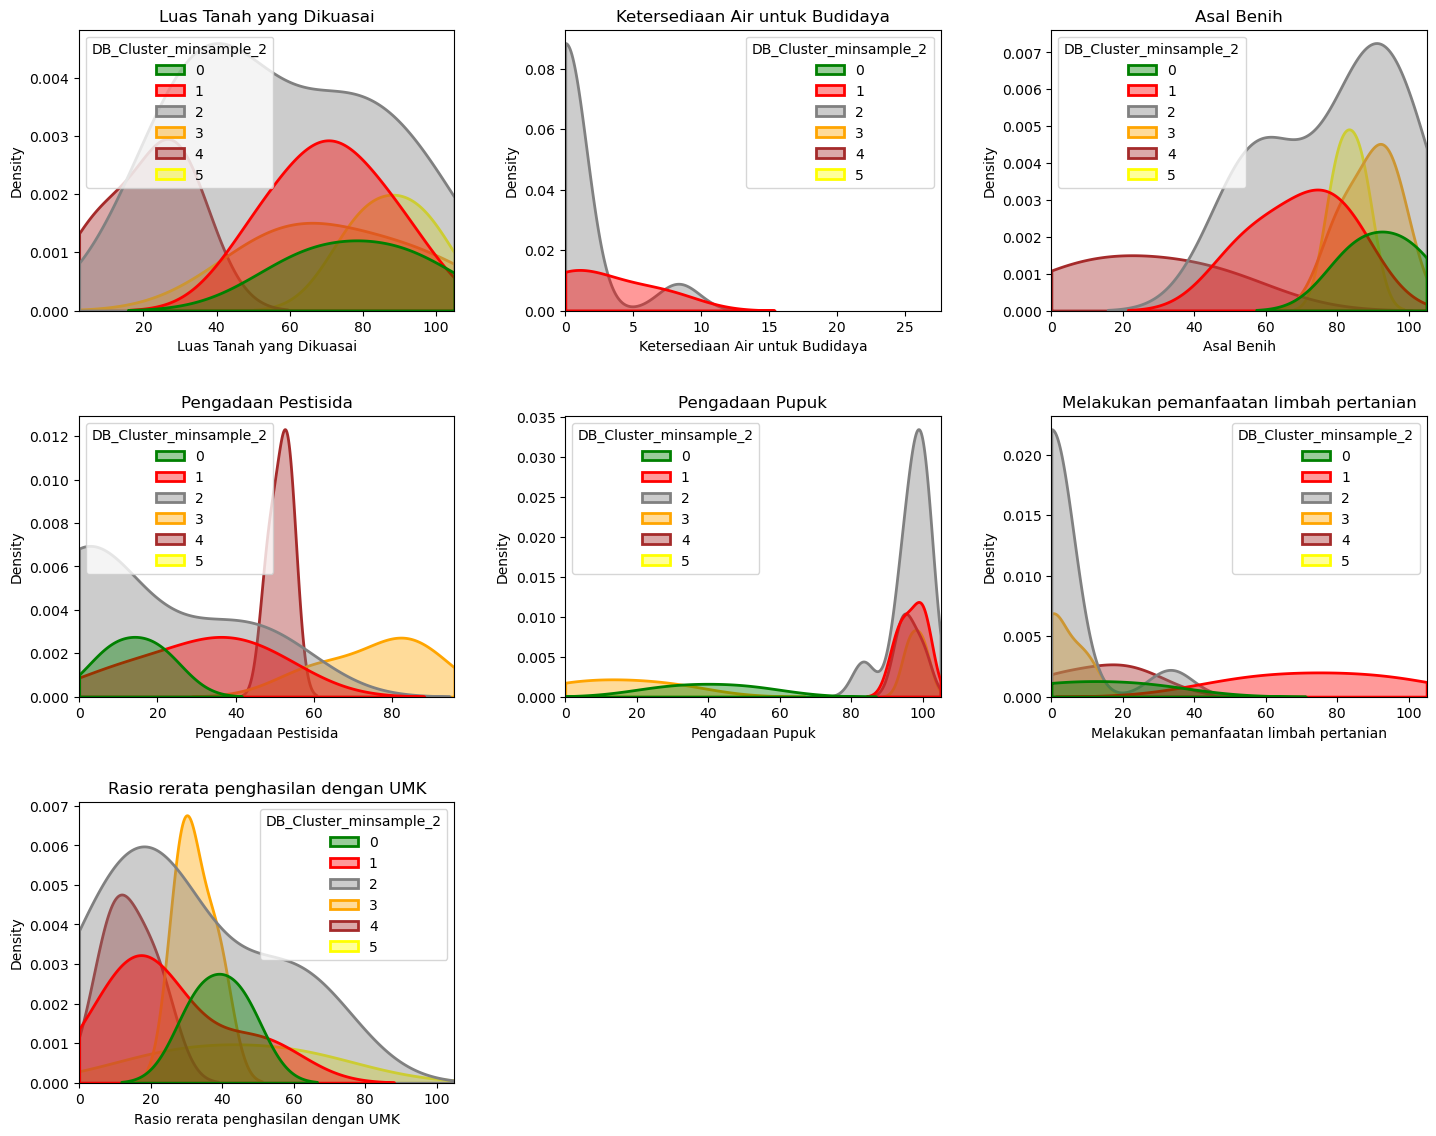

In [96]:
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red", 2:"grey", 3:"orange", 4:"brown", 5:"yellow"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_2",
        palette=custom_palette,
        hue_order=[0, 1,2,3,4,5],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_4352\472481462.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


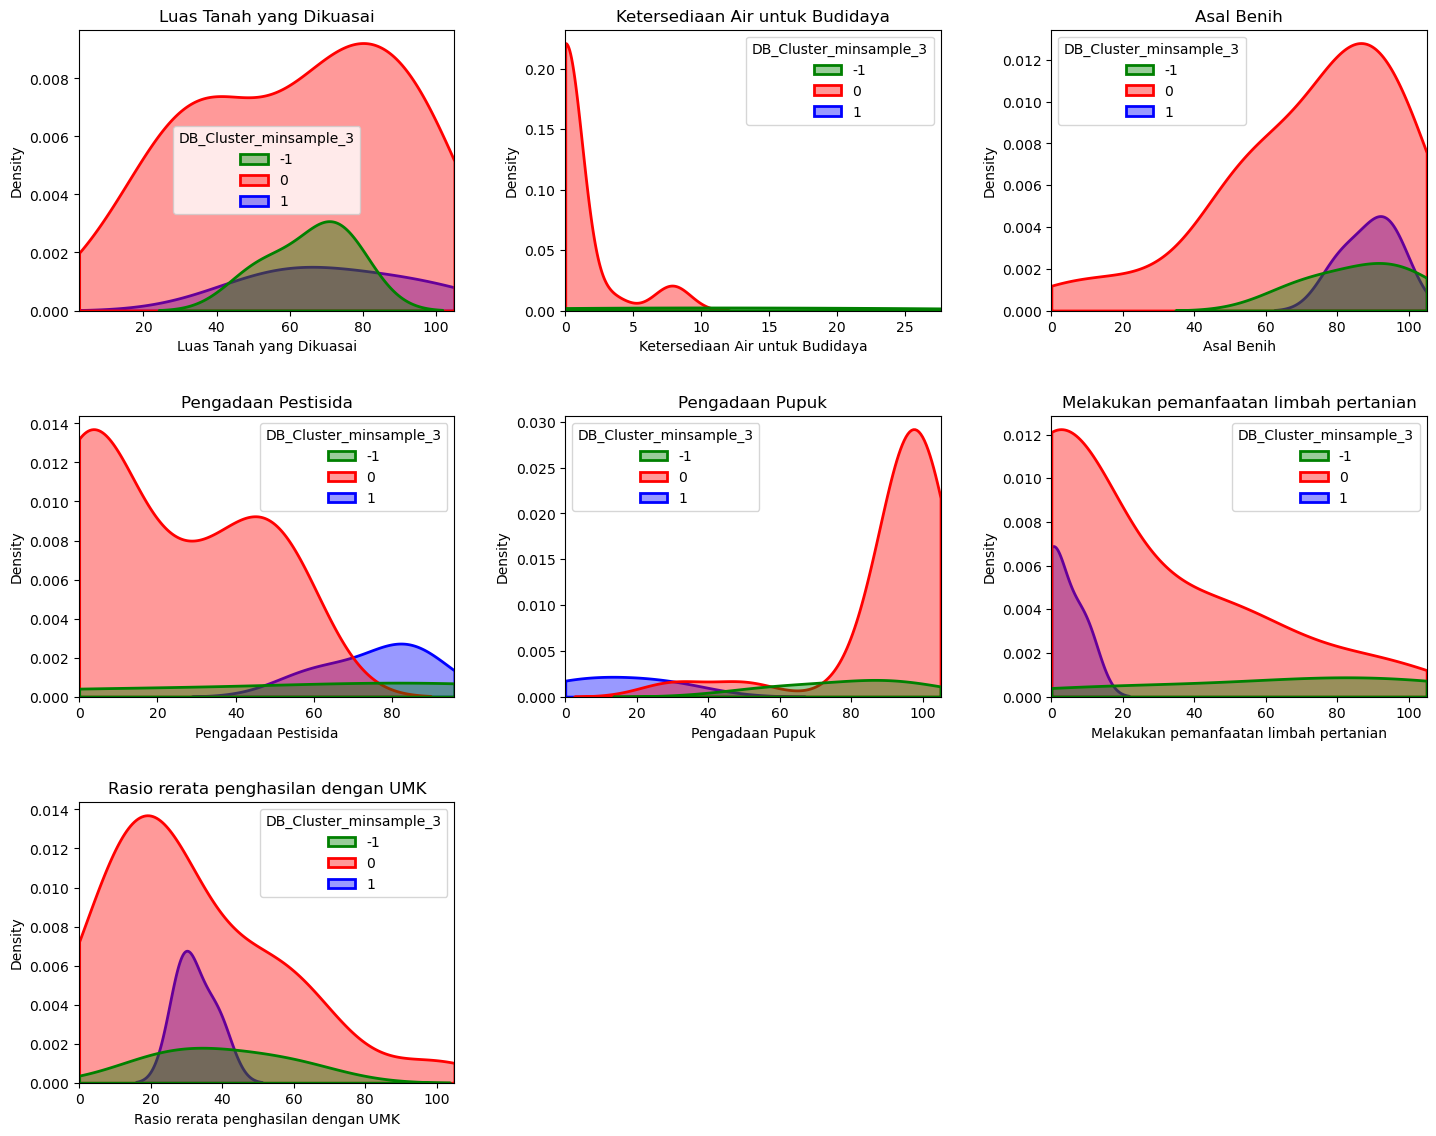

In [98]:
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

custom_palette = {-1: "green", 0: "red", 1: "blue"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_3",
        palette=custom_palette,
        hue_order=[-1, 0, 1],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

## PCA

### Boxplot

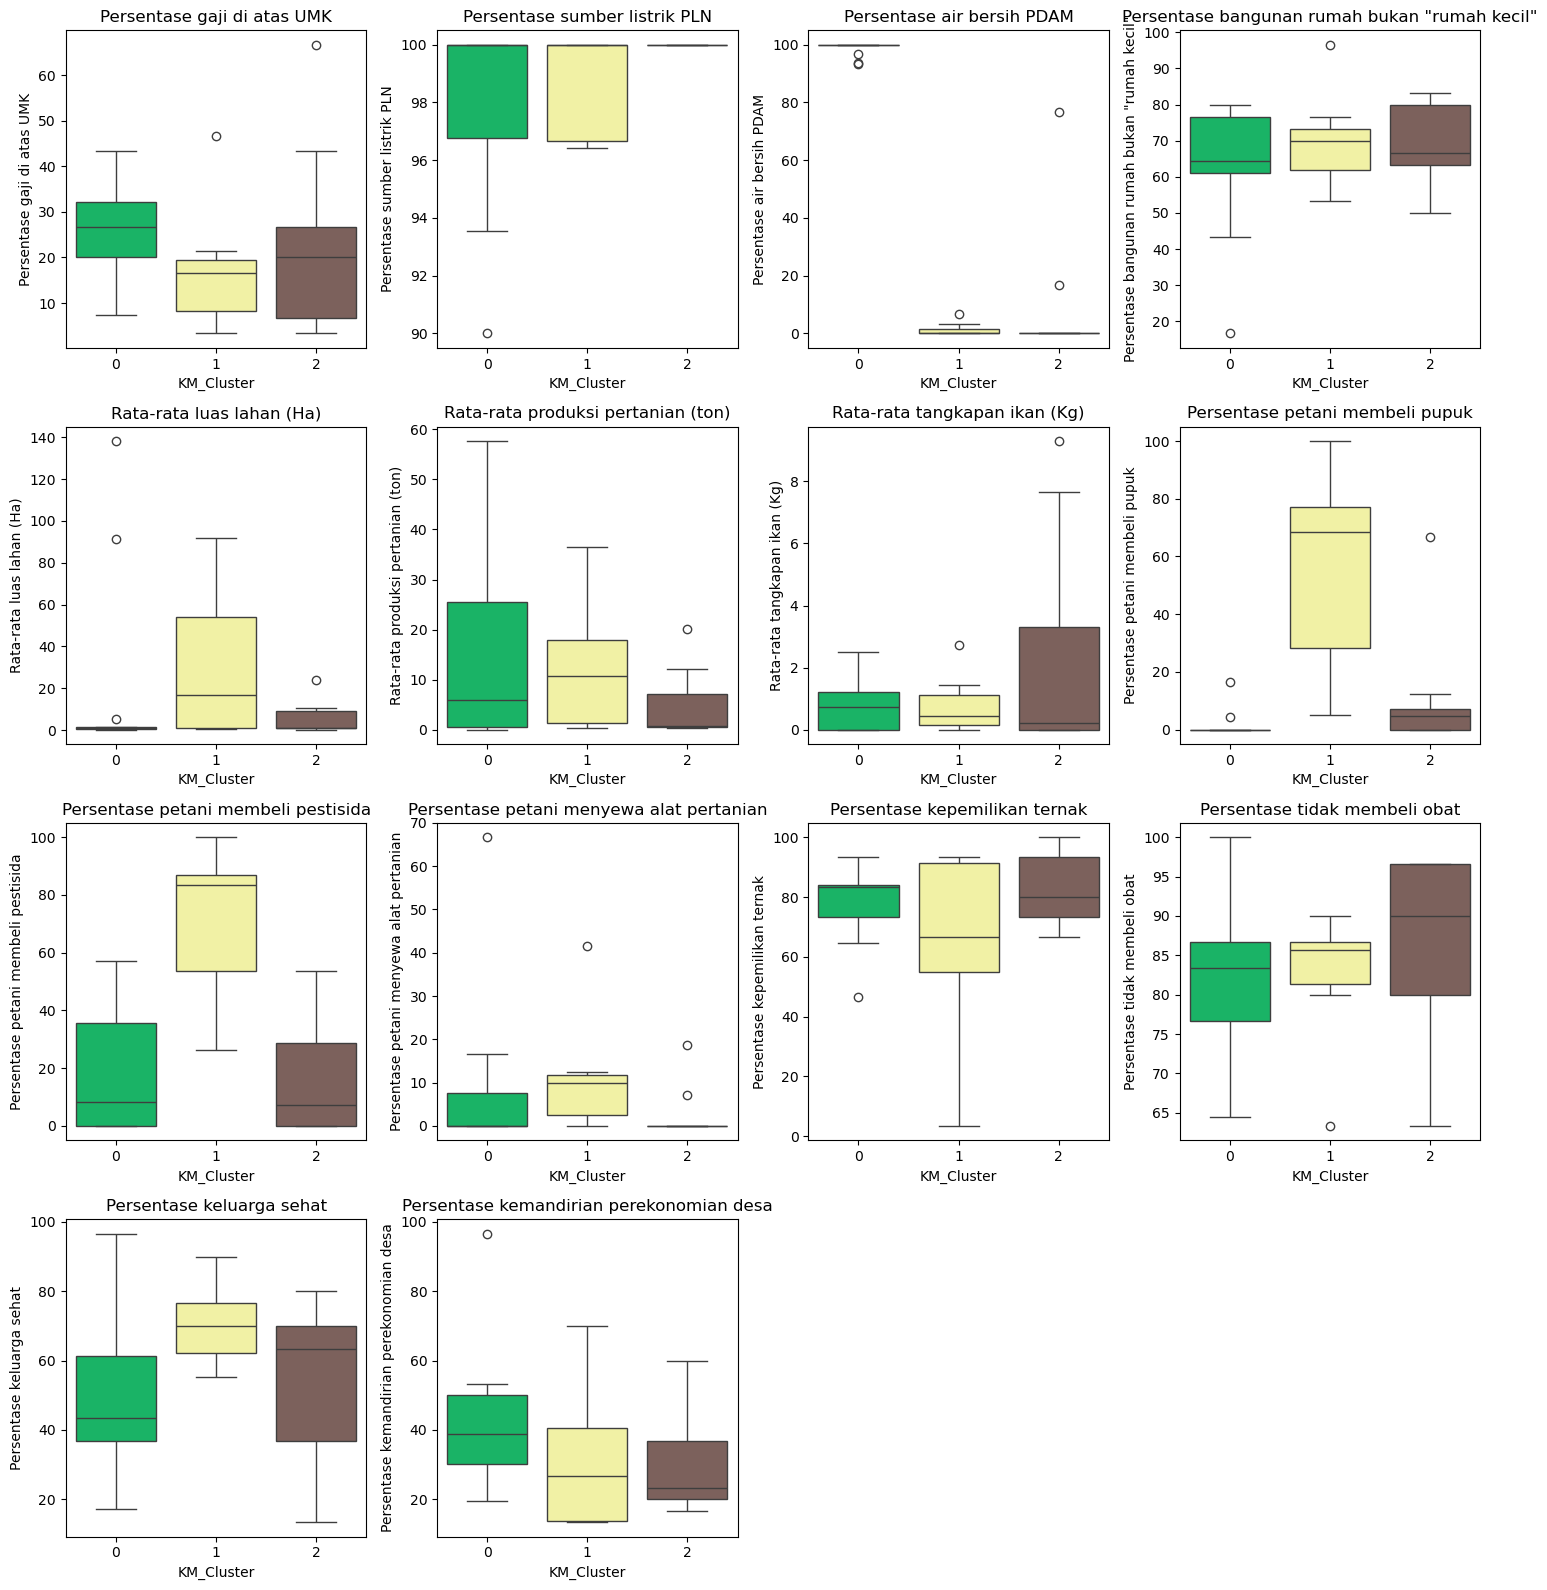

In [366]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="KM_Cluster", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

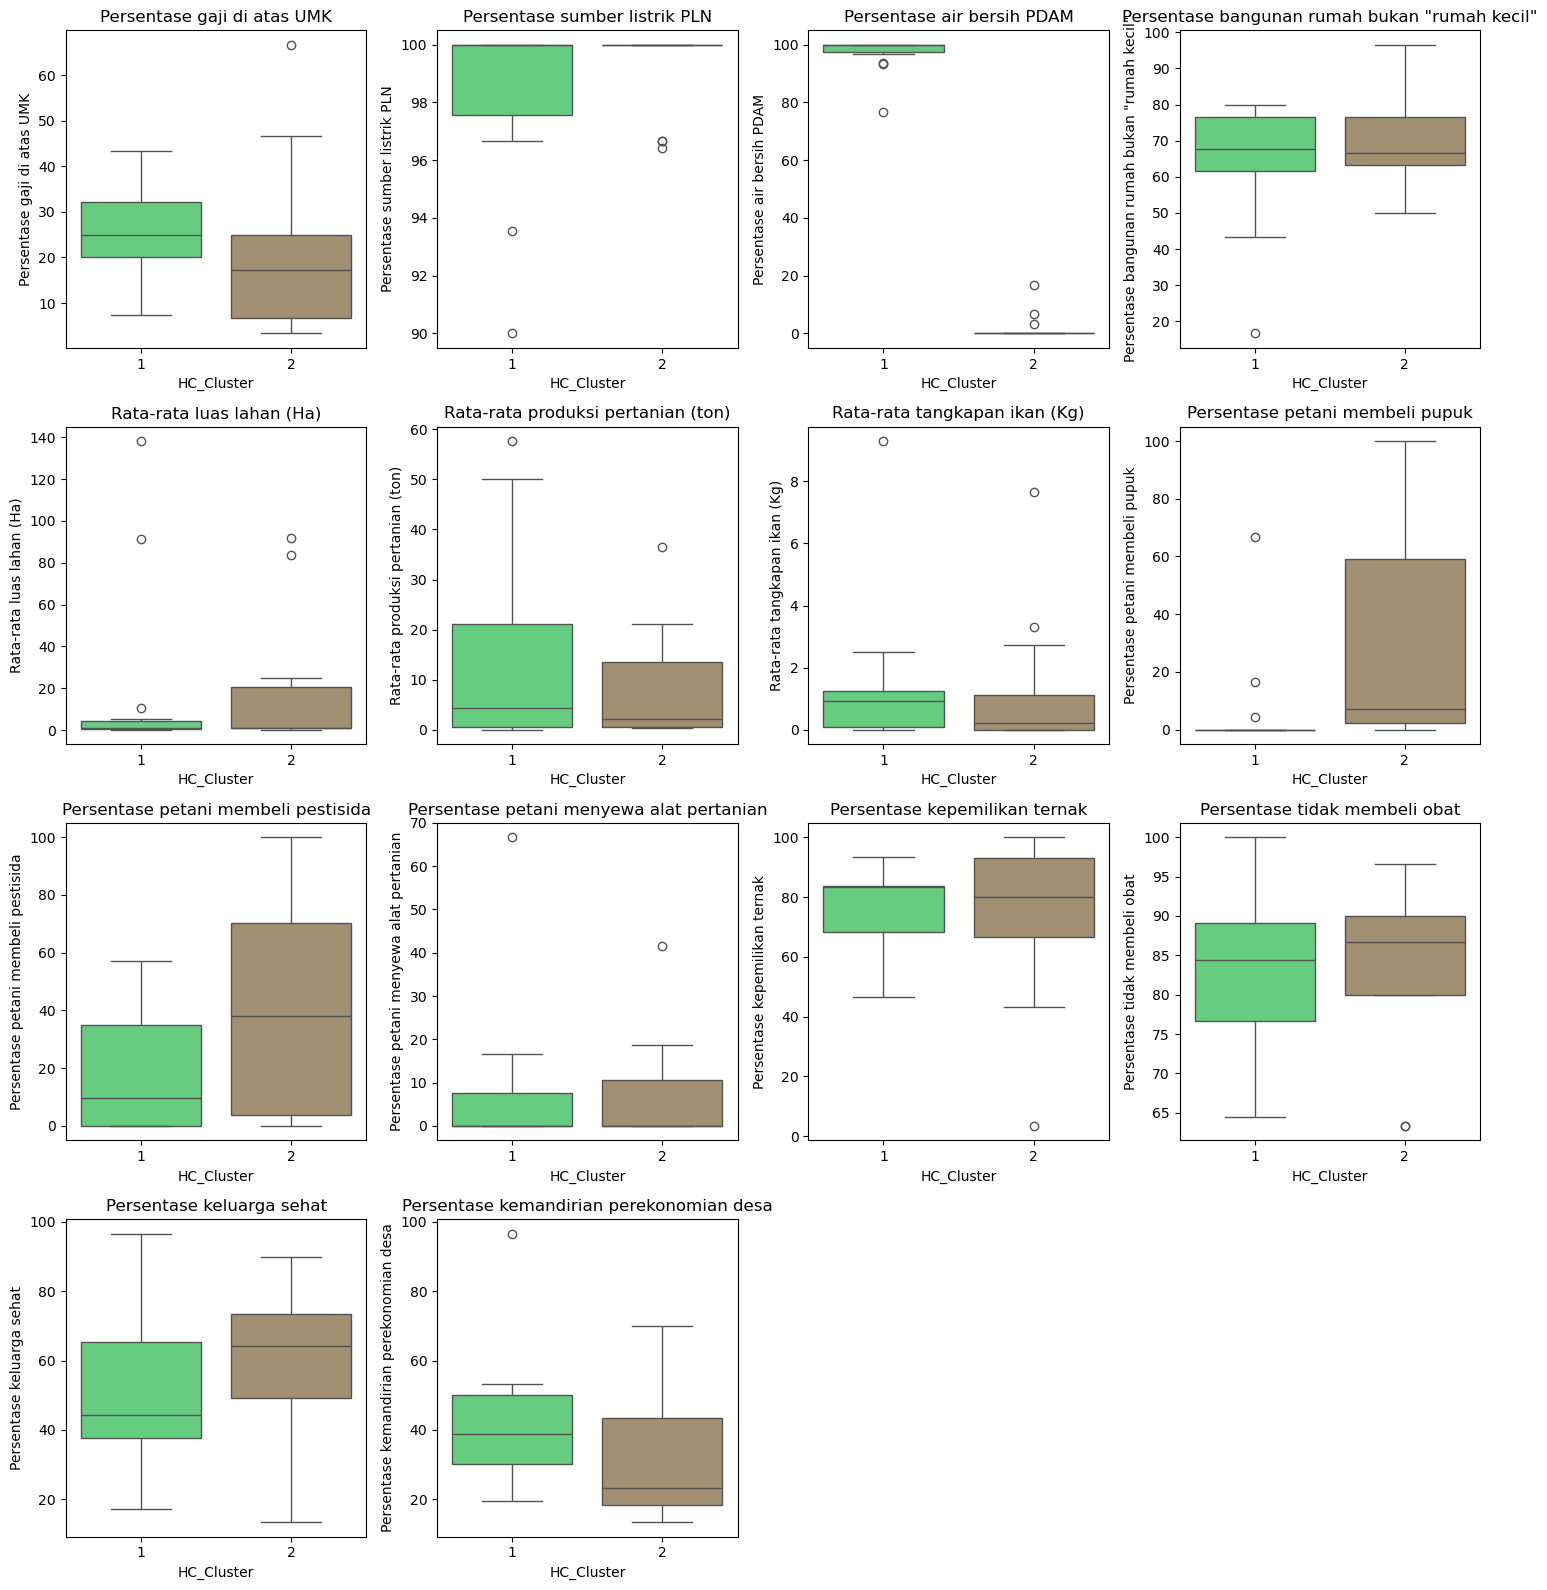

In [367]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

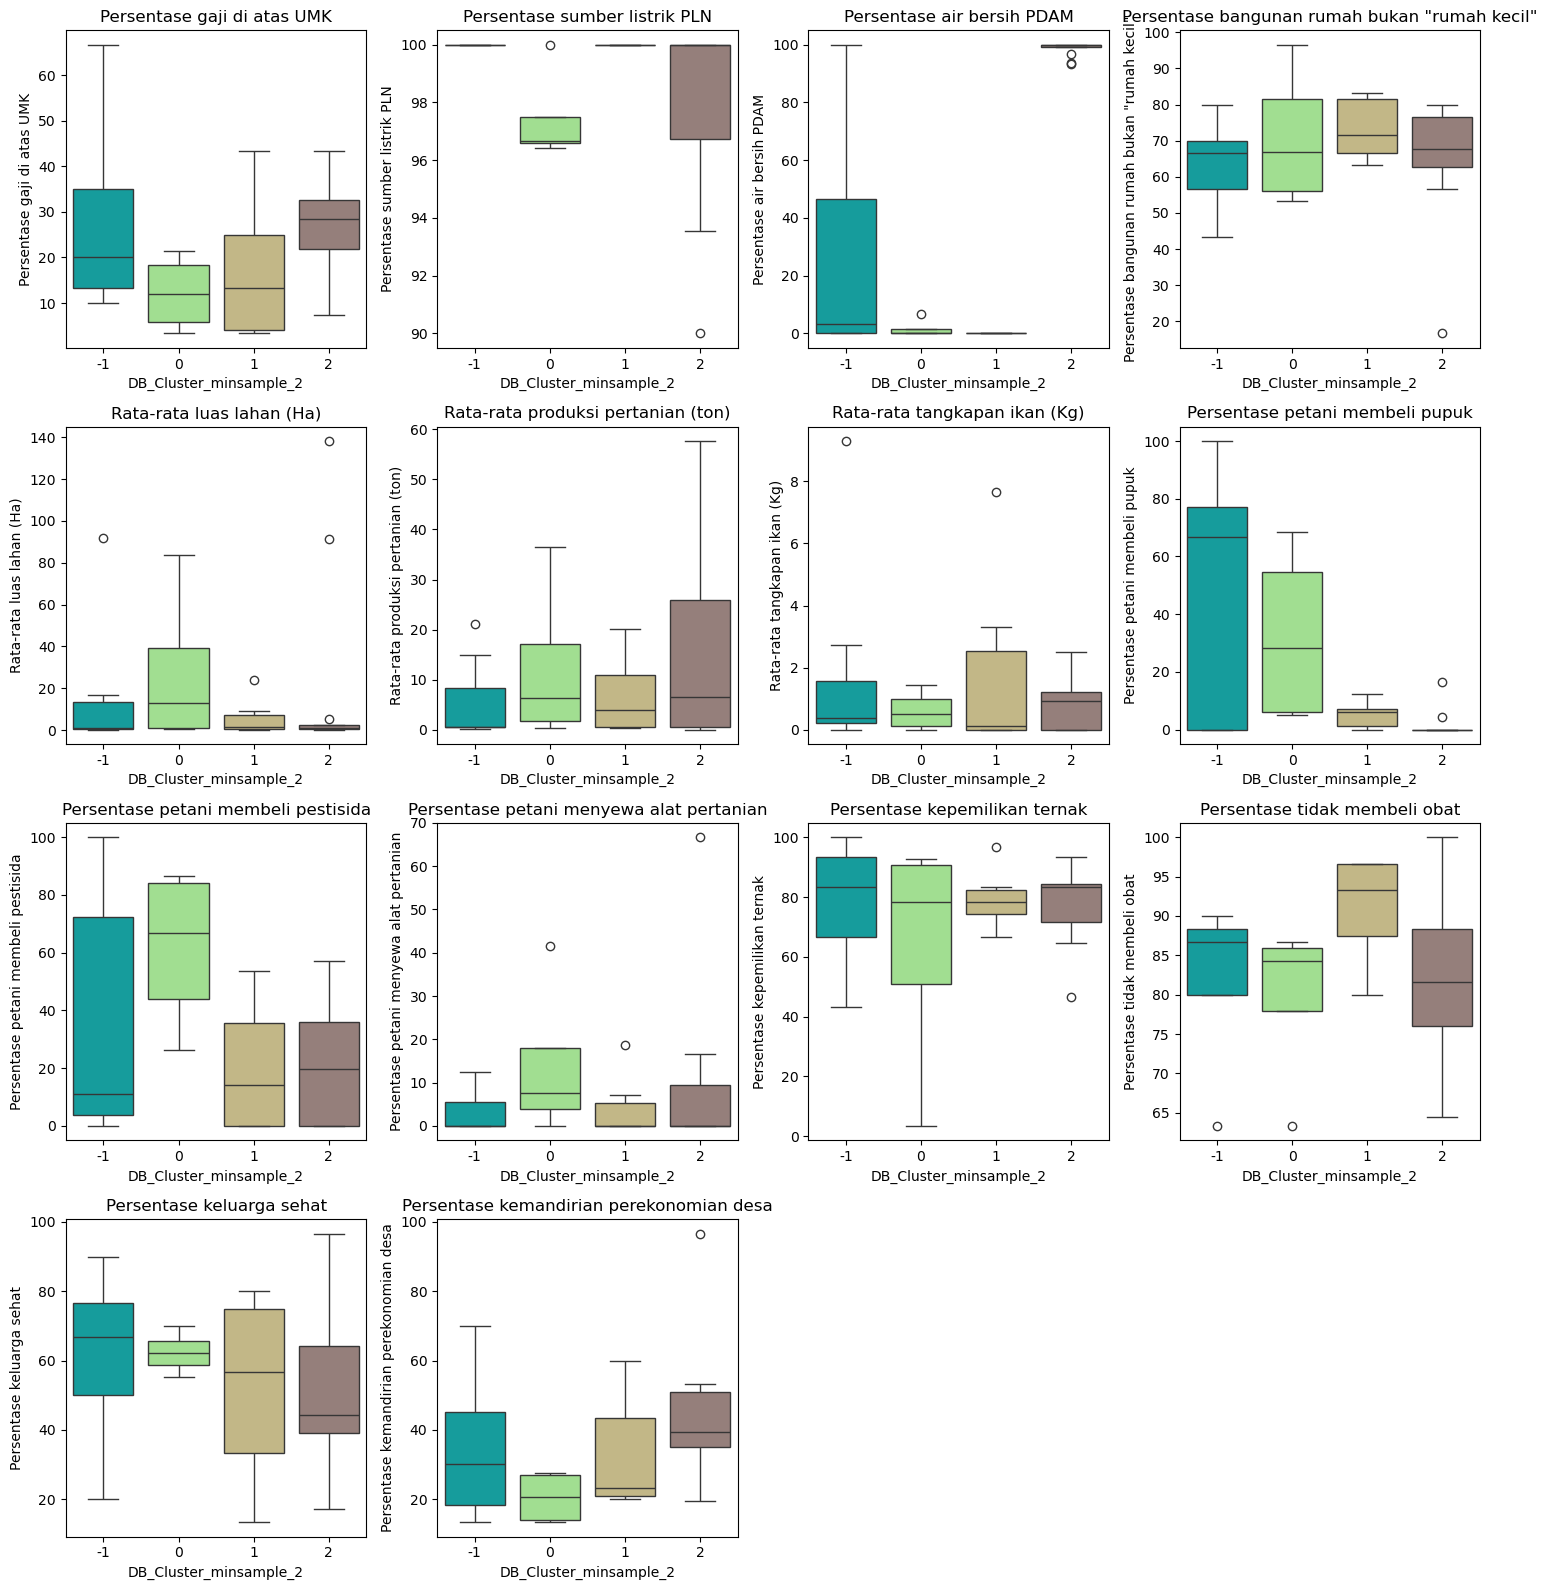

In [368]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_2", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

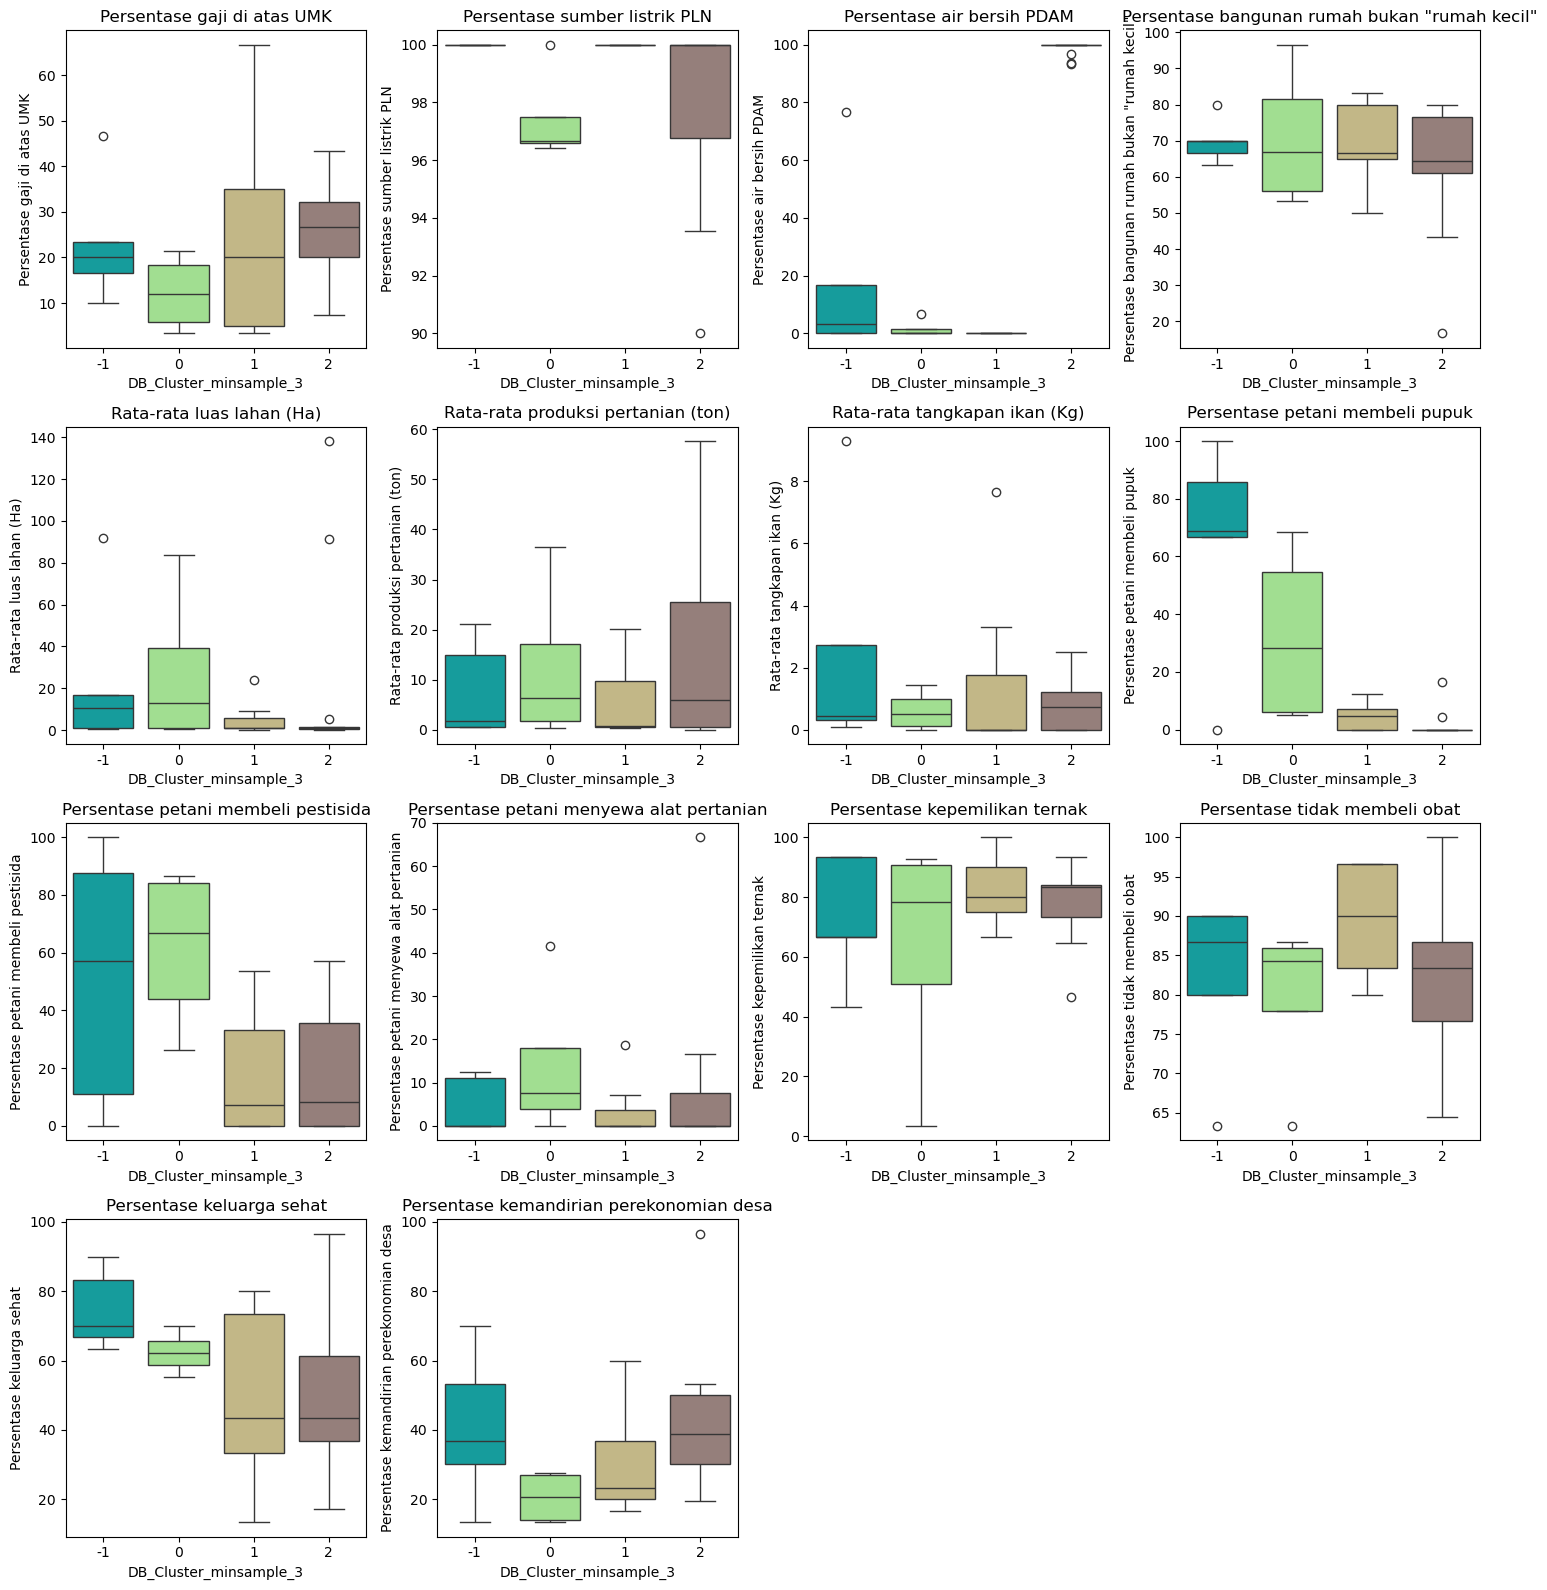

In [369]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_3", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### GRAFIK

C:\Users\halid\AppData\Local\Temp\ipykernel_19444\966423908.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


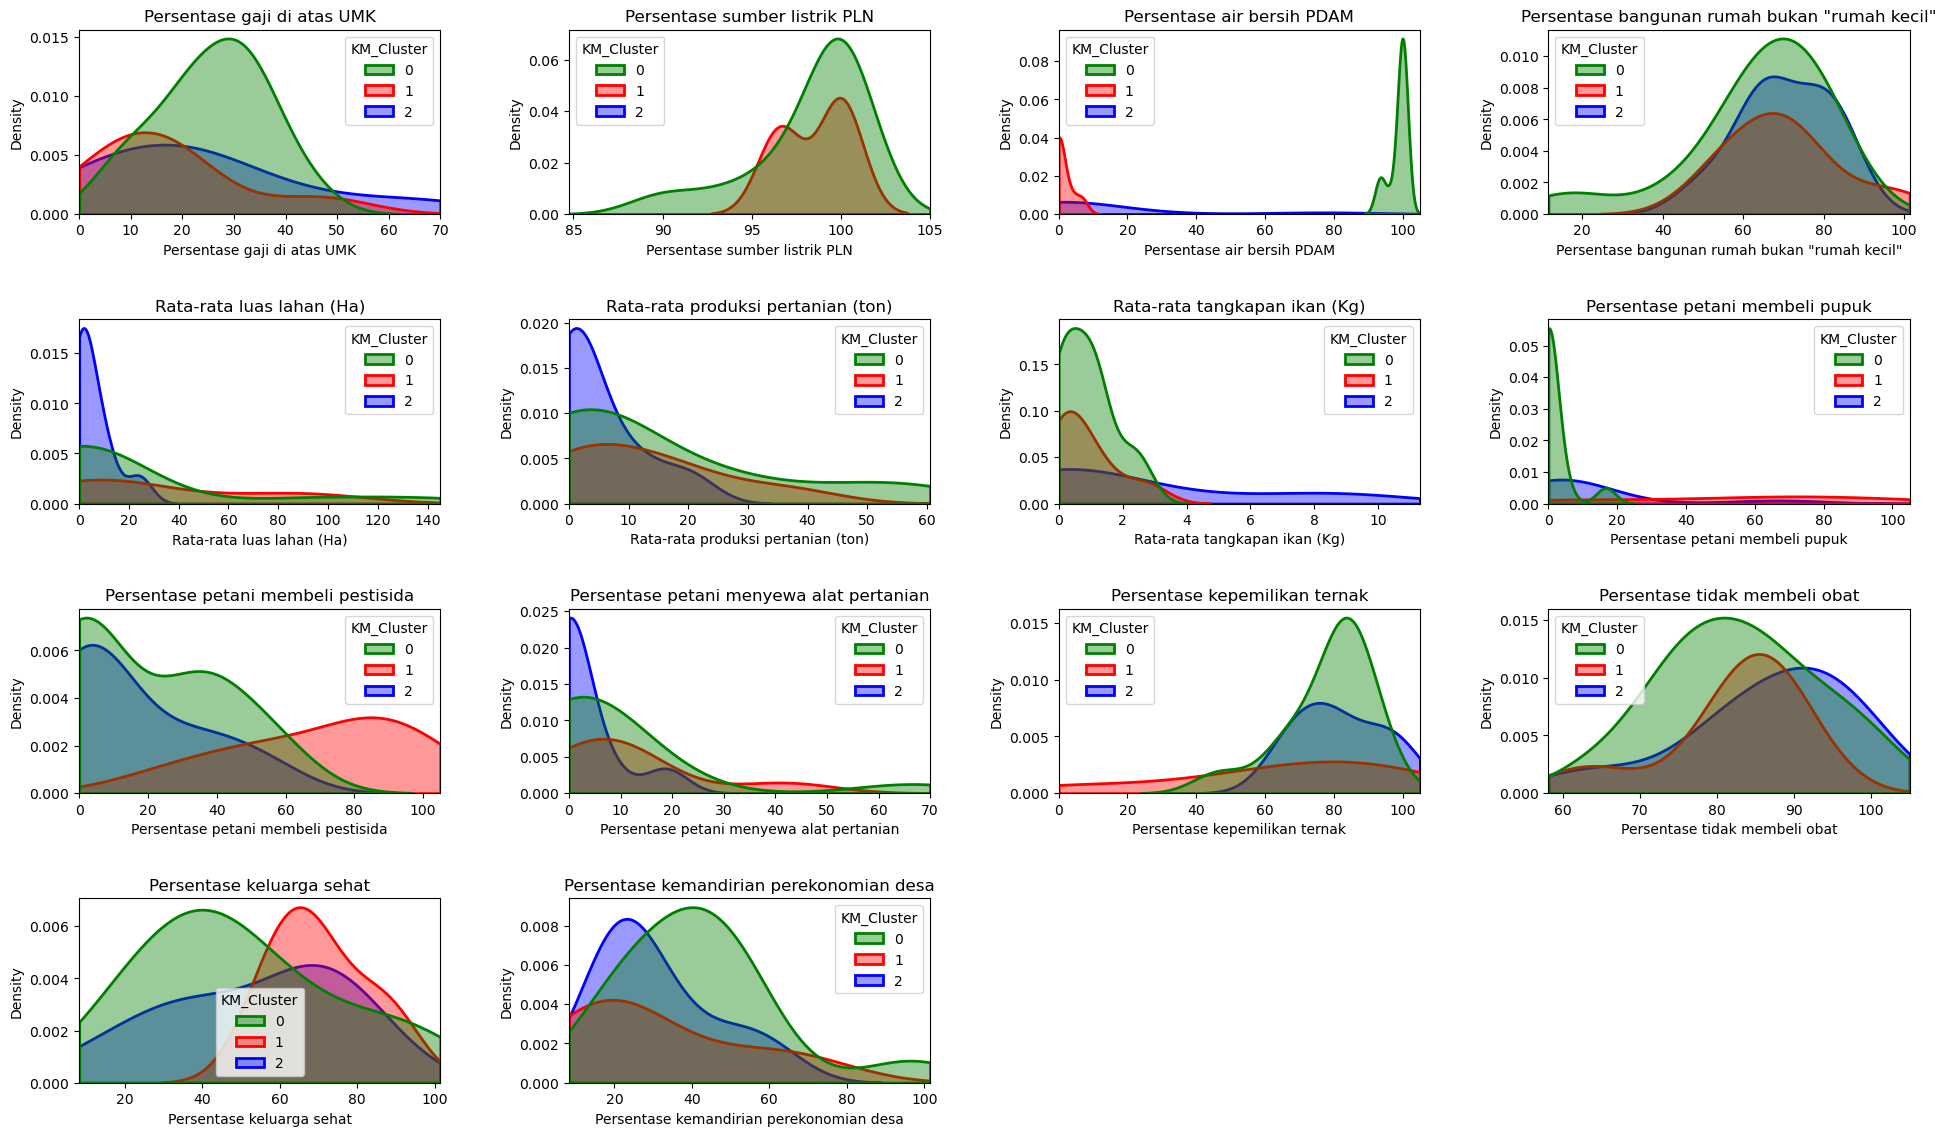

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy untuk perhitungan

# Asumsi 'rows', 'cols', 'df_pca_coba', dan 'numerical_cols' sudah didefinisikan

cols = 4
rows = 4 # Sesuaikan jumlah baris Anda
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red", 2: "blue"}

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)

    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="KM_Cluster",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        # Ganti 'clip' dengan batas dinamis:
        clip=(x_min, x_max) 
    )
    
    # --- ATUR BATAS PLOT SECARA DINAMIS ---
    # Ganti 'axes[i].set_xlim(0, 100)' dengan ini:
    axes[i].set_xlim(x_min, x_max)
    
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

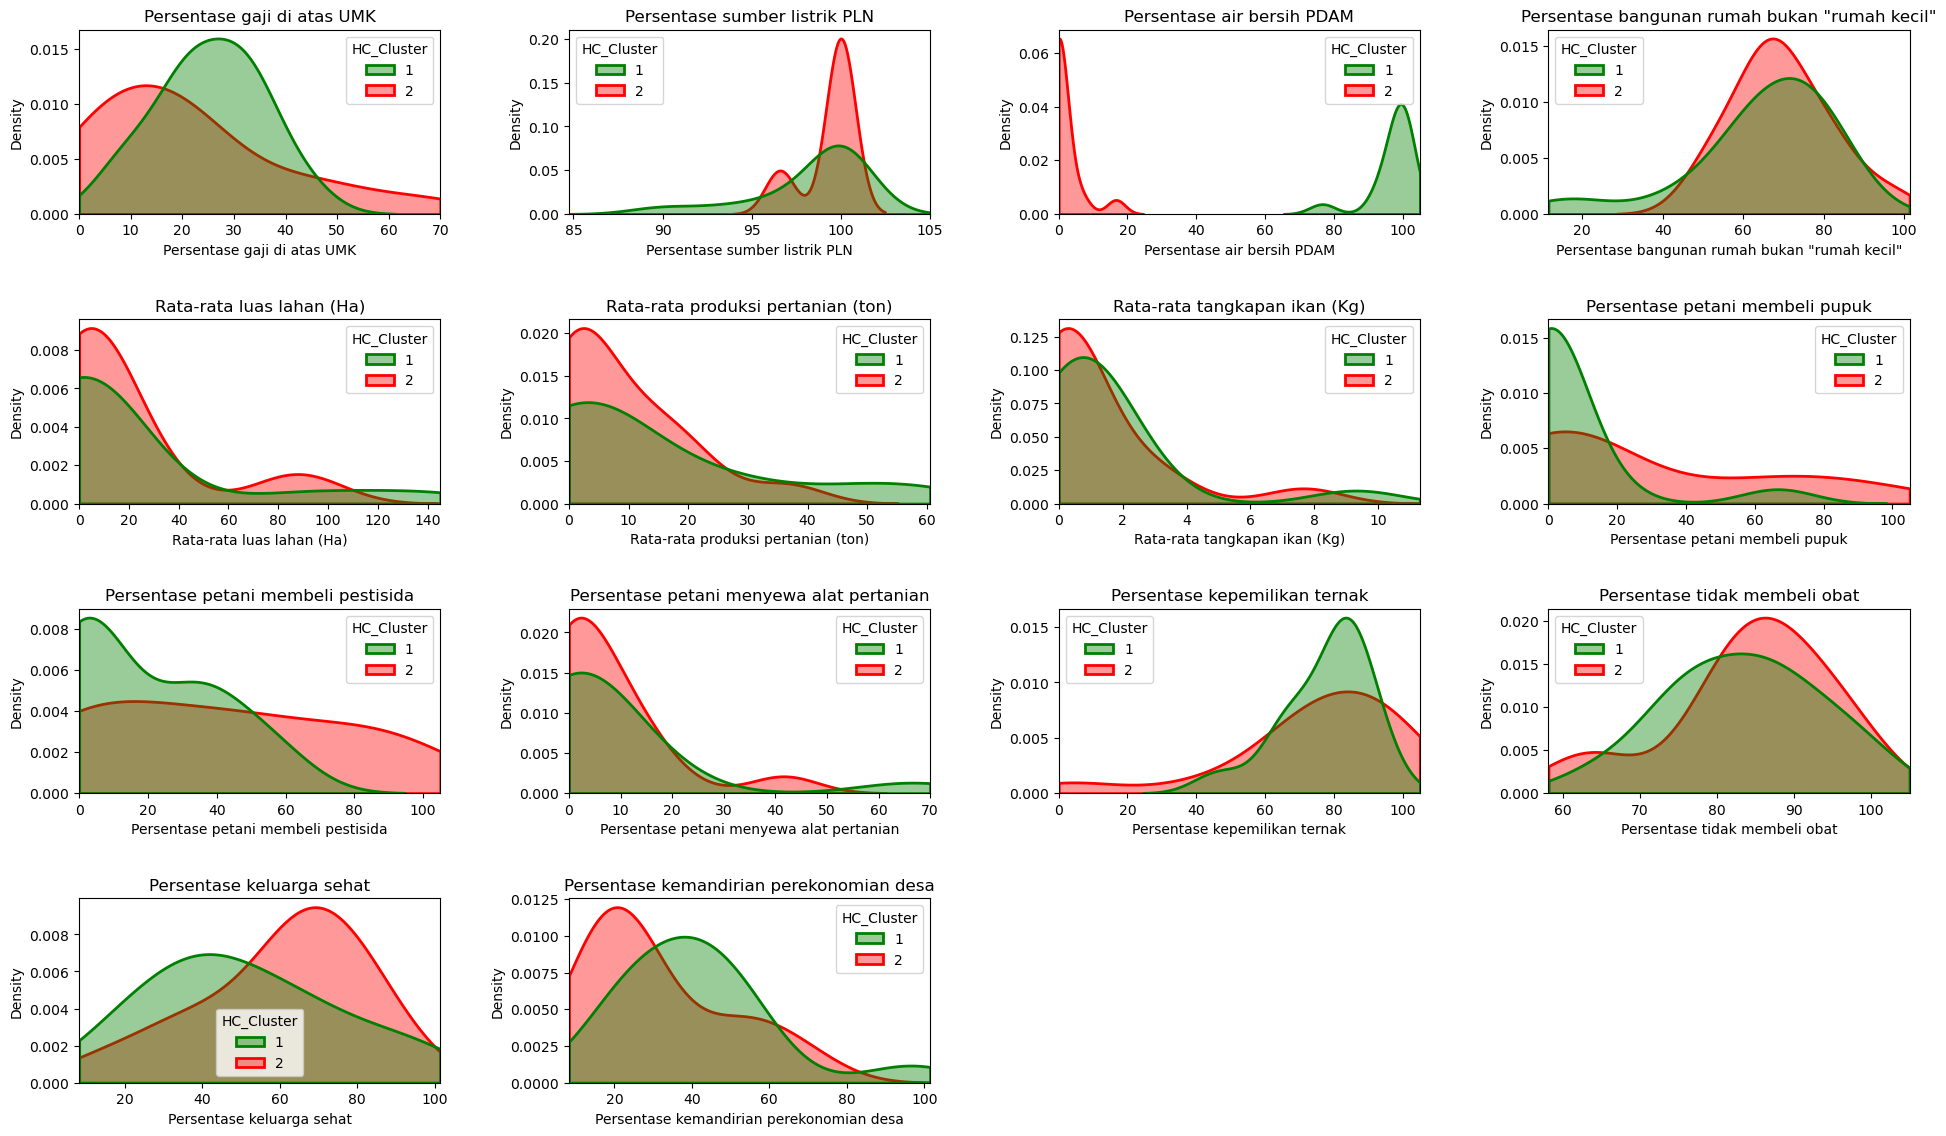

In [380]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {1: "green", 2: "red"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="HC_Cluster",
        palette=custom_palette,
        hue_order=[1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_19444\1332668371.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_19444\1332668371.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


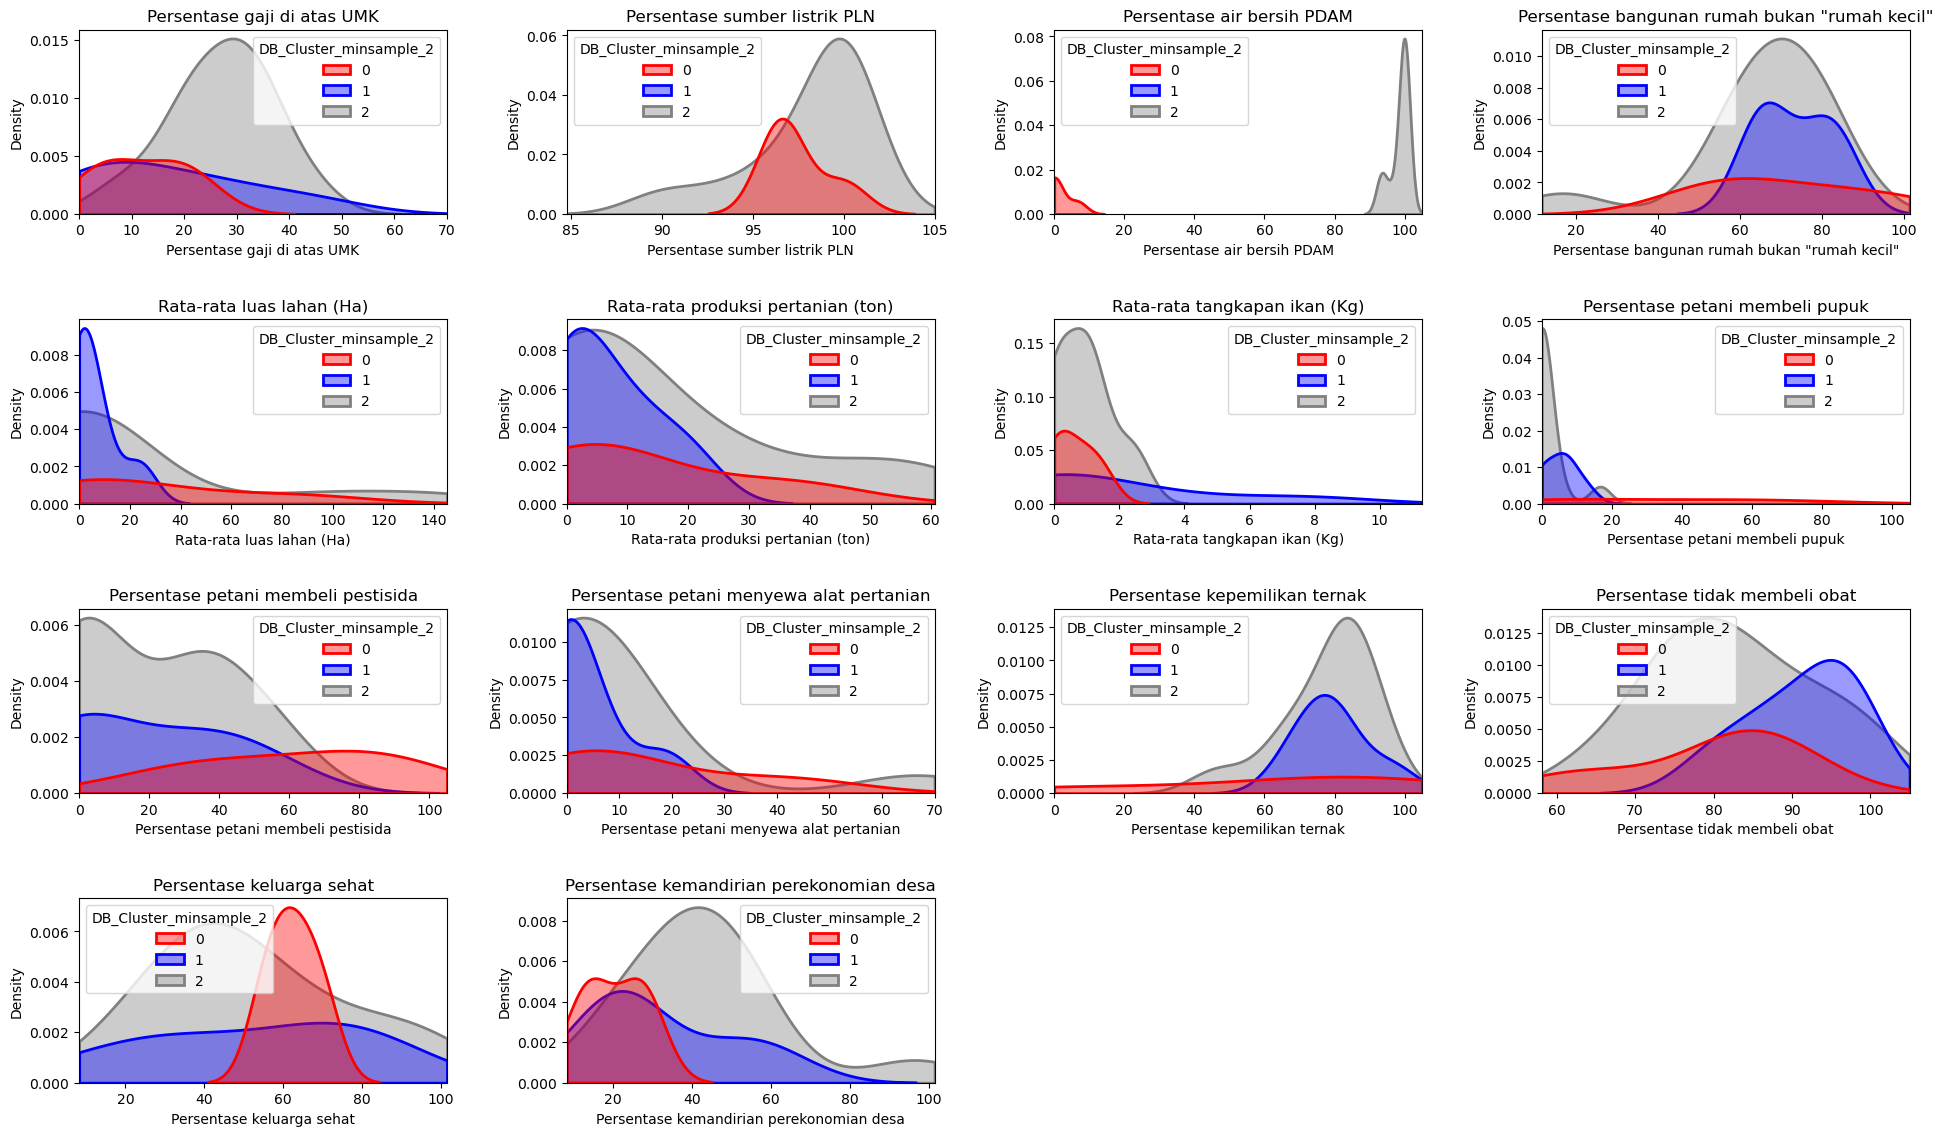

In [381]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "red", 1: "blue", 2: "grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_2",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_19444\2786297653.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_19444\2786297653.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


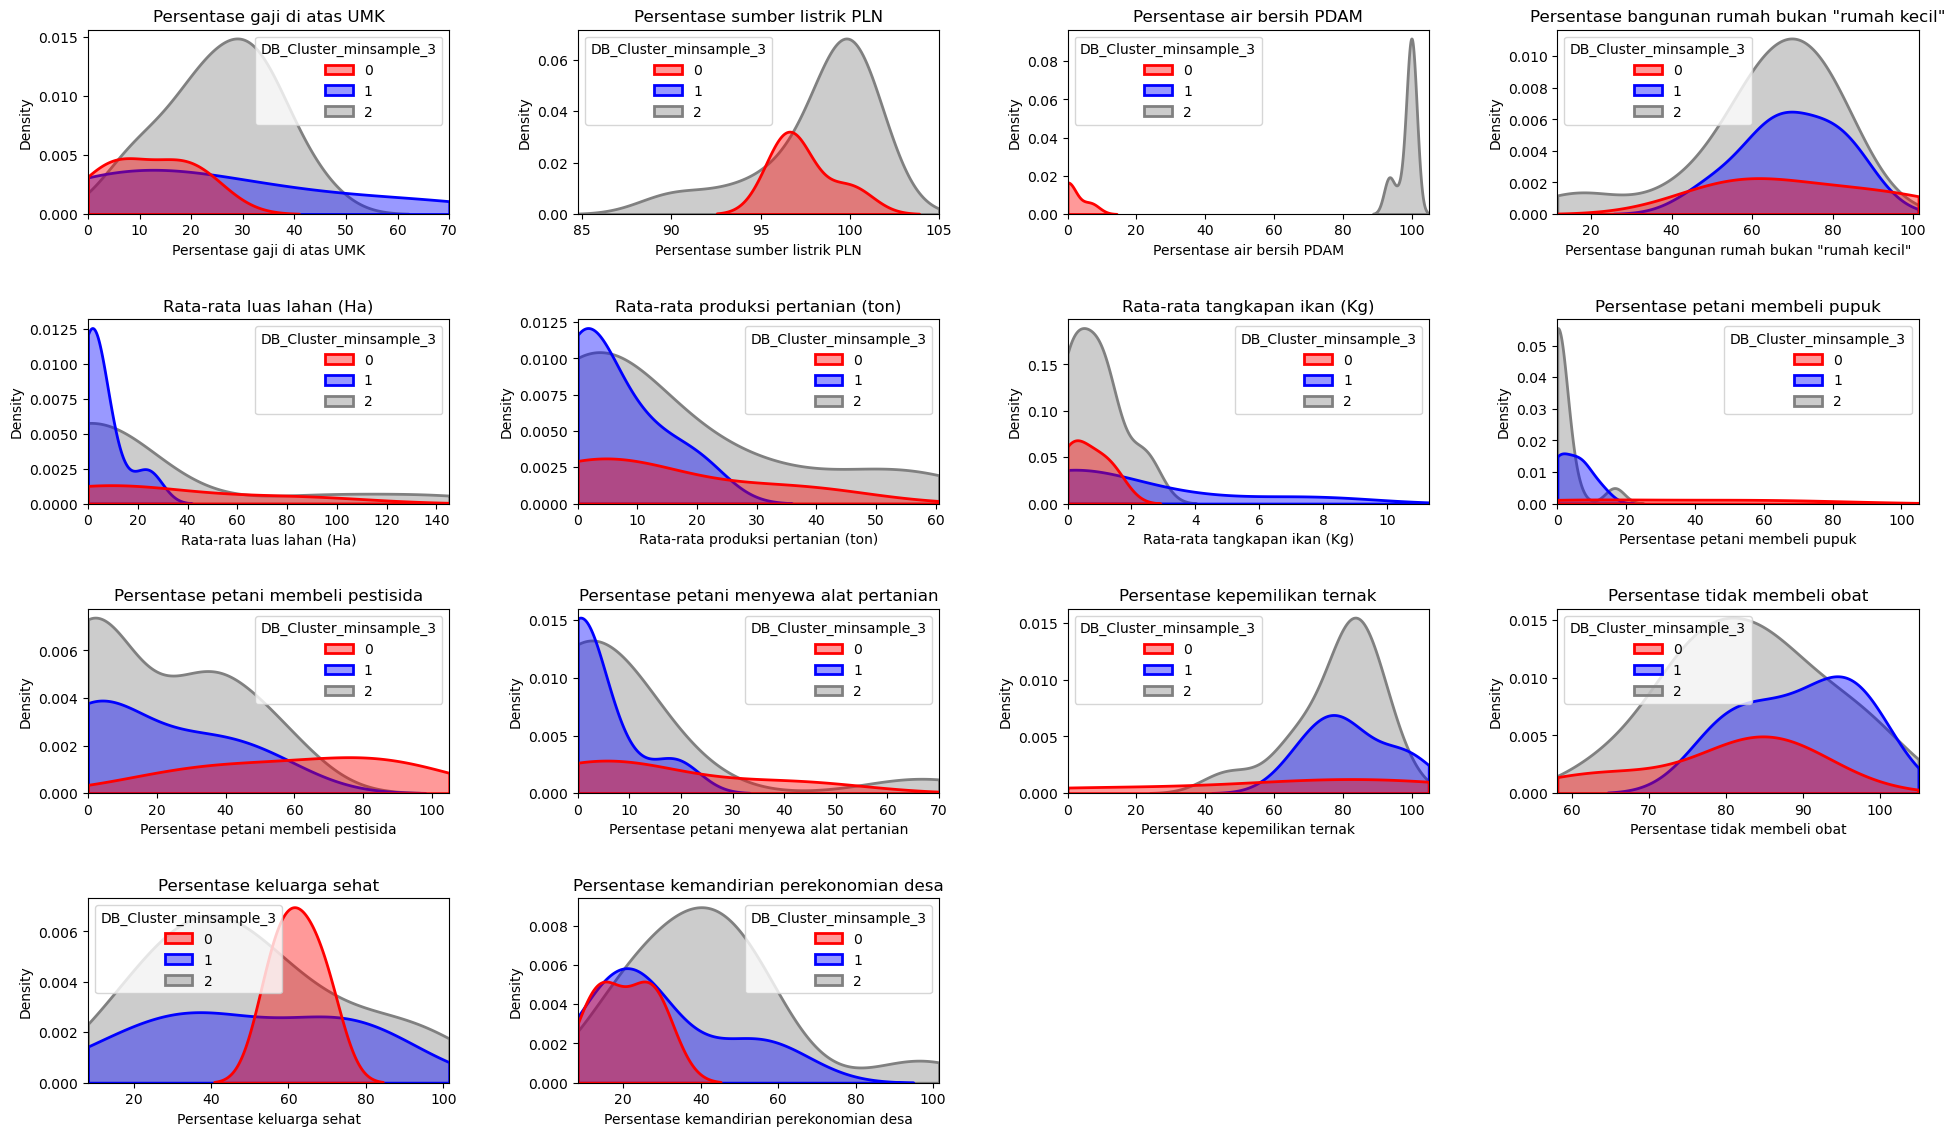

In [382]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "red", 1: "blue", 2: "grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_3",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()